In [34]:
!pip install -q torchtext==0.6


In [35]:
!pip install opencv-python
!pip install -q gdown mediapipe

In [36]:
# !git clone https://github.com/kapoorparul/Towards-Automatic-Speech-to-SL.git
# import cv2

In [37]:
# !wget https://prod-dcd-datasets-cache-zipfiles.s3.eu-west-1.amazonaws.com/kcmpdxky7p-1.zip

In [38]:
# !unzip  kcmpdxky7p-1.zip -d /kaggle/working/ISL

In [39]:
# !rm -r /kaggle/working/kcmpdxky7p-1.zip 

In [40]:
# # #!unzip -n /content/ISL/ISL_CSLRT_Corpus.zip -d /content/ISL/Corpus
# !zip -FF /kaggle/working/ISL/ISL_CSLRT_Corpus.zip --out /kaggle/working/ISL/ISL_Corpus.zip -fz
# !rm -r /kaggle/working/ISL/ISL_CSLRT_Corpus.zip
# !unzip /kaggle/working/ISL/ISL_Corpus.zip -d /kaggle/working/ISL/Corpus
# !rm -r /kaggle/working/ISL/ISL_Corpus.zip

In [41]:
# !cd /content/sample_data/openpose
# !./build/examples/openpose/openpose.bin --image "/content/ISL/Corpus/ISL_CSLRT_Corpus/Frames_Sentence_Level/He is going into the room/1/he is going into the room 01.jpg"

## Data Understanding and Preparation


In [42]:

# import cv2
import numpy as np
# import mediapipe as mp
#from google.colab.patches import cv2_imshow
import gc

# def pose_estimation(image_path):
#     # Initialize MediaPipe Pose
#     mp_pose = mp.solutions.pose
#     pose = mp_pose.Pose()

#     # Read the input image
#     image = cv2.imread(image_path)
#     image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#     # Make detection
#     results = pose.process(image_rgb)

#     # Create a fully black image with the same dimensions as the input image
#     black_image = np.zeros_like(image)

#     # Draw pose landmarks on the black image
#     if results.pose_landmarks:
#         mp_drawing = mp.solutions.drawing_utils
#         mp_drawing.draw_landmarks(black_image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

#     # Save or display the result
#     #cv2.imwrite("output_pose_estimation_black.jpg", black_image)
#     #cv2_imshow(black_image)
#     #print(black_image.shape)
#     cv2.waitKey(0)
#     cv2.destroyAllWindows()
#     return black_image



# def pose_estimation2(image_path, target_width, target_height):
#     # Initialize MediaPipe Pose
#     mp_pose = mp.solutions.pose
#     pose = mp_pose.Pose()

#     # Read the input image
#     image = cv2.imread(image_path)

#     # Resize the input image to the specified width and height
#     image = cv2.resize(image, (target_width, target_height))

#     image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#     # Make detection
#     results = pose.process(image_rgb)

#     # Create a fully black image with the same dimensions as the resized input image
#     black_image = np.zeros_like(image)

#     # Draw pose landmarks on the black image
#     if results.pose_landmarks:
#         mp_drawing = mp.solutions.drawing_utils
#         mp_drawing.draw_landmarks(black_image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

#     # Save or display the result
#     #cv2.imwrite("output_pose_estimation_resized_black.jpg", black_image)
#     # cv2_imshow(black_image)
#     # cv2_imshow(image)
#     cv2.waitKey(0)
#     cv2.destroyAllWindows()

# def resize_image(image, target_width, target_height):
#     return cv2.resize(image, (target_width, target_height))

# def pose_estimation3(image_path, target_width=640, target_height=480, drawing_spec=None):
#     # Initialize MediaPipe Pose
#     mp_pose = mp.solutions.pose
#     pose = mp_pose.Pose()

#     # Read the input image
#     image = cv2.imread(image_path)
#     image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#     # Make detection
#     results = pose.process(image_rgb)

#     # Create a fully black image with the same dimensions as the input image
#     black_image = np.zeros_like(image)

#     # Use default drawing specifications if not provided
#     if drawing_spec is None:
#         drawing_spec = mp.solutions.drawing_utils.DrawingSpec(thickness=2, circle_radius=4,)

#     # Draw pose landmarks and connections on the black image
#     if results.pose_landmarks:
#         mp.solutions.drawing_utils.draw_landmarks(
#             black_image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS, landmark_drawing_spec=drawing_spec,
#             connection_drawing_spec=drawing_spec  # Use the same specifications for connections
#         )

#     #cv2_imshow(black_image)
#     # Resize both images to the target dimensions
#     resized_image = resize_image(image, target_width, target_height)
#     resized_black_image = resize_image(black_image, target_width, target_height)

#     # Save or display the resized images
#     #cv2.imwrite("output_pose_estimation_resized.jpg", resized_image)
#     cv2.imwrite("output_pose_estimation_black_resized.jpg", resized_black_image)
#     return resized_black_image

#     # cv2_imshow( resized_image)
#     # cv2_imshow(resized_black_image)
#     # cv2.waitKey(0)
#     # cv2.destroyAllWindows()

# def pose_estimation4(image_path, target_width=640, target_height=480, circle_color=(255, 0, 0), line_color=(0, 255, 0), circle_radius=4, line_thickness=2):
#     # Initialize MediaPipe Pose
#     mp_pose = mp.solutions.pose
#     pose = mp_pose.Pose()

#     # Read the input image
#     image = cv2.imread(image_path)
#     image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#     # Make detection
#     results = pose.process(image_rgb)

#     # Create a fully black image with the same dimensions as the input image
#     black_image = np.zeros_like(image)
# 
#     # Draw pose landmarks and connections on the black image
#     if results.pose_landmarks:
#         mp.solutions.drawing_utils.draw_landmarks(
#             black_image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
#             landmark_drawing_spec=mp.solutions.drawing_utils.DrawingSpec(color=circle_color, circle_radius=circle_radius),
#             connection_drawing_spec=mp.solutions.drawing_utils.DrawingSpec(color=line_color, thickness=line_thickness)
#         )

#     # Resize both images to the target dimensions
#     resized_image = resize_image(image, target_width, target_height)
#     resized_black_image = resize_image(black_image, target_width, target_height)

#     # Save or display the resized images
#     cv2.imwrite("output_pose_estimation_resized.jpg", resized_image)
#     cv2.imwrite("output_pose_estimation_black_resized.jpg", resized_black_image)

#     # cv2_imshow(resized_image)
#     # cv2_imshow(resized_black_image)
#     cv2.waitKey(0)
#     cv2.destroyAllWindows()


# # if __name__ == "__main__":
# #     # Customize drawing specifications as needed
# #     custom_drawing_spec = mp.solutions.drawing_utils.DrawingSpec(thickness=40, circle_radius=14)

# #     image_path = "/content/ISL/Corpus/ISL_CSLRT_Corpus/Frames_Word_Level/A LOT/A LOT (1).jpg"
# #     img= pose_estimation(image_path)
# #     img= pose_estimation2(image_path, 128, 128)
# #     img= pose_estimation3(image_path, 128, 128, custom_drawing_spec)

# #     # Call the function with custom colors and specifications
# #     #pose_estimation4(image_path, circle_color=(255, 0, 0), line_color=(0, 255, 0), circle_radius=10, line_thickness=30)


In [43]:
import os
root_dir = "/content/ISL/Corpus/ISL_CSLRT_Corpus"
#os.chdir(root_dir)

subdir = ['Videos_Sentence_Level',
 'ISL_CSLRT.txt',
 'corpus_csv_files',
 'Frames_Sentence_Level',
 'Frames_Word_Level']

#os.chdir(os.path.join(root_dir, subdir[3]))

In [44]:
# if not os.path.exists("/content/sample_data/processed_files"):
#   os.mkdir("/content/sample_data/processed_files")



In [45]:
import os

len(os.listdir("/kaggle/working/speech-sign_language/pose_array")),len(os.listdir("/kaggle/working/speech-sign_language/pose")), len(os.listdir("/kaggle/working/speech-sign_language/img"))

(18806, 18806, 18806)

In [46]:
import os
import json
import re

dest_path = "/kaggle/working/speech-sign_language"
pose_array_folder= os.path.join(dest_path, "pose_array")
pose_folder = os.path.join(dest_path,"pose")
pose_folder2 = os.path.join(dest_path,"pose2")
img_folder = os.path.join(dest_path, "img")
img_folder2 = os.path.join(dest_path, "img2")

# if not os.path.exists(dest_path):
#         os.mkdir(dest_path)

# if not os.path.exists(pose_folder):
#   os.mkdir(pose_folder)

# if not os.path.exists(pose_folder2):
#   os.mkdir(pose_folder2)

# if not os.path.exists(img_folder):
#   os.mkdir(img_folder)

# if not os.path.exists(pose_array_folder):
#   os.mkdir(pose_array_folder)

# if not os.path.exists(img_folder2):
#   os.mkdir(img_folder2)

def get_abs_paths(files):
    return tuple(map(lambda item: os.path.abspath(item), files))

In [47]:
def get_abs_paths(files):
    return tuple(map(lambda item: os.path.abspath(item), files))

def flatten_pose(pose):
  result = []
  for each in pose:
    result.extend([each.x, each.y, each.z, each.visibility])

  result = np.array(result)
  return result

def create_samples(file_list):
    file_list= file_list[4:]
    result = []
    for i in range(len(file_list)):
        ref = file_list[i]
        for each in file_list:
             if each != ref:
                result.append([ref, each])

    return result

def create_sequences(file_list,n_frames):
    result = []
    file_list = file_list[4:]
    for i in range(len(file_list)):
        for j in range(3, n_frames):
            
            list_slice = file_list[i: i + j]
#             print(list_slice)
            result.append(list_slice)      
            list_slice.reverse()
            result.append(list_slice)    
#             print(list_slice)
#             print()
    return result

def create_sequences2(file_list,n_frames, window_size=3):
    result = []
    file_list = file_list[3:]
    for i in range(0, len(file_list), window_size): 
        for j in range(n_frames, 12):
          list_slice = file_list[i: i + j]
    #             print(list_slice)
          result.append(list_slice)      
          list_slice.reverse()
          result.append(list_slice)    
    #             print(list_slice)
    #             print()
    return result

def generate_training_samples(parent_folder, n_frames, file_name="train_.json", debug = False):

    train_data = []
    sk_img = []
    # List file in frames_sentence_level
    for folder_name in os.listdir(parent_folder):
        folder_path = os.path.join(parent_folder, folder_name)
        # He is going into the
        if os.path.isdir(folder_path):
            #print(f"Folder Name: {folder_name}")
            for dir in os.listdir(folder_path):
                #print(dir)
                if dir.strip() == "1" or dir.strip() == "2":
                    # print("irrelevant class")
                    continue

                file_list = os.listdir(os.path.join(folder_path, dir))
                file_lists = [f"{str(dir)}_{each}" for each in file_list if each.endswith("jpg") or each.endswith("jpeg")]
                if debug:
                  print(file_lists)
                  debug=False
                #print(file_lists)
                #file_lists.sort(key=lambda x: int(re.findall("\s*\d+", x)[-1]))
                train_data.extend(create_sequences2(file_lists, n_frames))
                sk_img.extend(create_samples(file_lists))


    with open(os.path.join(dest_path,file_name), "w") as f:
      json.dump(train_data, f)
    
    with open(os.path.join(dest_path,"skeleton_img.json"), "w") as f:
      json.dump(sk_img, f)

    with open(os.path.join(dest_path,"pose_estimation_data.json"), "w") as f:
      json.dump(train_data, f)
    
    print("Samples created successfully.")
    return train_data

def save_pose(pose_landmarks, img_name):

    if pose_landmarks is None:
      #print("Pose landmarks empty..")
      print("landmarks: ", pose_landmarks)
      #print("Image: ", image)
      return False

    # Flatten pose landmarks and save as numpy array
    flattened_landmarks = flatten_pose(np.array(pose_landmarks.landmark).flatten())
    #print(flattened_landmarks)
    np.save(os.path.join(pose_array_folder, f"{img_name}_landmarks.npy"), flattened_landmarks)

    return  True #dictionary, flattened_landmarks, results

def pose_estimation3(pose, mp_pose, image_path, no_landmarks, target_width=640, target_height=480, drawing_spec=None,debug=True, save_img_pose = True, pose_folder=pose_folder, img_folder=img_folder):


    # Read the input image
    img_name = "_".join(image_path.split("/")[-2:])
    #print(image_path)
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Make detection
    results = pose.process(image_rgb)

    # Create a fully black image with the same dimensions as the input image
    black_image = np.zeros_like(image)

    # if debug:
    #   print("Pose_estimation: ", img_name)
    #   debug =False

    # Use default drawing specifications if not provided
    if drawing_spec is None:
        drawing_spec = mp.solutions.drawing_utils.DrawingSpec(thickness=2, circle_radius=4,)

    # Draw pose landmarks and connections on the black image
    if results.pose_landmarks:
        mp.solutions.drawing_utils.draw_landmarks(
            black_image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS, landmark_drawing_spec=drawing_spec,
            connection_drawing_spec=drawing_spec  # Use the same specifications for connections
        )

        if save_img_pose:
          save_pose(results.pose_landmarks, img_name)
        # Resize both images to the target dimensions
        resized_image = resize_image(image, target_width, target_height)
        resized_black_image = resize_image(black_image, target_width, target_height)

        # Save or display the resized images
        #cv2.imwrite("output_pose_estimation_resized.jpg", resized_image)
        print(os.path.join(pose_folder, img_name))
        print(os.path.join(img_folder, img_name))
        print()
        cv2.imwrite(os.path.join(pose_folder, img_name), resized_black_image)
        cv2.imwrite(os.path.join( img_folder, img_name), resized_image)

        # Explicitly release resources
        #pose = None
        image = None
        resized_image = None
        resized_black_image = None
        black_image = None
        results = None

        #mp_pose = None

        # Read the input image
        image = None
        image_rgb = None


    else:
      no_landmarks.append(img_name)

    # Release resources
    #cv2.destroyAllWindows()
    gc.collect()



def generate_poses_per_image(parent_folder, dest_dir, h=128, w=128, thickness=40, circle_radius=14):
    custom_drawing_spec = mp.solutions.drawing_utils.DrawingSpec(thickness=thickness, circle_radius=circle_radius)
    # Initialize MediaPipe Pose
    mp_pose = mp.solutions.pose
    pose = mp_pose.Pose()

    start = False
    # List file in frames_sentence_level
    for folder_name in os.listdir(parent_folder):
        folder_path = os.path.join(parent_folder, folder_name)
        # He is going into the
        if os.path.isdir(folder_path):
            #print(f"Folder Name: {folder_name}")
            for dir_ in os.listdir(folder_path):
                #print(dir)
                file_list = os.listdir(os.path.join(folder_path, dir_))
                for each in file_list:

                    if os.path.exists(os.path.join(img_folder2, each)):  #os.path.exists(os.path.join(pose_folder2, each)) and
                      print("File exists...")
                      continue

                    if each.endswith(".jpg") or each.endswith(".jpeg"):
                        #print(each)

                        pose_estimation3(pose, mp_pose, os.path.join(folder_path, dir_, each), no_landmarks, h, w, custom_drawing_spec)
                        # pose_estimation3(pose, mp_pose, os.path.join(folder_path, dir_, each), no_landmarks, int(h/2), int(w/2), custom_drawing_spec, save_img_pose= False, img_folder=img_folder2, pose_folder =pose_folder2)


# no_landmarks = []
# n_frames = list(range(2,30))
n_frames = 10
# # # Replace 'your_parent_folder_path' with the path to the parent folder you want to iterate through
parent_folder_path = '/kaggle/working/ISL/Corpus/ISL_CSLRT_Corpus/Frames_Sentence_Level'
train_data = generate_training_samples(parent_folder_path,5)
# print(len(train_data))
# generate_poses_per_image(parent_folder_path, "poses")



Samples created successfully.


In [48]:
import json
with open("/kaggle/working/speech-sign_language/train_.json", "r") as f:
    data  = json.load(f)

len(data) , data[0]

(65758,
 ['3_MVI_6503 08.jpg',
  '3_MVI_6503 07.jpg',
  '3_MVI_6503 06.jpg',
  '3_MVI_6503 05.jpg',
  '3_MVI_6503 04.jpg'])

In [49]:
import random

data = random.sample(data, len(data))
with open("/kaggle/working/speech-sign_language/train_pose2.json", "w") as f:
    json.dump(data[int(0.1 * len(data)):], f)

with open("/kaggle/working/speech-sign_language/test_pose2.json", "w") as f:
    json.dump(data[:int(0.1 * len(data))], f)

In [50]:
# import json
# with open("/kaggle/working/speech-sign_language/skeleton_img.json", "r") as f:
#     sk_img = json.load(f)

In [51]:
# sk_img[0]

In [52]:

# imgs= os.listdir(img_folder)
# pose = os.listdir(pose_folder)
# pose_array = os.listdir(pose_array_folder)
# len(imgs)

In [53]:
# no_landmarks_check = []
# for each in imgs:
#   if each in pose and (each + "_landmarks.npy") in pose_array:
#     continue
#   else:
#     no_landmarks_check.append(each)

# len(no_landmarks_check), no_landmarks_check

In [54]:
# len(imgs), imgs.remove(no_landmarks_check[0])

In [55]:
# import os
# len(os.listdir("/content/drive/MyDrive/Research/speech-sign_language/pose_array")), len(os.listdir("/content/drive/MyDrive/Research/speech-sign_language/img2")), len(os.listdir("/content/drive/MyDrive/Research/speech-sign_language/pose2")),len(os.listdir("/content/drive/MyDrive/Research/speech-sign_language/img"))

In [56]:
# img = os.listdir("/content/drive/MyDrive/Research/speech-sign_language/img")
# pose_array = os.listdir("/content/drive/MyDrive/Research/speech-sign_language/pose_array")
# imgs = os.listdir("/content/drive/MyDrive/Research/speech-sign_language/img2")
# pose = os.listdir("/content/drive/MyDrive/Research/speech-sign_language/pose2")

In [57]:
# not_done = []
# no_pair = []
# for each in imgs:
#   if each in pose and ("_landmarks.npy" not in pose_array):
#     not_done.append(each)
#   if each not in pose:
#     no_pair.append(each)

# len(not_done), len(no_pair)

In [58]:
# import random

# for i in range(50):
#   imgs = random.sample(imgs, len(imgs))

# split = 0.08
# ind = int(len(imgs) * split)
# test_set = imgs[-ind:]
# train_set = imgs[: -ind]

# print(len(train_set), len(test_set))


# with open(os.path.join(dest_path, "train.json"), 'w') as f:
#   json.dump(train_set, f)

# with open(os.path.join(dest_path, "test.json"), 'w') as f:
#   json.dump(train_set, f)

## Data Preparation :  DataLoader

In [59]:
#!rm -r /content/sample_data/speech-sign_language
# !cp -r /content/drive/MyDrive/Research/speech-sign_language  /content/sample_data/speech-sign_language

In [60]:
import json
import os
from torchvision import transforms
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from PIL import Image
import torch
import torch.nn.functional as F
import logging
import random

torch.manual_seed(42)
random.seed(42)

width = 128
height = 128

# json_file = '/content/sample_data/speech-sign_language/train.json'
# image_dir = '/content/sample_data/speech-sign_language/img'
# pose_dir = '/content/sample_data/speech-sign_language/pose'




In [61]:
import matplotlib.pyplot as plt

def show_image(tensor):
  """Displays an image from a PyTorch tensor.

  Args:
    tensor: A PyTorch tensor of shape (C, H, W).

  Returns:
    None.
  """
  print(tensor.shape)
  #c, h, w = tensor.shape
  tensor = tensor.permute(1,2,0)
  # Convert the tensor to a NumPy array.
  image = tensor.cpu().detach().numpy()

  # Convert the color channels from BGR to RGB.
  #image = image[:, :, ::-1]

  # Show the image.
  plt.imshow(image)
  plt.show()

def show_image_1D(tensor):
  """Displays an image from a PyTorch tensor.

  Args:
    tensor: A PyTorch tensor of shape (C, H, W).

  Returns:
    None.
  """
  
  #c, h, w = tensor.shape
  #tensor = tensor.permute(1,2,0)
  # Convert the tensor to a NumPy array.
  image = tensor.squeeze().cpu().detach().numpy()

  # Convert the color channels from BGR to RGB.
  #image = image[:, :, ::-1]

  # Show the image.
  plt.imshow(image)
  plt.show()

import torch
import torch.nn.functional as F
import numpy as np

def create_heatmaps(pose_vector, image_width, image_height, J, sigma=2):
    """
    Convert a pose vector to a set of heatmaps.

    Parameters:
    - pose_vector: A torch tensor of shape (2J,) representing the pose vector.
    - image_width, image_height: dimensions of the output heatmaps.
    - J: Number of joints.
    - sigma: Variance control for the Gaussian peaks.

    Returns:
    - heatmaps: A torch tensor of shape (J, image_width, image_height)
    """
    device = pose_vector.device
    heatmaps = torch.zeros(J, image_height, image_width, device=device)
    grid_x, grid_y = torch.meshgrid(torch.arange(image_width, device=device),
                                     torch.arange(image_height, device=device),
                                     indexing='ij')
    for j in range(J):
        joint_x = pose_vector[2*j + 1]
        joint_y = pose_vector[2*j]
        
        # Calculate the squared distance from each pixel to the joint location
        dist_sq = (grid_x - joint_x)**2 + (grid_y - joint_y)**2
        
        # Calculate the heatmap for the current joint
        heatmaps[j] = torch.exp(-dist_sq / (2 * sigma**2))

    return heatmaps


In [62]:
#!pip install mediapipe
import json
import os
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import torch
import torch.nn.functional as F
import logging
import random

import numpy as np
# import mediapipe as mp

import re



# demo = np.load("/content/drive/MyDrive/Research/speech-sign_language/pose_array/MVI_6208 01.jpg_landmarks.npy", allow_pickle=True)

pose_array_dir = '/kaggle/working/speech-sign_language/pose_array'
train_json_file = "/kaggle/working/speech-sign_language/train.json"
test_json_file = "/kaggle/working/speech-sign_language/test.json"
image_dir = '/kaggle/working/speech-sign_language/img2'

def flatten_pose(pose):
  result = []
  for each in pose:
    print(each)
    result.extend([each.x, each.y, each.z, each.visibility])

  result = np.array(result)
  return result

def flatten_pose_x_y(pose):
  result = []
  for each in pose:
    print(each)
    result.extend([each.x, each.y])

  result = np.array(result)
  return result

# Given string
def get_class(input_string):

  # Extracting the number using re
  string_match = re.search(r'\((\d+)\)', input_string)

  if string_match:
      extracted_number = int(string_match.group(1))
      return extracted_number
  else:
      print("No number found.")
      return None


class PoseDataset(Dataset):
    def __init__(self, img_dir=image_dir, json_file_path=train_json_file, pose_dir=pose_array_dir):
        self.json_file_path = json_file_path
        self.pose_dir = pose_dir
        self.data = self._load_json_and_shuffle()
        self.image_dir = img_dir

        self.transform = transforms.Compose([
          transforms.ToTensor(),  # Convert PIL image to PyTorch tensor
          transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize to [-1, 1] for RGB images
        ])


    def _load_json_and_shuffle(self):
        with open(self.json_file_path, 'r') as json_file:
            data = json.load(json_file)
            for i in range(50):
              data = random.sample(data, len(data))
        return data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        sample = self.data[idx]
        #print("Length of samples: ", len(sample))
        img_name = os.path.basename(sample)
        pose_path = os.path.join(self.pose_dir, img_name + "_landmarks.npy")
        img_class = int(img_name.split("_")[0].strip())
        #print(img_name)
        #print(np.load(pose_path, allow_pickle=True).shape)
        #pose = torch.from_numpy(np.clip(np.load(pose_path, allow_pickle=True), -1,1 ))
        pose = torch.from_numpy(np.load(pose_path, allow_pickle=True)[:23*4])
        pose_flatten = pose.reshape(23, 4)[:,[1,0]].reshape(-1)
        heatmap = create_heatmaps(pose_flatten, 64,64, 23)
        #pose = torch.from_numpy(np.clip(np.load(pose_path, allow_pickle=True), -1,1 ))
        image = self.transform(Image.open(os.path.join(self.image_dir,img_name)).convert('RGB'))
        #print(len(poses) , len(mask))
        result = {
            'pose': pose,
            'img_class': img_class,
            'image': image,
            'pose_flatten': pose_flatten,
            'heat_map': heatmap
        }

        return result

dataset = PoseDataset()
dataloader = DataLoader(dataset, batch_size=16, shuffle=True, num_workers=4)

In [63]:
import json
import os
from torchvision import transforms
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from PIL import Image
import torch
import torch.nn.functional as F
import logging
import random
import numpy as np

torch.manual_seed(42)
random.seed(42)

mean_values = [0.485, 0.456, 0.406]
std_values = [0.229, 0.224, 0.225]

# Create a PyTorch transform for ImageNet normalization
imagenet_normalize = transforms.Compose([
    transforms.ToTensor(),  # Convert PIL image to PyTorch tensor
    transforms.Normalize(mean=mean_values, std=std_values)
])

orig_img = {ind: {"width": 240, 'height': 320} if ind < 3 else {"width": 1920, "height": 1080} for ind in range(1, 8)}


def rescale_landmarks(landmarks, orig_width, orig_height, new_width, new_height):
    # Step 1: Scale the coordinates from [0, 1] to the original image shape
    scaled_landmarks = landmarks * np.array([orig_width, orig_height])
    
    # Step 2: Rescale the coordinates to the new image shape
    rescaled_landmarks = scaled_landmarks * np.array([new_width / orig_width, new_height / orig_height])
    
    # Step 3: Round the rescaled landmarks to the nearest integer values
    rescaled_landmarks = np.round(rescaled_landmarks).astype(int)
    
    return rescaled_landmarks

class PoseGANDataset(Dataset):
    def __init__(self, json_file_path, image_dir, pose_dir, pose_array_dir, n_samples=None):
        self.json_file_path = json_file_path
        self.image_dir = image_dir
        self.pose_dir = pose_dir
        self.pose_array_dir = pose_array_dir
        self.data = self._load_json_and_shuffle(n_samples)
        self.max = max

        self.transform = transforms.Compose([
          transforms.ToTensor(),  # Convert PIL image to PyTorch tensor
          transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize to [-1, 1] for RGB images
      ])

    def _load_json_and_shuffle(self,n_samples):
        with open(self.json_file_path, 'r') as json_file:
            if n_samples is not None:
              data = json.load(json_file)
              data = random.sample(data, n_samples)
            else:
              data = json.load(json_file)
        for i in range(50):
          data = random.sample(data, len(data))
        return data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        sample = self.data[idx]
        
        target = sample[1]
        pose_path = os.path.join(self.pose_array_dir, target + "_landmarks.npy")

        # Pad or crop the target images to match the specified width and height
        target_image = self.transform(Image.open(os.path.join(self.image_dir, target)).convert('RGB'))

        input_image = self.transform(Image.open(os.path.join(self.image_dir, sample[0])).convert('RGB'))
        img_class = int(sample[0].split("_")[0].strip())
        #print("input shape: ", input_image.shape)
        pose = np.load(pose_path, allow_pickle=True)[:23*4] #torch.from_numpy(
        pose_flatten = rescale_landmarks(pose.reshape(23, 4)[:,:2],
            orig_img[img_class]['width'], orig_img[img_class]['height'], 128, 128).reshape(-1)
        pose_flatten = torch.Tensor(pose_flatten)
        #print("flattened pose: ", pose_flatten)
        heatmap = create_heatmaps(pose_flatten,128, 128, 23)
        #pose = self.get_pose_label(target)

        result = {
            'input_image': input_image,
            #'pose': pose,
            'img_class': img_class,
            'target_image': target_image,
            #'pose_flatten': pose_flatten,
            'heat_map': heatmap

        }
        #print(result["input_image"].shape, result["pose"].shape, result["target_images"])
        return result

    def get_pose_label(self, img_name ):
        # Example: Extract pose information from the last image (assuming pose image is grayscale)
        pose_image = Image.open(os.path.join(self.pose_dir, img_name))
        pose_image = transforms.ToTensor()(pose_image)
        return pose_image



# # Example usage

width = 128
height = 128
json_file = '/kaggle/working/speech-sign_language/skeleton_img.json'
image_dir = '/kaggle/working/speech-sign_language/img'
pose_dir = '/kaggle/working/speech-sign_language/pose'
image_dir2 = '/kaggle/working/speech-sign_language/img2'
pose_dir2 = '/kaggle/working/speech-sign_language/pose2'

# json_file = '/content/sample_data/speech-sign_language/train.json'
# image_dir = '/content/sample_data/speech-sign_language/img'
# pose_dir = '/content/sample_data/speech-sign_language/pose'

dataset = PoseGANDataset(json_file, image_dir, pose_dir, pose_array_dir)
dataloader = DataLoader(dataset, batch_size=16, shuffle=True, num_workers=4)


In [64]:
# count = 0
# for batch in dataloader:
#     if count == 0:
#         print(batch["pose"].shape, batch["input_image"].shape, batch["target_image"].shape)
#     continue

In [65]:
# dataloader = DataLoader(dataset, 32, shuffle= True, num_workers= 8, collate_fn=collate_fn)
for batch in dataloader:
    # Access the batch
    #pose = batch['pose']
    #image = batch["image"]
    image = batch['target_image']
    img_class = batch['img_class']
    #pose_flatten = batch["pose_flatten"]
    heatmap = batch['heat_map']
    #print(input_images.shape, poses.shape, target_images.shape)
#     print(torch.max(image), torch.max(img_class), torch.max(pose), pose_flatten[1].reshape(23,2))
#     print(torch.min(image), torch.min(img_class), torch.min(pose), img_class, pose[1].reshape(23,4),)
    #print( pose_flatten[1])
#     print(heatmap[0], torch.any(heatmap[0]))
    print(torch.sum(heatmap[0][1]))
    break


tensor(25.1327)


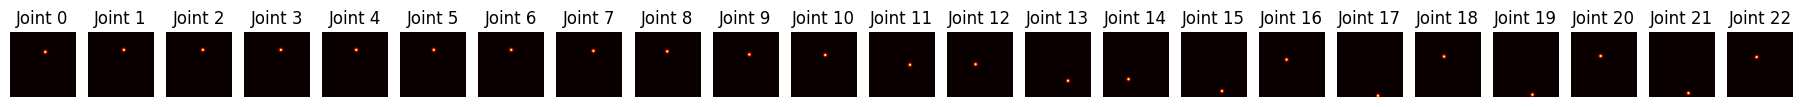

In [66]:
# Visualization (Optional)
import matplotlib.pyplot as plt

plt.figure(figsize=(23, 4))
for j in range(23):
    plt.subplot(1, 23, j+1)
    plt.imshow(heatmap[5][j].cpu().numpy(), cmap='hot')
    plt.title(f'Joint {j}')
    plt.axis('off')
plt.show()
#torch.sum(heatmap[1])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 128, 128])


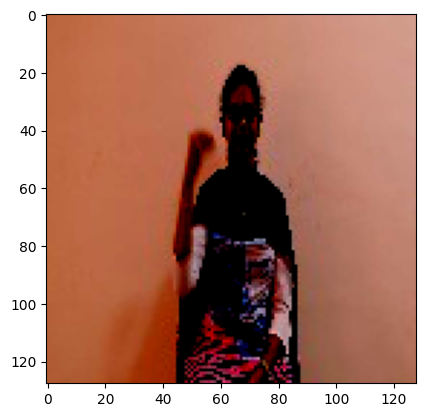

In [67]:
show_image(image[5])

In [68]:
# grid_x, grid_y = torch.meshgrid(torch.arange(64,),
#                                      torch.arange(64,),
#                                      indexing='ij')

# grid_x, grid_y
torch.sum(heatmap[4][0])

tensor(25.1327)

In [69]:
from PIL import Image


def get_image_dimensions(image_path):
    with Image.open(image_path) as img:
        width, height = img.size
    return width, height

# Example usage
image_path = "/kaggle/working/ISL/Corpus/ISL_CSLRT_Corpus/Frames_Sentence_Level/i really appreciate it/7/i really appreciate it (42).jpg"
width, height = get_image_dimensions(image_path)
print("Width:", width)
print("Height:", height)

#3,4,5,6 - 1920, 1080,     1,2 - Width: 240 Height: 320 


Width: 1920
Height: 1080


In [70]:
# #ind = random.choice(range(16))
# for ind in range(len(pose)):
#   show_image(image[ind]) #, show_image(poses[ind])

In [71]:
import os
print(len(os.listdir("/kaggle/working/speech-sign_language/img")),
      len(os.listdir("/kaggle/working/speech-sign_language/img2")),
      len(os.listdir("/kaggle/working/speech-sign_language/pose_array")),
      len(os.listdir("/kaggle/working/speech-sign_language/pose2")),
      len(os.listdir("/kaggle/working/speech-sign_language/pose")),)

18806 0 18806 0 18806


In [72]:
batch_size=2
n_frames=5

In [73]:
# torch.Size([2, 256, 8, 8]) torch.Size([2, 128, 16, 16]) torch.Size([2, 64, 32, 32]) torch.Size([2, 32, 64, 64])
# d = torch.randn((3,3,128,128))
# deconv = deconv_block2(3,16)
# deconv(d).shape

In [74]:
def checkGrad(model, loss=None, model_name='generator', verbose=False):
  if not verbose:
    grad = {"model": model_name}
    if loss:
      if verbose:
        print("loss grad : ", loss.grad)
      grad["Loss "] =  loss.grad.item()

    for name, param in model.named_parameters():
        if param.grad is not None:
            if verbose:
              print(model_name+ " : ", name, param.grad.sum())
            grad[name] = param.grad.sum().item()

        else:
            if verbose:
              print(model_name + " : ", name, param.grad)
            grad[name] = param.grad.sum().item()

    return grad

def weights_init_normal(m):
    classname = m.__class__.__name__
    if classname.find("Conv") != -1:
        torch.nn.init.normal_(m.weight.data, 0.0, 0.02)
    elif classname.find("BatchNorm2d") != -1:
        torch.nn.init.normal_(m.weight.data, 1.0, 0.02)
        torch.nn.init.constant_(m.bias.data, 0.0)

def init_weights_gan(module):
    if isinstance(module, (nn.Conv2d, nn.ConvTranspose2d, nn.Linear, nn.Embedding)):
        nn.init.normal_(module.weight, mean=0.0, std=0.02)
        if not isinstance(module, nn.Embedding) and module.bias is not None:
            nn.init.constant_(module.bias, 0.0)

def clip_weights_gan(model, min_val=-0.03, max_val=0.03):
    for param in model.parameters():
        param.data.clamp_(min=min_val, max=max_val)

def find_max_min_weights(model):
    max_weight = float('-inf')
    min_weight = float('inf')

    # Iterate through all parameters of the model
    for param in model.parameters():
        if param.requires_grad and len(param.shape) > 1:  # Only consider trainable parameters and exclude bias terms
            max_w = torch.max(param)
            min_w = torch.min(param)
            max_weight = max(max_weight, max_w)
            min_weight = min(min_weight, min_w)

    return max_weight, min_weight

def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)


In [76]:

def check_weight_std(model):
    weights = [param.data for param in model.parameters() if len(param.data.size()) > 1]
    std_devs = [torch.std(w) for w in weights]
    return std_devs




In [77]:
import torch
import torch.nn as nn
import torchvision.models as models
import torch.nn.functional as F

class SkeletonToImageLoss(nn.Module):
    def __init__(self, lambda_fm =0.1, lambda_mae=0.6, lambda_bce=1.0,device="cuda"):
        super(SkeletonToImageLoss, self).__init__()
        # Initialize the VGG-19 model and set it to evaluation mode
        self.vgg = models.vgg19(pretrained=True).to(device).features
        self.vgg.eval()
        for param in self.vgg.parameters():
            param.requires_grad = False

        # Define the layers to use for feature matching
        self.layer_names = ['conv1_2', 'conv2_2', 'conv3_2', 'conv4_2', 'conv5_2']
        # Corrected: Map layer names to indices
        self.layer_indices = {name: i for i, name in enumerate(self.layer_names)}

        # Define the weights for each layer (these may need to be tuned)
        self.layer_weights = {'conv1_2': 0.4, 'conv2_2': 0.6, 'conv3_2': 0.8, 'conv4_2': 0.85, 'conv5_2': 1.0}


        # Regularization factor for feature matching loss (may need to be tuned)
        self.lambda_fm = lambda_fm
        self.criterion_mae = nn.L1Loss()  # Mean Absolute Error
        self.lambda_mae = lambda_mae
        self.lambda_bce = lambda_bce

    def vgg_features(self, x, layer_name):
        # Extract features from the VGG-19 model up to the specified layer
        for i in range(self.layer_indices[layer_name] + 1):
            x = self.vgg[i](x)
        return x


    def forward(self, generated_images, target_images):

        # Compute binary cross entropy loss
        bce_loss = F.binary_cross_entropy_with_logits(generated_images, target_images, reduction='mean')

        # Compute feature matching loss
        fm_loss = 0.0
        for name, weight in self.layer_weights.items():
            gen_features = self.vgg_features(generated_images, name)
            target_features = self.vgg_features(target_images, name)
            fm_loss += weight * F.l1_loss(gen_features, target_features, reduction='mean') #torch.mean(torch.abs(gen_features - target_features)) #

        mae_loss = self.criterion_mae(generated_images, target_images )
        # Combine the losses
        total_loss = self.lambda_fm * fm_loss + self.lambda_mae* mae_loss + self.lambda_bce * bce_loss #

        return total_loss, (fm_loss, mae_loss)



## Single GPU Training


In [78]:
import matplotlib.pyplot as plt

def show_image(tensor, filename = "image.png"):
  """Displays an image from a PyTorch tensor.

  Args:
    tensor: A PyTorch tensor of shape (C, H, W).

  Returns:
    None.
  """

  #c, h, w = tensor.shape
  tensor = tensor.permute(1,2,0)
  # Convert the tensor to a NumPy array.
  image = tensor.cpu().detach().numpy()
  #img = Image.fromarray(image)
  # Convert the color channels from BGR to RGB.
  #image = image[:, :, ::-1]

  # Show the image.
  plt.imshow(image)
  plt.savefig(f'kaggle/working/{filename}')
  plt.show()

In [79]:
# show_image(generated_image2.squeeze())

In [80]:
import cv2
import os

def images_to_video(image_folder, video_name, fps=30):
    images = [img for img in os.listdir(image_folder) if img.endswith(".png")]
    frame = cv2.imread(os.path.join(image_folder, images[0]))
    height, width, layers = frame.shape

    video = cv2.VideoWriter(video_name, cv2.VideoWriter_fourcc(*'mp4v'), fps, (width, height))

    for image in images:
        video.write(cv2.imread(os.path.join(image_folder, image)))

    cv2.destroyAllWindows()
    video.release()

# # Example Usage
# images_folder = "path/to/your/images"
# video_name = "output_video.mp4"
# images_to_video(images_folder, video_name)


In [81]:
!rm -r /kaggle/working/speech-sign_language/gen_output1

rm: cannot remove '/kaggle/working/speech-sign_language/gen_output1': No such file or directory


In [82]:
def save_image(batch, epoch, step, loss,  directory="/kaggle/working/images/unet_output1", is_pose =False, data_set="train", reverse_normalize=True):
    """
    Save a batch of torch tensors as images in .jpg format.

    Parameters:
    - batch: Input batch of torch tensors.
    - file_paths: List of paths to save the images.
    - reverse_normalize: If True, reverse the normalization process.

    Example:
    - save_batch_as_images(batch, ['output_1.jpg', 'output_2.jpg'], reverse_normalize=True)
    """
    if not os.path.exists(directory):
      os.mkdir(directory)

    path = os.path.join(directory, f"{data_set}: Epoch- {epoch}_Step- {step}_Loss- {loss}")
    if not os.path.exists(path):
      os.mkdir(path)

    if is_pose:
      file_paths = [os.path.join(path, f"pose_file-{ind}") for ind in range(len(batch))]
    else:
      file_paths = [os.path.join(path, f"file-{ind}") for ind in range(len(batch))]


    # Create a reverse normalization transform
    reverse_transform = transforms.Compose([
        transforms.Normalize(mean=[-1, -1, -1], std=[2, 2, 2]),  # Reverse the normalization
        #transforms.ToPILImage()  # Convert tensor to PIL image
    ])

    for tensor, file_path in zip(batch, file_paths):
        # Reverse the normalization if needed
        if reverse_normalize:
            tensor = reverse_transform(tensor)

        to_pil = transforms.ToPILImage()
        pil_image = to_pil(tensor)

        # Convert the tensor to a NumPy array and adjust its data type
        # array = (255 * tensor.permute(1, 2, 0).cpu().numpy()).astype(np.uint8)

        # # Create an image from the array
        # image = Image.fromarray(array)


        # Save the PIL Image
        pil_image.save(f'{file_path}.png')
        # # Save the image

In [63]:
!pip install -q neptune


## Using skeleton to image


In [83]:
import json
import os
from torchvision import transforms
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from PIL import Image
import torch
import torch.nn.functional as F
import logging
import random

torch.manual_seed(42)
random.seed(42)

mean_values = [0.485, 0.456, 0.406]
std_values = [0.229, 0.224, 0.225]

# Create a PyTorch transform for ImageNet normalization
imagenet_normalize = transforms.Compose([
    transforms.ToTensor(),  # Convert PIL image to PyTorch tensor
    transforms.Normalize(mean=mean_values, std=std_values)
])



class PoseGANDataset(Dataset):
    def __init__(self, json_file_path, image_dir, pose_dir, n_samples=None):
        self.json_file_path = json_file_path
        self.image_dir = image_dir
        self.pose_dir = pose_dir
        self.data = self._load_json_and_shuffle(n_samples)
        self.max = max

        self.transform = transforms.Compose([
          transforms.ToTensor(),  # Convert PIL image to PyTorch tensor
          transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize to [-1, 1] for RGB images
      ])

    def _load_json_and_shuffle(self,n_samples):
        with open(self.json_file_path, 'r') as json_file:
            if n_samples is not None:
              data = json.load(json_file)
              data = random.sample(data, n_samples)
            else:
              data = json.load(json_file)
        for i in range(50):
          data = random.sample(data, len(data))
        return data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        sample = self.data[idx]
        target = sample[1]
        # Pad or crop the target images to match the specified width and height
        target_image = self.transform(Image.open(os.path.join(self.image_dir, target)).convert('RGB'))

        input_image = self.transform(Image.open(os.path.join(self.image_dir, sample[0])).convert('RGB'))
        img_class = int(sample[0].split("_")[0].strip())
        #print("input shape: ", input_image.shape)

        pose = self.get_pose_label(target)

        result = {
            'input_image': input_image,
            'pose': pose,
            'img_class': img_class,
            'target_image': target_image

        }
        #print(result["input_image"].shape, result["pose"].shape, result["target_images"])
        return result

    def get_pose_label(self, img_name ):
        # Example: Extract pose information from the last image (assuming pose image is grayscale)
        pose_image = Image.open(os.path.join(self.pose_dir, img_name))
        pose_image = transforms.ToTensor()(pose_image)
        return pose_image


orig_img = {ind: {"width": 240, 'height': 320} if ind < 3 else {"width": 1920, "height": 1080} for ind in range(1, 8)}


def rescale_landmarks(landmarks, orig_width, orig_height, new_width, new_height):
    # Step 1: Scale the coordinates from [0, 1] to the original image shape
    scaled_landmarks = landmarks * np.array([orig_width, orig_height])
    
    # Step 2: Rescale the coordinates to the new image shape
    rescaled_landmarks = scaled_landmarks * np.array([new_width / orig_width, new_height / orig_height])
    
    # Step 3: Round the rescaled landmarks to the nearest integer values
    rescaled_landmarks = np.round(rescaled_landmarks).astype(int)
    
    return rescaled_landmarks

class PoseGANDataset2(Dataset):
    def __init__(self, json_file_path, image_dir, pose_dir, pose_array_dir, n_samples=None):
        self.json_file_path = json_file_path
        self.image_dir = image_dir
        self.pose_dir = pose_dir
        self.pose_array_dir = pose_array_dir
        self.data = self._load_json_and_shuffle(n_samples)
        self.max = max

        self.transform = transforms.Compose([
          transforms.ToTensor(),  # Convert PIL image to PyTorch tensor
          transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize to [-1, 1] for RGB images
      ])

    def _load_json_and_shuffle(self,n_samples):
        with open(self.json_file_path, 'r') as json_file:
            if n_samples is not None:
              data = json.load(json_file)
              data = random.sample(data, n_samples)
            else:
              data = json.load(json_file)
        for i in range(50):
          data = random.sample(data, len(data))
        return data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        sample = self.data[idx]
        
        target = sample[1]
        pose_path = os.path.join(self.pose_array_dir, target + "_landmarks.npy")

        # Pad or crop the target images to match the specified width and height
        target_image = self.transform(Image.open(os.path.join(self.image_dir, target)).convert('RGB'))

        input_image = self.transform(Image.open(os.path.join(self.image_dir, sample[0])).convert('RGB'))
        img_class = int(sample[0].split("_")[0].strip())
        #print("input shape: ", input_image.shape)
        pose = np.load(pose_path, allow_pickle=True)[:23*4] #torch.from_numpy(
        pose_flatten = rescale_landmarks(pose.reshape(23, 4)[:,:2],
            orig_img[img_class]['width'], orig_img[img_class]['height'], 128, 128).reshape(-1)
        pose_flatten = torch.Tensor(pose_flatten)
        #print("flattened pose: ", pose_flatten)
        heatmap = create_heatmaps(pose_flatten,128, 128, 23)
        pose = self.get_pose_label(target)

        result = {
            'input_image': input_image,
            'img_class': img_class,
            'target_image': target_image,
            'heat_map': heatmap,
            'pose': pose

        }
        #print(result["input_image"].shape, result["pose"].shape, result["target_images"])
        return result

    def get_pose_label(self, img_name ):
        # Example: Extract pose information from the last image (assuming pose image is grayscale)
        pose_image = Image.open(os.path.join(self.pose_dir, img_name))
        pose_image = transforms.ToTensor()(pose_image)
        return pose_image



# # Example usage

width = 128
height = 128
json_file = '/kaggle/working/speech-sign_language/skeleton_img.json'
image_dir = '/kaggle/working/speech-sign_language/img'
pose_dir = '/kaggle/working/speech-sign_language/pose'
image_dir2 = '/kaggle/working/speech-sign_language/img2'
pose_dir2 = '/kaggle/working/speech-sign_language/pose2'



dataset = PoseGANDataset2(json_file, image_dir, pose_dir, pose_array_dir)
dataloader = DataLoader(dataset, batch_size=16, shuffle=True, num_workers=4)


# # Example usage

# width = 128
# height = 128
# json_file = '/kaggle/working/speech-sign_language/skeleton_img.json'
# image_dir = '/kaggle/working/speech-sign_language/img'
# pose_dir = '/kaggle/working/speech-sign_language/pose'
# image_dir2 = '/kaggle/working/speech-sign_language/img2'
# pose_dir2 = '/kaggle/working/speech-sign_language/pose2'

# # json_file = '/content/sample_data/speech-sign_language/train.json'
# # image_dir = '/content/sample_data/speech-sign_language/img'
# # pose_dir = '/content/sample_data/speech-sign_language/pose'

# dataset = PoseGANDataset(json_file, image_dir, pose_dir)
# dataloader = DataLoader(dataset, batch_size=16, shuffle=True, num_workers=4)


In [84]:
for batch in dataloader:
    # Access the batch
    input_images = batch['input_image']
    poses = batch['pose']
    target_images = batch['target_image']
    img_class = batch['img_class']
    heatmap = batch["heat_map"]
    #print("Image classes: ", img_class)
    #print(input_images.shape, poses.shape, target_images.shape)
#     print(torch.max(input_images), torch.max(target_images), torch.max(poses))
#     print(torch.min(input_images), torch.min(target_images), torch.min(poses))
    print(input_images.shape, target_images.shape, img_class.shape, heatmap.shape)
    break


torch.Size([16, 3, 128, 128]) torch.Size([16, 3, 128, 128]) torch.Size([16]) torch.Size([16, 23, 128, 128])


In [85]:
import matplotlib.pyplot as plt

def show_image(tensor):
  """Displays an image from a PyTorch tensor.

  Args:
    tensor: A PyTorch tensor of shape (C, H, W).

  Returns:
    None.
  """
  print(tensor.shape)
  #c, h, w = tensor.shape
  tensor = tensor.permute(1,2,0)
  # Convert the tensor to a NumPy array.
  image = tensor.cpu().detach().numpy()

  # Convert the color channels from BGR to RGB.
  #image = image[:, :, ::-1]

  # Show the image.
  plt.imshow(image)
  plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 128, 128])


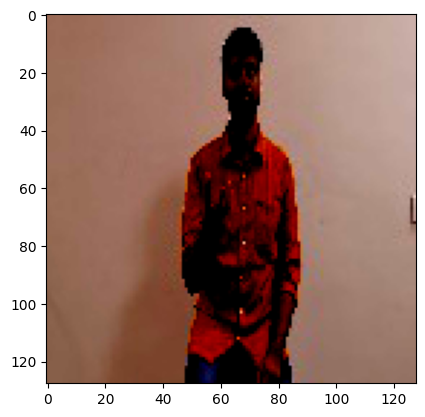

torch.Size([3, 128, 128])


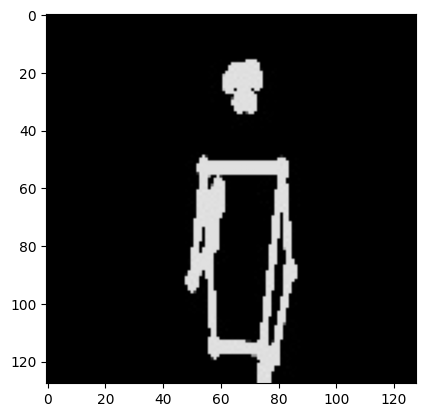

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 128, 128])


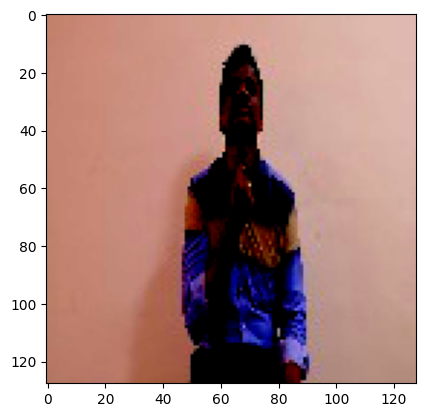

torch.Size([3, 128, 128])


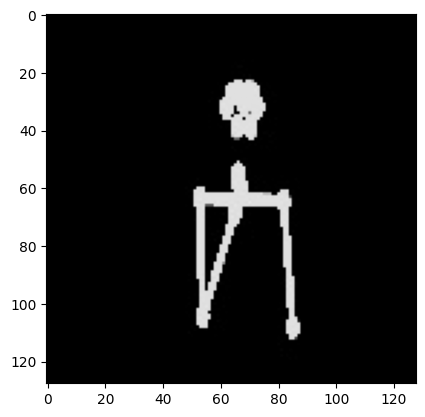

torch.Size([3, 128, 128])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


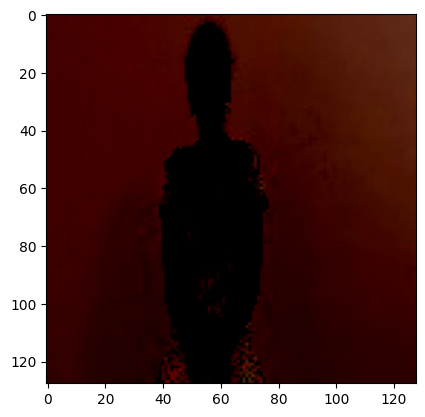

torch.Size([3, 128, 128])


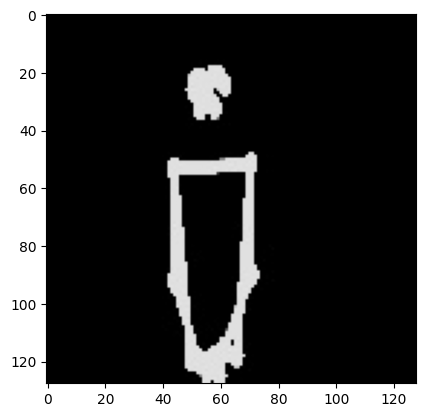

torch.Size([3, 128, 128])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


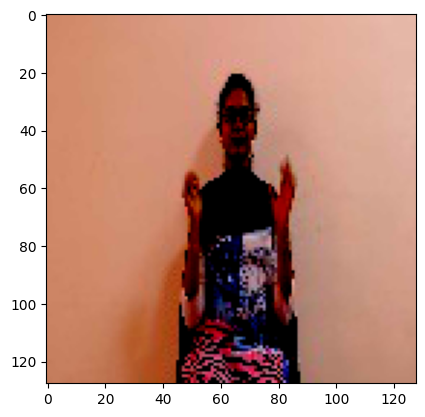

torch.Size([3, 128, 128])


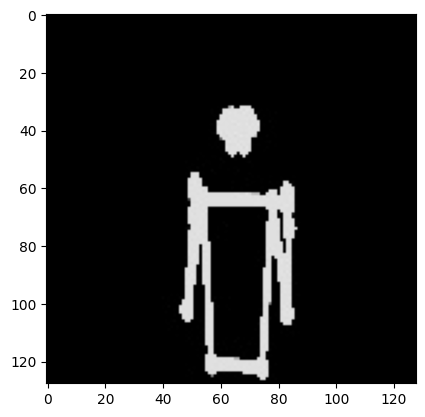

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 128, 128])


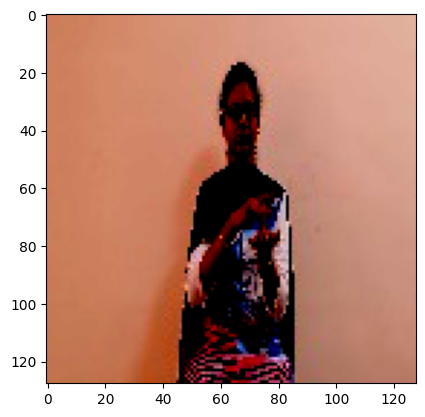

torch.Size([3, 128, 128])


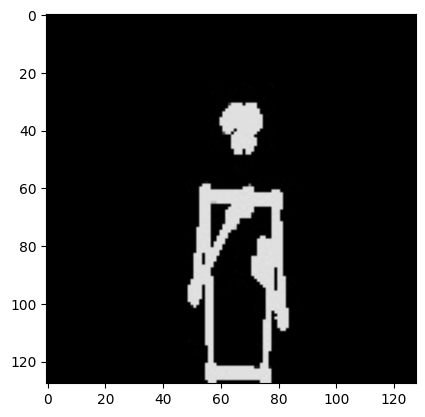

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 128, 128])


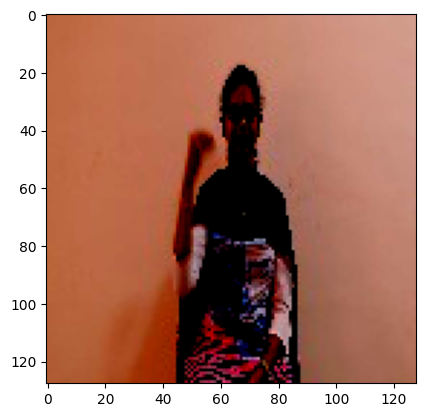

torch.Size([3, 128, 128])


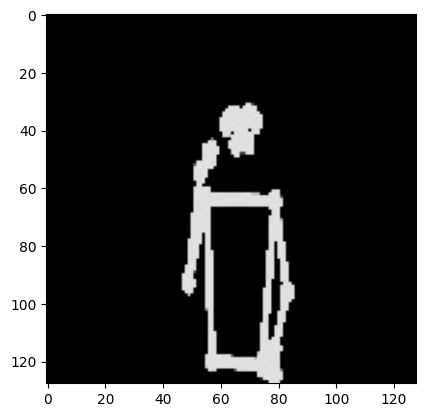

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 128, 128])


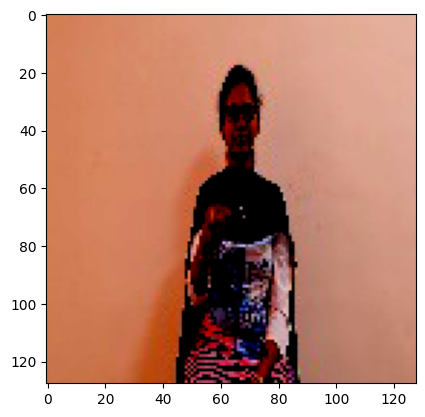

torch.Size([3, 128, 128])


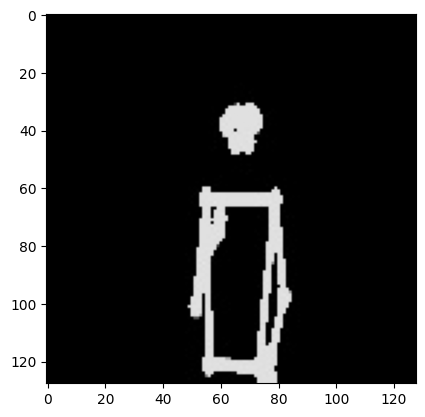

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 128, 128])


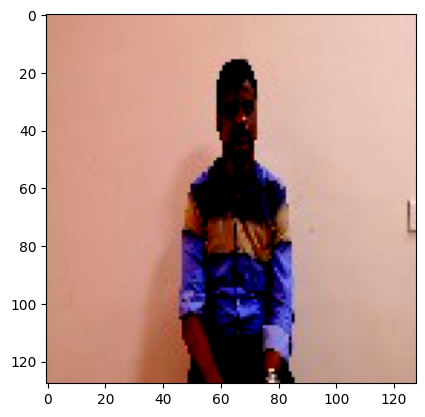

torch.Size([3, 128, 128])


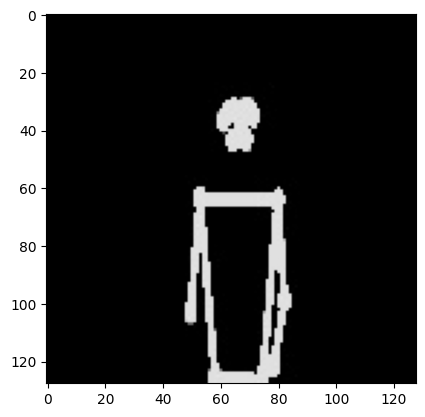

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 128, 128])


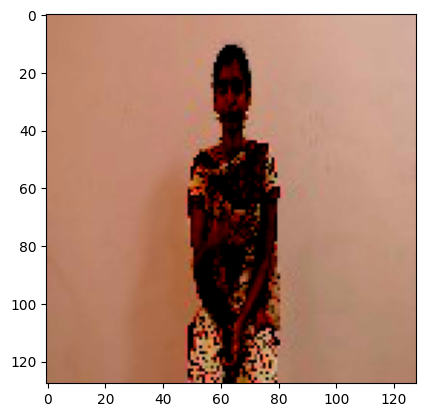

torch.Size([3, 128, 128])


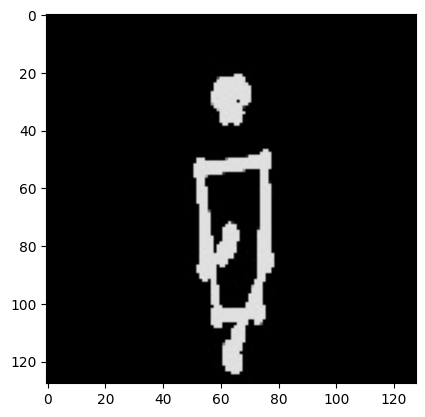

torch.Size([3, 128, 128])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


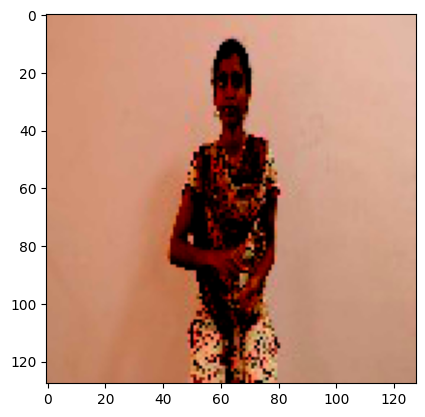

torch.Size([3, 128, 128])


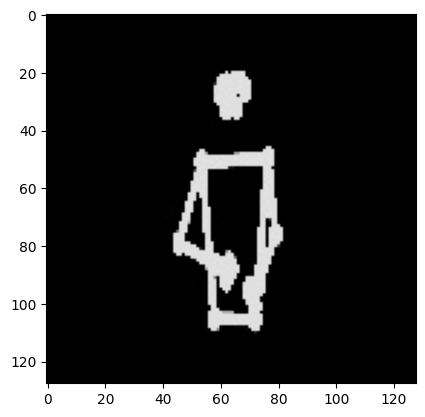

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 128, 128])


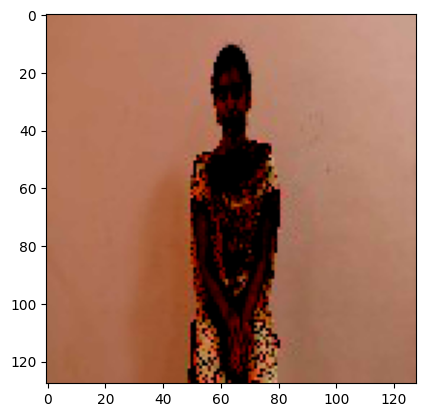

torch.Size([3, 128, 128])


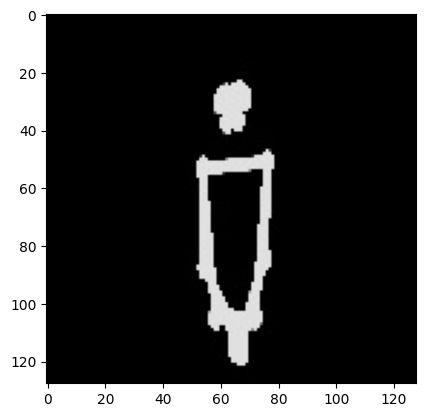

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 128, 128])


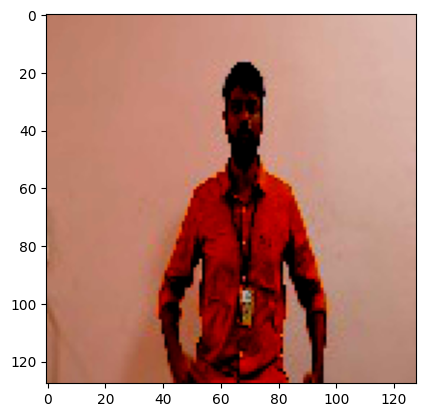

torch.Size([3, 128, 128])


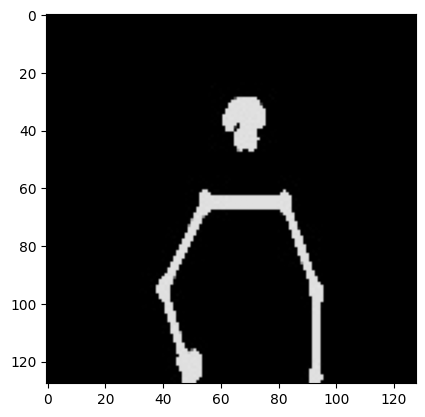

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 128, 128])


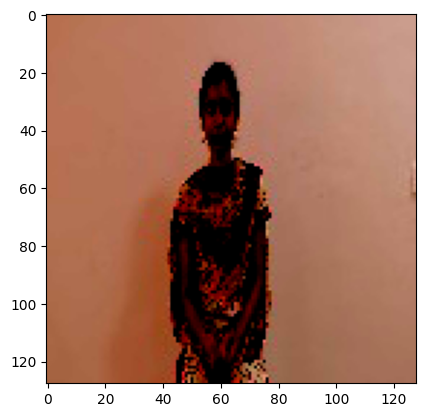

torch.Size([3, 128, 128])


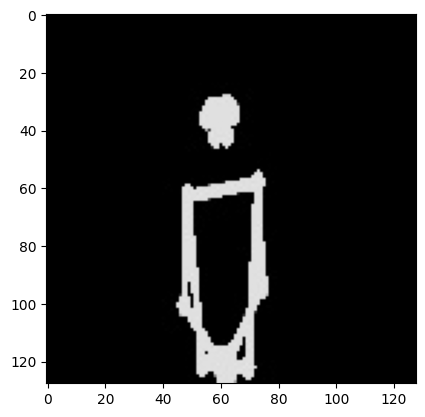

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 128, 128])


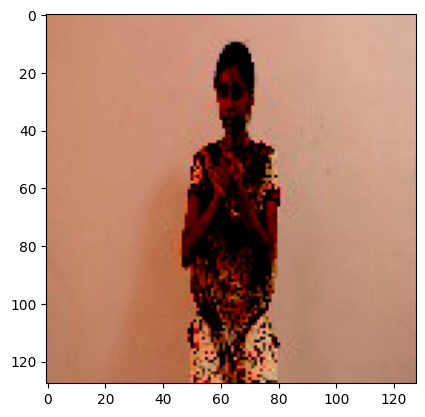

torch.Size([3, 128, 128])


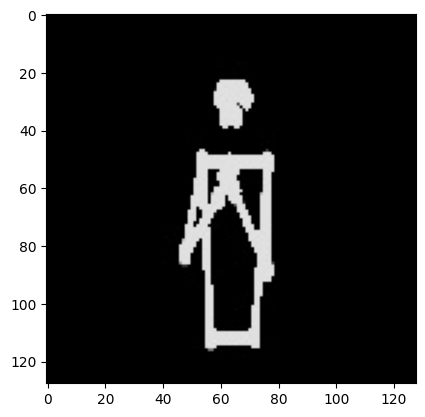

torch.Size([3, 128, 128])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


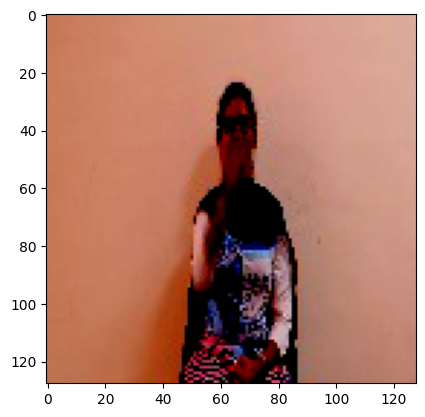

torch.Size([3, 128, 128])


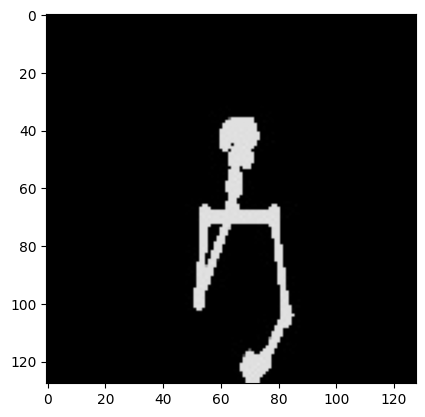

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 128, 128])


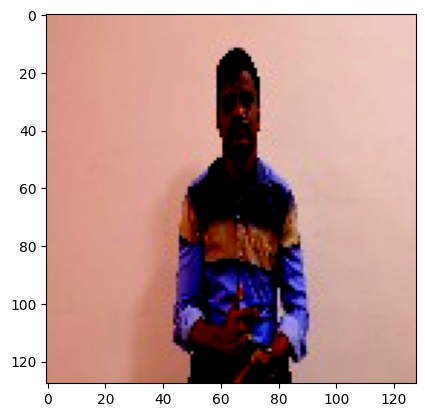

torch.Size([3, 128, 128])


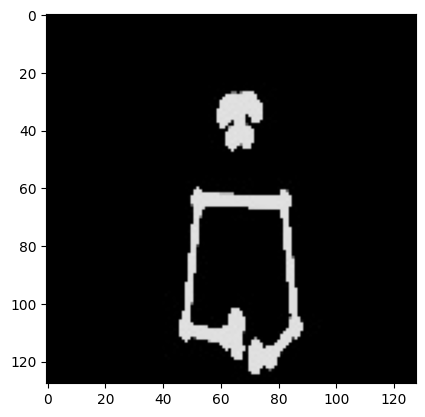

In [86]:
#ind = random.choice(range(16))
for ind in range(len(poses)):
  show_image(target_images[ind]), show_image(poses[ind])

In [87]:
import torch
import torch.nn as nn
import gc

batch_size=2
n_frames= 5
#def conv_block_same(in_channels, out_channels, padding=2, dropout=0.0):
#     return nn.Sequential(
#         nn.Conv2d(in_channels, out_channels, kernel_size=4, padding=padding),
#         nn.BatchNorm2d(out_channels),
#         nn.LeakyReLU(negative_slope),
#         nn.Dropout(dropout)
#     )

# def conv_block3(in_channels, out_channels, padding=2, dropout=0.0):
#     return nn.Sequential(
#         nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=padding),
#         nn.BatchNorm2d(out_channels),
#         nn.LeakyReLU(negative_slope),
#         nn.Dropout(dropout)
#     )

negative_slope=0.2

# Define convolutional block with batch normalization
def conv_block_pool(in_channels, out_channels, padding=2, dropout=0.0):
    return nn.Sequential(
        nn.Conv2d(in_channels, out_channels, kernel_size=5, padding=padding),
        #nn.Conv2d(out_channels, out_channels, kernel_size=5, padding='same'),
        nn.BatchNorm2d(out_channels),
        nn.LeakyReLU(negative_slope),
        nn.MaxPool2d(kernel_size=2, stride=2),
        nn.Dropout(dropout)
    )

def conv_block(in_channels, out_channels, kernel_size=4, stride=2, padding=1, dropout=0.0):
    return nn.Sequential(
        nn.Conv2d(in_channels, out_channels, kernel_size=kernel_size, stride=stride, padding=padding),
        # nn.Conv2d(out_channels, out_channels, kernel_size=5, padding='same'),
        nn.BatchNorm2d(out_channels),
        nn.LeakyReLU(negative_slope),
        nn.Dropout(dropout)
        # No MaxPool2d needed
    )

# when size is 4 , stride is 2, padding is 1
# when size is 3, stride is 1, padding is 2
#when size is 5, stride is 2, padding is 2

# U-Net Encoder
class UNetEncoder(nn.Module):
    def __init__(self, in_channels=3, kernel_size= 5, stride=2, padding= 2, dropout=0.0):
        super(UNetEncoder, self).__init__()
        if kernel_size == 4:
          padding = 1
        # self.conv = conv_block2(in_channels, 16, 'same', dropout)
        # self.conv1 = conv_block2(16, 16, 'same', dropout)
        self.conv2 = conv_block(in_channels, 32, kernel_size, stride, padding, dropout= dropout) #n_channels, out_channels, kernel_size=4, stride=2, padding=1, dropout=0.0
        self.conv3 = conv_block(32,32, kernel_size, 1, 'same', dropout)
        self.conv4 = conv_block(32, 64, kernel_size, stride, padding,dropout=dropout)
        self.conv5 = conv_block(64,64, kernel_size, 1, 'same', dropout)
        self.conv6 = conv_block(64, 128,kernel_size, stride, padding, dropout=dropout)
        self.conv7 = conv_block(128,128, kernel_size, 1, 'same', dropout)
        self.conv8 = conv_block(128, 256, kernel_size, stride, padding,dropout=dropout)
        self.conv9 = conv_block(256, 256, kernel_size, 1, 'same', dropout)
        #self.conv10 = conv_block(256, 256, dropout=dropout)
        #self.conv11 = conv_block2(256,256, 'same', dropout)

    # x2 = 64x64x32, x4 = 32x32x64, x6= 16x16x128, x9=8x8x256
    def forward(self, x):
        # x = self.conv(x)
        # x1 = self.conv1(x)
        #print(x1.shape)
        x2 = self.conv2(x)
        x3 = self.conv3(x2)
        x4 = self.conv4(x3)
        x5 = self.conv5(x4)
        x6 = self.conv6(x5)
        x7 = self.conv7(x6)
        x8 = self.conv8(x7)
        x9 = self.conv9(x8)
        #x10 = self.conv10(x9)
        #x11 = self.conv11(x10)
        return  x9, x6, x4, x2#, x x10,  x8,


# U-Net Encoder
class UNetEncoderMerge(nn.Module):
    def __init__(self, in_channels=6, kernel_size=5, stride=2, padding=2, dropout=0.0):
        super(UNetEncoderMerge, self).__init__()
        if kernel_size == 4:
          padding = 1
        # self.conv = conv_block2(in_channels, 16, 'same', dropout)
        # self.conv1 = conv_block2(16, 16, 'same', dropout)
        self.conv2 = conv_block(in_channels, 32,  kernel_size, stride, padding, dropout=dropout)
        self.conv3 = conv_block(32,32, kernel_size, 1,'same', dropout)
        self.conv4 = conv_block(32, 64,  kernel_size, stride, padding, dropout=dropout)
        self.conv5 = conv_block(64,64, kernel_size, 1, 'same', dropout)
        self.conv6 = conv_block(64, 128,  kernel_size, stride, padding, dropout=dropout)
        self.conv7 = conv_block(128,128, kernel_size, 1, 'same', dropout)
        self.conv8 = conv_block(128, 256,  kernel_size, stride, padding,dropout=dropout)
        self.conv9 = conv_block(256, 256, kernel_size, 1, 'same', dropout)
        #self.conv10 = conv_block(256, 256,dropout=dropout)
        #self.conv11 = conv_block2(256,256, 'same', dropout)

    def forward(self, x):
        # x = self.conv(x)
        # x1 = self.conv1(x)
        x2 = self.conv2(x)
        x3 = self.conv3(x2)
        x4 = self.conv4(x3)
        x5 = self.conv5(x4)
        x6 = self.conv6(x5)
        x7 = self.conv7(x6)
        x8 = self.conv8(x7)
        x9 = self.conv9(x8)
        ##x10 = self.conv10(x9)
        #x11 = self.conv11(x10)
        return x9,  x6, x4, x2 #x x10 x8,

class UNetEncoder_Merge(nn.Module):
    def __init__(self, in_channels=6, kernel_size=5, stride=2, padding=2, dropout=0.0):
        super(UNetEncoder_Merge, self).__init__()
        if kernel_size == 4:
          padding = 1
        # self.conv = conv_block2(in_channels, 16, 'same', dropout)
        # self.conv1 = conv_block2(16, 16, 'same', dropout)
        self.conv2 = conv_block(in_channels, 64,  kernel_size, stride, padding, dropout=dropout)
        self.conv3 = conv_block(64,64, kernel_size, 1,'same', dropout)
        self.conv4 = conv_block(64, 128,  kernel_size, stride, padding, dropout=dropout)
        self.conv5 = conv_block(128,128, kernel_size, 1, 'same', dropout)
        self.conv6 = conv_block(128, 256,  kernel_size, stride, padding, dropout=dropout)
        self.conv7 = conv_block(256, 256, kernel_size, 1, 'same', dropout)
        self.conv8 = conv_block(256, 512,  kernel_size, stride, padding,dropout=dropout)
        self.conv9 = conv_block(512, 512, kernel_size, 1, 'same', dropout)
        #self.conv10 = conv_block(256, 256,dropout=dropout)
        #self.conv11 = conv_block2(256,256, 'same', dropout)

    def forward(self, x):
        # x = self.conv(x)
        # x1 = self.conv1(x)
        x2 = self.conv2(x)
        x3 = self.conv3(x2)
        x4 = self.conv4(x3)
        x5 = self.conv5(x4)
        x6 = self.conv6(x5)
        x7 = self.conv7(x6)
        x8 = self.conv8(x7)
        x9 = self.conv9(x8)
        ##x10 = self.conv10(x9)
        #x11 = self.conv11(x10)
        return x9,  x6, x4, x2 #x x10 x8,


# Define deconvolutional block with batch normalization
def deconv_block(in_channels, out_channels, kernel_size=5, padding='same', dropout=0.0):
    return nn.Sequential(
        nn.Upsample(scale_factor=2, mode='nearest'),
        nn.Conv2d(in_channels, out_channels, kernel_size=kernel_size, padding=padding),
        #nn.Conv2d(out_channels, out_channels, kernel_size=5, padding='same') ,
        nn.BatchNorm2d(out_channels),
        nn.LeakyReLU(negative_slope=0.2),
        nn.Dropout(dropout)
    )

# U-Net Decoder
class UNetDecoder(nn.Module):
    def __init__(self, in_channels=256, kernel_size=5, padding=1, stride=1, dropout=0.0):
        super(UNetDecoder, self).__init__()
        if kernel_size == 4:
          padding = 2
        # self.deconv1 = deconv_block(in_channels, 256, dropout=dropout)
        # self.deconv2 = conv_block2(256, 256 ,'same', dropout)
        self.deconv3 = deconv_block(in_channels, 128, kernel_size,  dropout=dropout)
        self.deconv4 = conv_block(128, 128, kernel_size, 1,'same', dropout)
        self.deconv5 = deconv_block(128, 64, kernel_size, dropout=dropout)
        self.deconv6 = conv_block(64, 64, kernel_size, 1,'same', dropout)
        self.deconv7 = deconv_block(64, 32,kernel_size,   dropout= dropout)
        self.deconv8 = conv_block(32,32, kernel_size, 1,'same', dropout)
        # self.deconv9 = deconv_block(32, 16, dropout=dropout)
        # self.deconv10 = conv_block2(16, 16, 'same', dropout)
        self.deconv11 = deconv_block(32, 3, kernel_size, dropout=dropout) #conv_block2(32, 3, dropout=dropout)
        #self.deconv12 =  conv_block(3,3,kernel_size, 1, 'same', dropout)

    def forward(self, x, x6, x4,  x2): #, x1 x8,
        #print(x.shape, x8.shape, x6.shape, x4.shape, x2.shape)
        # x = self.deconv1(x) + x8
        # x = self.deconv2(x)
        # shapes : x2 = 64x64x32, x4 = 32x32x64, x6= 16x16x128, x9=8x8x256
        #print(x.shape, x6.shape, x4.shape, x2.shape)
        x = self.deconv3(x) + x6
        x = self.deconv4(x)
        x = self.deconv5(x) + x4
        x = self.deconv6(x)
        x = self.deconv7(x) + x2
        x = self.deconv8(x)
        # x = self.deconv9(self.up_sample(x, x2)) #+ x1
        # x = self.deconv10(x)
        x = self.deconv11(x)
        #x = self.deconv12(x)
        return x

# Pose CNN
class PoseCNN(nn.Module):
    def __init__(self,in_channels=3, kernel_size=5, stride=2, padding=2, dropout=0.0):
        super(PoseCNN, self).__init__()
        if kernel_size == 4:
          padding = 1
        self.conv1 = conv_block(in_channels, 32, kernel_size, stride=stride, padding=padding, dropout=dropout)
        self.conv2 = conv_block(32, 64, kernel_size, stride=stride, padding=padding, dropout=dropout)
        self.conv3 = conv_block(64, 128,  kernel_size, stride=stride, padding=padding, dropout=dropout)
        self.conv4 = conv_block(128, 256, kernel_size, stride=stride, padding=padding, dropout=dropout)
        #self.conv5 = conv_block(256, 256)

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.conv4(x)
        #x =  self.conv5(x)
        return x

# x2 = 64x64x32, x4 = 32x32x64, x6= 16x16x128, x9=8x8x256
class PoseCNN2(nn.Module):
    def __init__(self,in_channels=3, kernel_size=5, stride=2, padding=2, dropout=0.0):
        super(PoseCNN2, self).__init__()
        if kernel_size== 4:
          padding=1
        self.conv1 = conv_block(in_channels, 32, kernel_size, stride=stride, padding=padding, dropout=dropout)
        self.conv2 = conv_block(32, 64,  kernel_size, stride=stride, padding=padding, dropout=dropout)
        self.conv3 = conv_block(64, 128,  kernel_size, stride=stride, padding=padding, dropout=dropout)
        self.conv4 = conv_block(128, 256, kernel_size, stride=stride, padding=padding, dropout=dropout)
        #self.conv5 = conv_block(256, 256)

    def forward(self, x):
        x = self.conv1(x)
        x2 = self.conv2(x)
        x3 = self.conv3(x2)
        x4 = self.conv4(x3)
        #x =  self.conv5(x)
        return x4, x3, x2, x

# Instantiate models
pose_cnn = PoseCNN(kernel_size=4)
encoder = UNetEncoder()
decoder = UNetDecoder()
enc = UNetEncoder_Merge()


# Example usage
pose_input = torch.randn((batch_size, 3, 128, 128))
encoder_input = torch.randn((batch_size, 3, 128, 128))
encoder2_input = torch.randn((batch_size, 6, 128, 128))
decoder_input = torch.randn((batch_size * n_frames, 256, 4, 4))

pose_output = pose_cnn(pose_input)
t = enc(encoder2_input)
encoder_output, x6, x4, x2 = encoder(encoder_input) #, x1 x8,
decoder_output = decoder(encoder_output,  x6, x4, x2) #, x1) x8,
print(encoder_output.shape, x6.shape, x4.shape, x2.shape, decoder_output.shape, pose_output.shape) # x1.shape ,
print(t[0].shape)
pose_input = None
encoder_input = None
decoder_input = None
pose_output = None
x1, x2, x3, x4, encoder_output , decoder_output = None, None, None, None, None, None
gc.collect()

torch.Size([2, 256, 8, 8]) torch.Size([2, 128, 16, 16]) torch.Size([2, 64, 32, 32]) torch.Size([2, 32, 64, 64]) torch.Size([2, 3, 128, 128]) torch.Size([2, 256, 8, 8])
torch.Size([2, 512, 8, 8])


62894

In [88]:
import torch
import torch.nn as nn
import gc

negative_slope = 0.2

# Define convolutional block with batch normalization


# Define deconvolutional block with batch normalization
def deconv_block2(in_channels, out_channels, kernel_size=4, stride=2, padding= 1, dropout=0.2):
    return nn.Sequential(
        nn.ConvTranspose2d(in_channels, out_channels, kernel_size=kernel_size, stride=stride, padding=padding),
        #nn.Conv2d(out_channels, out_channels, kernel_size=5, padding='same'),
        nn.BatchNorm2d(out_channels),
        nn.LeakyReLU(negative_slope=0.2),
        nn.Dropout(dropout)
    )

# U-Net Decoder
class UNetDecoderTranspose(nn.Module):
    def __init__(self, in_channels=256,  kernel_size=4, padding=1, stride=1, dropout=0.0):
        super(UNetDecoderTranspose, self).__init__()
        if kernel_size == 5:
          stride= 2
          padding =1
        # self.deconv1 = deconv_block2(in_channels, 256, dropout=dropout)
        # self.deconv2 = conv_block2(256, 256, 'same', dropout=dropout)  # Concatenate channels
        self.deconv3 = deconv_block2(in_channels, 128,kernel_size,padding = padding, dropout=dropout)
        self.deconv4 = conv_block(256, 128, kernel_size, 1,'same', dropout=dropout)  # Concatenate channels
        self.deconv5 = deconv_block2(128, 64,kernel_size,padding= padding,  dropout=dropout)
        self.deconv6 = conv_block(128, 64, kernel_size, 1,'same', dropout=dropout)  # Concatenate channels
        self.deconv7 = deconv_block2(64, 32,kernel_size,padding=padding,  dropout = dropout)
        self.deconv8 = conv_block(64, 32,kernel_size, 1, 'same',dropout=dropout)  # Concatenate channels
        # self.deconv9 = deconv_block2(32*2, 16)
        # self.deconv10 = conv_block2(32, 16, 'same', dropout=dropout)  # Concatenate channels
        self.deconv11 = deconv_block2(32, 3 ,kernel_size, padding=padding,  dropout=dropout)
        self.deconv12 = conv_block(3, 3, kernel_size, 1,'same', dropout=dropout)

    def forward(self, x, x6, x4, x2):
        # x2 = 64x64x32, x4 = 32x32x64, x6= 16x16x128, x9=8x8x256
        #print(x.shape,  x6.shape, x4.shape, x2.shape) #x8.shape,
        #print(x.shape)
        #x = self.deconv1(x)
        #print(x.shape, x8.shape)
        # x = torch.cat([x, x8], dim=1)  # Concatenate channels
        # x = self.deconv2(x)
        x = self.deconv3(x)
        #print(x.shape, x6.shape)
        x = torch.cat([x, x6], dim=1)  # Concatenate channels
        x = self.deconv4(x)
        x = self.deconv5(x)
        x = torch.cat([x, x4], dim=1)  # Concatenate channels
        x = self.deconv6(x)
        x = self.deconv7(x)
        x = torch.cat([x, x2], dim=1)  # Concatenate channels
        x = self.deconv8(x)
        # x = self.deconv9(x)
        # x = torch.cat([x, x1], dim=1)  # Concatenate channels
        # x = self.deconv10(x)
        x = self.deconv11(x)
        x = self.deconv12(x)
        return x


# U-Net Decoder
class UNetDecoderTranspose2(nn.Module):
    def __init__(self, in_channels=256,  kernel_size=4, padding=1, stride=1, dropout=0.0):
        super(UNetDecoderTranspose2, self).__init__()
        if kernel_size == 5:
          padding = 2
        # self.deconv1 = deconv_block2(in_channels, 256, dropout=dropout)
        # self.deconv2 = conv_block2(256, 256, 'same', dropout=dropout)  # Concatenate channels
        self.deconv3 = deconv_block2(in_channels, 128, kernel_size, padding=padding, dropout=dropout)
        self.deconv4 = conv_block(128 *3, 128,kernel_size, 1, 'same', dropout=dropout)  # Concatenate channels
        self.deconv5 = deconv_block2(128, 64, kernel_size,padding=padding, dropout=dropout)
        self.deconv6 = conv_block(64*3, 64,kernel_size, 1, 'same', dropout=dropout)  # Concatenate channels
        self.deconv7 = deconv_block2(64, 32, kernel_size,padding=padding, dropout = dropout)
        self.deconv8 = conv_block(32*3, 32, kernel_size, 1,'same',dropout=dropout)  # Concatenate channels
        # self.deconv9 = deconv_block2(32*2, 16)
        # self.deconv10 = conv_block2(32, 16, 'same', dropout=dropout)  # Concatenate channels
        self.deconv11 = deconv_block2(32, 3 ,kernel_size, padding=padding, dropout=dropout)
        self.deconv12 = conv_block(3, 3, kernel_size, 1,'same', dropout=dropout)

    def forward(self, x, x6, x4, x2, p6, p4, p2):
        # x2 = 64x64x32, x4 = 32x32x64, x6= 16x16x128, x9=8x8x256
        # print(x.shape,  x6.shape, x4.shape, x2.shape) #x8.shape,
        # print("X shape : ", x.shape)
        x = self.deconv3(x)
        x = torch.cat([x, x6, p6], dim=1)  # Concatenate channels
        x = self.deconv4(x)
        x = self.deconv5(x)
        x = torch.cat([x, x4, p4], dim=1)  # Concatenate channels
        x = self.deconv6(x)
        x = self.deconv7(x)
        x = torch.cat([x, x2, p2], dim=1)  # Concatenate channels
        x = self.deconv8(x)
        x = self.deconv11(x)
        x = self.deconv12(x)
        return x

pose_cnn = PoseCNN2()
encoder = UNetEncoderMerge()
decoder = UNetDecoderTranspose2(kernel_size=4)

# Example usage
pose_input = torch.randn((batch_size, 3, 128, 128))
encoder_input = torch.randn((batch_size, 3*2, 128, 128))
decoder_input = torch.randn((batch_size * n_frames, 256, 4, 4))

pose_output, p6, p4,p2 = pose_cnn(pose_input)
encoder_output, x6, x4, x2 = encoder(encoder_input)
decoder_output = decoder(encoder_output,  x6, x4, x2, p6, p4, p2)
print(encoder_output.shape, x6.shape, x4.shape, x2.shape , decoder_output.shape, pose_output.shape, p6.shape, p4.shape, p2.shape)

pose_input = None
encoder_input = None
decoder_input = None
pose_output = None
x1, x2, x3, x4, encoder_output , decoder_output = None, None, None, None, None, None
gc.collect()



/opt/conda/lib/python3.10/site-packages/torch/nn/modules/conv.py:456: UserWarning: Using padding='same' with even kernel lengths and odd dilation may require a zero-padded copy of the input be created (Triggered internally at /opt/conda/conda-bld/pytorch_1704987394225/work/aten/src/ATen/native/Convolution.cpp:1040.)
  return F.conv2d(input, weight, bias, self.stride,


torch.Size([2, 256, 8, 8]) torch.Size([2, 128, 16, 16]) torch.Size([2, 64, 32, 32]) torch.Size([2, 32, 64, 64]) torch.Size([2, 3, 128, 128]) torch.Size([2, 256, 8, 8]) torch.Size([2, 128, 16, 16]) torch.Size([2, 64, 32, 32]) torch.Size([2, 32, 64, 64])


0

In [89]:
import torch
import torch.nn as nn


class GeneratorUNet(nn.Module):
    def __init__(self, image_channels=3, decoder_input_channels = 256, latent_dim_shape= (8,8,256), pose_latent_dim_shape=(8,8,256),
                 kernel_size=5, stride=2, padding=2,dropout=0.0):
        super(GeneratorUNet, self).__init__()

        self.latent_dim_shape = latent_dim_shape
        latent_dim = latent_dim_shape[0] * latent_dim_shape[1] * latent_dim_shape[2]

        # U-Net Encoder
        self.encoder = UNetEncoder(image_channels, kernel_size, stride, padding, dropout=dropout)

        # CNN for processing pose image
        self.pose_cnn = PoseCNN(image_channels, kernel_size, stride, padding, dropout=dropout)

        # Concatenation layer
        self.conv_layer = nn.Sequential(
            conv_block(latent_dim_shape[-1] + pose_latent_dim_shape[-1], 256, kernel_size,1, 'same',dropout=dropout),
            conv_block(256, 256, kernel_size, 1, 'same',dropout = dropout)
        )

        # U-Net Decoder
        self.decoder = UNetDecoder(kernel_size=kernel_size, dropout=dropout)

        # Output layer
        self.output_layer = nn.Sequential(nn.Conv2d(3, image_channels, kernel_size=1), nn.Tanh())


    def forward(self, image, pose,):

        b = image.shape[0]
        #print(image.shape,pose.shape)

        # U-Net encoder for image
        encoded_image, x6, x4, x2 = self.encoder(image) #x8, x1

        # CNN for processing pose image
        processed_pose = self.pose_cnn(pose)

        # Concatenate random vector, flattened encoded image, processed pose, and class label
        concat_input = torch.cat((encoded_image, processed_pose), dim=1)
        conv_output = self.conv_layer(concat_input)
        #print('conv_output shape: ', conv_output.shape)

        # U-Net decoder
        decoded_output = self.decoder(conv_output, x6, x4, x2)#x2,

        # # Output layer
        final_output = self.output_layer(decoded_output)

        return final_output

    
class GeneratorUNet2(nn.Module):
    def __init__(self, image_channels=3, decoder_input_channels = 256, latent_dim_shape= (8,8,256), pose_latent_dim_shape=(8,8,256),
                 kernel_size=4, stride=2, padding=2, dropout=0.0):

        super(GeneratorUNet2, self).__init__()

        self.latent_dim_shape = latent_dim_shape
        latent_dim = latent_dim_shape[0] * latent_dim_shape[1] * latent_dim_shape[2]

        # U-Net Encoder
        self.encoder = UNetEncoderMerge(image_channels+23,kernel_size, stride, padding,  dropout=dropout)

        # U-Net Decoder
        self.decoder = UNetDecoderTranspose(kernel_size=kernel_size, dropout=dropout)

        # Output layer
        self.output_layer = nn.Sequential(nn.Conv2d(3, image_channels, kernel_size=1), nn.Tanh())


    def forward(self, image, pose,):

        image = torch.cat([image, pose], dim=1)

        b = image.shape[0]
        #print(image.shape,pose.shape)

        # U-Net encoder for image
        conv_output,  x6, x4, x2 = self.encoder(image) #x8, x1

        # U-Net decoder
        decoded_output = self.decoder(conv_output, x6, x4, x2)#x2,

        # # Output layer
        final_output = self.output_layer(decoded_output)
        #print("Unet2 shape: " , decoded_output.shape)

        return final_output


class GeneratorUNet3(nn.Module):
    def __init__(self, image_channels=3, decoder_input_channels = 256, latent_dim_shape= (8,8,256), pose_latent_dim_shape=(8,8,256),
                 kernel_size=5, stride=2, padding=2, dropout=0.0):

        super(GeneratorUNet3, self).__init__()

        self.latent_dim_shape = latent_dim_shape
        latent_dim = latent_dim_shape[0] * latent_dim_shape[1] * latent_dim_shape[2]

        # U-Net Encoder
        self.encoder = UNetEncoderMerge(image_channels*2,kernel_size, stride, padding,  dropout=dropout)

        # U-Net Decoder
        self.decoder = UNetDecoder(kernel_size=kernel_size, dropout=dropout)

        # Output layer
        self.output_layer = nn.Sequential(nn.Conv2d(3, image_channels, kernel_size=1), nn.Tanh())


    def forward(self, image, pose,):

        image = torch.cat([image, pose], dim=1)

        b = image.shape[0]
        #print(image.shape,pose.shape)

        # U-Net encoder for image
        conv_output,  x6, x4, x2 = self.encoder(image) #x8, x1

        # U-Net decoder
        decoded_output = self.decoder(conv_output, x6, x4, x2)#x2,

        # # Output layer
        final_output = self.output_layer(decoded_output)

        return final_output
    
    
class GeneratorUNetTranspose(nn.Module):
    def __init__(self, image_channels=3, decoder_input_channels = 256, latent_dim_shape= (8,8,256), pose_latent_dim_shape=(8,8,256),
                 kernel_size=4, stride=2, padding=2, dropout=0.0):
        super(GeneratorUNetTranspose, self).__init__()

        self.latent_dim_shape = latent_dim_shape
        #latent_dim = latent_dim_shape[0] * latent_dim_shape[1] * latent_dim_shape[2]

        # U-Net Encoder
        self.encoder = UNetEncoder(image_channels, kernel_size, stride, padding, dropout=dropout)

        # Concatenation layer
        self.conv_layer = nn.Sequential(
            conv_block(latent_dim_shape[-1] + pose_latent_dim_shape[-1], 256, kernel_size, 1, 'same'),
            conv_block(256, 256, kernel_size, 1, 'same')
        )

        self.pose_cnn = PoseCNN2(23, kernel_size, stride, padding)

        # U-Net Decoder
        self.decoder = UNetDecoderTranspose2(kernel_size=kernel_size,dropout=dropout)

        # Output layer
        self.output_layer = nn.Sequential(nn.Conv2d(3, image_channels, kernel_size=1) , nn.Tanh())


    def forward(self, image, pose):

        b = image.shape[0]
        #print(image.shape,pose.shape)

        # U-Net encoder for image
        conv_output, x6, x4, x2 = self.encoder(image)

        #pose_cnn
        p, p6, p4, p2 = self.pose_cnn(pose)

        conv_output = self.conv_layer(torch.cat([conv_output, p], dim=1))


        #print(conv_output.shape, p.shape, image.shape)
        #print(x6.shape, x4.shape, x2.shape, p6.shape,p4.shape, p2.shape)
        # U-Net decoder
        decoded_output = self.decoder(conv_output,  x6, x4,x2,  p6, p4, p2)#x2,

        # # Output layer
        final_output = self.output_layer(decoded_output)

        return final_output

In [90]:
# # Instantiate the GeneratorUNetLSTM
# n_frames = 5
# image_channels = 3
# decoder_input_channels = 256
# pose_channels = 3
# batch_size=2
# device= "cpu"

# generator = GeneratorUNet( image_channels, decoder_input_channels).to(device)
# generator2 = GeneratorUNet3(image_channels, decoder_input_channels)
# #generator3 = GeneratorUNetTranspose(image_channels, decoder_input_channels)
# generator4 = GeneratorUNet2(image_channels, decoder_input_channels)

# # Example usage
# image = torch.randn((batch_size, image_channels, 128, 128), device=device)
# pose = torch.randn((batch_size, pose_channels, 128, 128),device=device)
# heatmap = torch.randn((batch_size, 23, 128, 128),device=device)
# #class_label = torch.randint(0, class_labels, (batch_size, 1))

# output_frames = generator(image, pose)
# output_frames2 = generator2(image, pose)
# #output_frames3 = generator3(image, pose)
# output_frames4 = generator4(image, heatmap)

# print(output_frames.shape, torch.max(output_frames), torch.min(output_frames))
# print(output_frames2.shape, torch.max(output_frames2), torch.min(output_frames2))
# #print(output_frames3.shape, torch.max(output_frames3), torch.min(output_frames3))
# print(output_frames4.shape, torch.max(output_frames4), torch.min(output_frames4))

# # generator = None
# # output_frames = None
# # image= None
# # pose = None

# #gc.collect()
# count_parameters(generator), count_parameters(generator2), count_parameters(generator3),count_parameters(generator4)

In [91]:
# U-Net Decoder
class UNetDecoderTranspose_(nn.Module):
    def __init__(self, in_channels=256,  kernel_size=4, padding=1, stride=1, dropout=0.0):
        super(UNetDecoderTranspose_, self).__init__()
        if kernel_size == 5:
          stride= 2
          padding =1
        # self.deconv1 = deconv_block2(in_channels, 256, dropout=dropout)
        # self.deconv2 = conv_block2(256, 256, 'same', dropout=dropout)  # Concatenate channels
        self.deconv3 = deconv_block2(in_channels, 256,kernel_size,padding = padding, dropout=dropout)
        self.deconv4 = conv_block(512, 256, kernel_size, 1,'same', dropout=dropout)  # Concatenate channels
        self.deconv5 = deconv_block2(256, 128,kernel_size,padding= padding,  dropout=dropout)
        self.deconv6 = conv_block(256, 128, kernel_size, 1,'same', dropout=dropout)  # Concatenate channels
        self.deconv7 = deconv_block2(128, 64,kernel_size,padding=padding,  dropout = dropout)
        self.deconv8 = conv_block(128, 64,kernel_size, 1, 'same',dropout=dropout)  # Concatenate channels
        # self.deconv9 = deconv_block2(32*2, 16)
        # self.deconv10 = conv_block2(32, 16, 'same', dropout=dropout)  # Concatenate channels
        self.deconv11 = deconv_block2(64, 3 ,kernel_size, padding=padding,  dropout=dropout)
        self.deconv12 = conv_block(3, 3, kernel_size, 1,'same', dropout=dropout)

    def forward(self, x, x6, x4, x2):
        # x2 = 64x64x32, x4 = 32x32x64, x6= 16x16x128, x9=8x8x256
        #print(x.shape,  x6.shape, x4.shape, x2.shape) #x8.shape,
        #print(x.shape)
        #x = self.deconv1(x)
        #print(x.shape, x8.shape)
        # x = torch.cat([x, x8], dim=1)  # Concatenate channels
        # x = self.deconv2(x)
        x = self.deconv3(x)
        #print(x.shape, x6.shape)
        x = torch.cat([x, x6], dim=1)  # Concatenate channels
        x = self.deconv4(x)
        x = self.deconv5(x)
        x = torch.cat([x, x4], dim=1)  # Concatenate channels
        x = self.deconv6(x)
        x = self.deconv7(x)
        x = torch.cat([x, x2], dim=1)  # Concatenate channels
        x = self.deconv8(x)
        # x = self.deconv9(x)
        # x = torch.cat([x, x1], dim=1)  # Concatenate channels
        # x = self.deconv10(x)
        x = self.deconv11(x)
        x = self.deconv12(x)
        return x

class GeneratorMergeUNet2(nn.Module):
    def __init__(self, image_channels=3, decoder_input_channels = 512, latent_dim_shape= (8,8,512), pose_latent_dim_shape=(8,8,512),
                 kernel_size=4, stride=2, padding=2, dropout=0.0):

        super(GeneratorMergeUNet2, self).__init__()

        self.latent_dim_shape = latent_dim_shape
        latent_dim = latent_dim_shape[0] * latent_dim_shape[1] * latent_dim_shape[2]

        # U-Net Encoder
        self.encoder = UNetEncoder_Merge(image_channels+23,kernel_size, stride, padding,  dropout=dropout)

        # U-Net Decoder
        self.decoder = UNetDecoderTranspose_(in_channels=decoder_input_channels, kernel_size=kernel_size, dropout=dropout)

        # Output layer
        self.output_layer = nn.Sequential(nn.Conv2d(3, image_channels, kernel_size=1), nn.Tanh())


    def forward(self, image, pose):

        image = torch.cat([image, pose], dim=1)

        b = image.shape[0]
        #print(image.shape,pose.shape)

        # U-Net encoder for image
        conv_output,  x6, x4, x2 = self.encoder(image) #x8, x1
        #print(conv_output.shape)
        # U-Net decoder
        decoded_output = self.decoder(conv_output, x6, x4, x2)#x2,

        # # Output layer
        final_output = self.output_layer(decoded_output)
        #print("Unet2 shape: " , decoded_output.shape)

        return final_output


generator = GeneratorMergeUNet2()

# Example usage
pose_input = torch.randn((batch_size, 23, 128, 128))
encoder_input = torch.randn((batch_size, 3, 128, 128))
output = generator(encoder_input, pose_input)

print(output.shape)

torch.Size([2, 3, 128, 128])


In [92]:
count_parameters(generator)

13866414

In [93]:
import torch
import torch.nn as nn
import torch.nn.functional as F

def conv_block(in_channels, out_channels, kernel_size, stride, padding, dropout=0.0, norm_layer=nn.InstanceNorm2d):
    layers = [
        nn.Conv2d(in_channels, out_channels, kernel_size, stride, padding, bias=False),
        norm_layer(out_channels),
        nn.LeakyReLU(0.2),
        nn.Dropout(dropout)
    ]
    return nn.Sequential(*layers)

def deconv_block(in_channels, out_channels, kernel_size=4, stride=2, padding=1, dropout=0.2, norm_layer=nn.InstanceNorm2d):
    layers = [
        nn.ConvTranspose2d(in_channels, out_channels, kernel_size, stride, padding, bias=False),
        norm_layer(out_channels),
        nn.LeakyReLU(0.2),
        nn.Dropout(dropout)
    ]
    return nn.Sequential(*layers)

# UNet Encoder with Modified Channel Depths and Instance Normalization
class UNetEncoderMerge2(nn.Module):
    def __init__(self, in_channels=6, kernel_size=5, stride=2, padding=2, dropout=0.0):
        super(UNetEncoderMerge2, self).__init__()
        if kernel_size == 4:
          padding = 1
        self.conv2 = conv_block(in_channels, 64, kernel_size, stride, padding, dropout=dropout)  # Increased depth
        self.conv3 = conv_block(64, 64, kernel_size, 1, 'same', dropout)
        self.conv4 = conv_block(64, 128, kernel_size, stride, padding, dropout=dropout)  # Increased depth
        self.conv5 = conv_block(128, 128, kernel_size, 1, 'same', dropout)
        self.conv6 = conv_block(128, 256, kernel_size, stride, padding, dropout=dropout)  # Increased depth
        self.conv7 = conv_block(256, 256, kernel_size, 1, 'same', dropout)
        self.conv8 = conv_block(256, 512, kernel_size, stride, padding, dropout=dropout)  # Increased depth
        self.conv9 = conv_block(512, 512, kernel_size, 1, 'same', dropout)

    def forward(self, x):
        x2 = self.conv2(x)
        x3 = self.conv3(x2)
        x4 = self.conv4(x3)
        x5 = self.conv5(x4)
        x6 = self.conv6(x5)
        x7 = self.conv7(x6)
        x8 = self.conv8(x7)
        x9 = self.conv9(x8)
        return x9, x6, x4, x2

# UNet Decoder with Increased Channel Depths and Instance Normalization
class UNetDecoderTranspose3(nn.Module):
    def __init__(self, in_channels=512, kernel_size=4, padding=1, stride=2, dropout=0.0):
        super(UNetDecoderTranspose3, self).__init__()
        if kernel_size == 4:
          padding = 1
        self.deconv3 = deconv_block(in_channels, 256, kernel_size, stride, padding, dropout=dropout)  # Adjusted channels
        self.deconv4 = conv_block(512, 256, kernel_size, 1, 'same', dropout=dropout)  # Concatenation adjustment
        self.deconv5 = deconv_block(256, 128, kernel_size, stride, padding, dropout=dropout)
        self.deconv6 = conv_block(256, 128, kernel_size, 1, 'same', dropout=dropout)  # Concatenation adjustment
        self.deconv7 = deconv_block(128, 64, kernel_size, stride, padding, dropout=dropout)
        self.deconv8 = conv_block(128, 64, kernel_size, 1, 'same', dropout=dropout)  # Concatenation adjustment
        self.deconv11 = deconv_block(64, 3, kernel_size, stride, padding, dropout=dropout)
        self.deconv12 = conv_block(3, 3, kernel_size, 1, 'same', dropout=dropout)

    def forward(self, x, x6, x4, x2):
        x = self.deconv3(x)
        x = torch.cat([x, x6], dim=1)
        x = self.deconv4(x)
        x = self.deconv5(x)
        x = torch.cat([x, x4], dim=1)
        x = self.deconv6(x)
        x = self.deconv7(x)
        x = torch.cat([x, x2], dim=1)
        x = self.deconv8(x)
        x = self.deconv11(x)
        x = self.deconv12(x)
        return x

class GeneratorUNet5(nn.Module):
    def __init__(self, image_channels=3, decoder_input_channels=512, latent_dim_shape=(8, 8, 512), pose_channels=23, kernel_size=4, stride=2, padding=2, dropout=0.2):
        super(GeneratorUNet5, self).__init__()
        self.latent_dim_shape = latent_dim_shape
        # latent_dim is not directly used since we're not feeding a flat latent vector but spatial features
        self.encoder = UNetEncoderMerge2(in_channels=image_channels + pose_channels, kernel_size=kernel_size, stride=stride, padding=padding, dropout=dropout)
        self.decoder = UNetDecoderTranspose3(in_channels=decoder_input_channels, kernel_size=kernel_size, stride=stride, padding=padding, dropout=dropout)
        self.output_layer = nn.Sequential(
            nn.Conv2d(3, image_channels, kernel_size=1),
            nn.Tanh()
        )

    def forward(self, image, pose):
        # Concatenate the image and pose information along the channel dimension
        combined_input = torch.cat([image, pose], dim=1)
        # Encode
        conv_output, x6, x4, x2 = self.encoder(combined_input)
        # Decode
        decoded_output = self.decoder(conv_output, x6, x4, x2)
        # Final output
        final_output = self.output_layer(decoded_output)
        return final_output

# Usage example (Assuming CUDA availability and appropriate dimensionality):
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
image_channels = 3
pose_channels = 23 # Number of heatmaps
image_size = 128  # Assuming square images for simplicity
pose = torch.rand(1, pose_channels, image_size, image_size).to(device)  # Example pose tensor
image = torch.rand(1, image_channels, image_size, image_size).to(device)  # Example image tensor
generator = GeneratorUNet5(image_channels=image_channels, pose_channels=pose_channels).to(device)
output_image = generator(image, pose)



In [94]:
# U-Net Encoder
class UNetEncoder2(nn.Module):
    def __init__(self, in_channels=3, kernel_size= 5, stride=2, padding= 2, dropout=0.0):
        super(UNetEncoder2, self).__init__()
        if kernel_size == 4:
          padding = 1
        # self.conv = conv_block2(in_channels, 16, 'same', dropout)
        # self.conv1 = conv_block2(16, 16, 'same', dropout)
        self.conv2 = conv_block(in_channels, 64, kernel_size, stride, padding, dropout= dropout) #n_channels, out_channels, kernel_size=4, stride=2, padding=1, dropout=0.0
        self.conv3 = conv_block(64,64, kernel_size, 1, 'same', dropout)
        self.conv4 = conv_block(64, 128, kernel_size, stride, padding,dropout=dropout)
        self.conv5 = conv_block(128, 128, kernel_size, 1, 'same', dropout)
        self.conv6 = conv_block(128, 256,kernel_size, stride, padding, dropout=dropout)
        self.conv7 = conv_block(256, 256, kernel_size, 1, 'same', dropout)
        self.conv8 = conv_block(256,512, kernel_size, stride, padding,dropout=dropout)
        self.conv9 = conv_block(512, 512, kernel_size, 1, 'same', dropout)
        #self.conv10 = conv_block(256, 256, dropout=dropout)
        #self.conv11 = conv_block2(256,256, 'same', dropout)

    # x2 = 64x64x32, x4 = 32x32x64, x6= 16x16x128, x9=8x8x256
    def forward(self, x):
        # x = self.conv(x)
        # x1 = self.conv1(x)
        #print(x1.shape)
        x2 = self.conv2(x)
        x3 = self.conv3(x2)
        x4 = self.conv4(x3)
        x5 = self.conv5(x4)
        x6 = self.conv6(x5)
        x7 = self.conv7(x6)
        x8 = self.conv8(x7)
        x9 = self.conv9(x8)
        #x10 = self.conv10(x9)
        return  x9, x6, x4, x2#, x x10,  x8


# x2 = 64x64x32, x4 = 32x32x64, x6= 16x16x128, x9=8x8x256
class PoseCNN3(nn.Module):
    def __init__(self,in_channels=3, kernel_size=5, stride=2, padding=2, dropout=0.0):
        super(PoseCNN3, self).__init__()
        if kernel_size== 4:
          padding=1
        self.conv1 = conv_block(in_channels, 64, kernel_size, stride=stride, padding=padding, dropout=dropout)
        self.conv2 = conv_block(64, 128, kernel_size, stride=stride, padding=padding, dropout=dropout)
        self.conv3 = conv_block(128, 256, kernel_size, stride=stride, padding=padding, dropout=dropout)
        self.conv4 = conv_block(256, 256, kernel_size, stride=stride, padding=padding, dropout=dropout)
        #self.conv5 = conv_block(256, 256)

    def forward(self, x):
        x = self.conv1(x)
        x2 = self.conv2(x)
        x3 = self.conv3(x2)
        x4 = self.conv4(x3)
        #x =  self.conv5(x)
        return x4, x3, x2, x

class UNetDecoderTranspose4(nn.Module):
    def __init__(self, in_channels=512,  kernel_size=4, padding=1, stride=2, dropout=0.0):
        super(UNetDecoderTranspose4, self).__init__()
        if kernel_size == 5:
          padding = 2
        self.deconv3 = deconv_block(in_channels, 256, kernel_size, stride, padding, dropout=dropout)  # Adjusted channels
        self.deconv4 = conv_block(256 *3, 256, kernel_size, 1, 'same', dropout=dropout)  # Concatenation adjustment
        self.deconv5 = deconv_block(256, 128, kernel_size, stride, padding, dropout=dropout)
        self.deconv6 = conv_block(128*3, 128, kernel_size, 1, 'same', dropout=dropout)  # Concatenation adjustment
        self.deconv7 = deconv_block(128, 64, kernel_size, stride, padding, dropout=dropout)
        self.deconv8 = conv_block(64*3, 64, kernel_size, 1, 'same', dropout=dropout)  # Concatenation adjustment
        self.deconv11 = deconv_block(64, 3, kernel_size, stride, padding, dropout=dropout)
        self.deconv12 = conv_block(3, 3, kernel_size, 1, 'same', dropout=dropout)
        
    def forward(self, x, x6, x4, x2, p6, p4, p2):
        # x2 = 64x64x32, x4 = 32x32x64, x6= 16x16x128, x9=8x8x256
#         print(x.shape,  x6.shape, x4.shape, x2.shape, p6.shape, p4.shape, p2.shape) #x8.shape,
        # print("X shape : ", x.shape)
        x = self.deconv3(x)
#         print(x.shape)
        x = torch.cat([x, x6, p6], dim=1)  # Concatenate channels
        x = self.deconv4(x)
        x = self.deconv5(x)
        x = torch.cat([x, x4, p4], dim=1)  # Concatenate channels
        x = self.deconv6(x)
        x = self.deconv7(x)
        x = torch.cat([x, x2, p2], dim=1)  # Concatenate channels
        x = self.deconv8(x)
        x = self.deconv11(x)
        x = self.deconv12(x)
        return x

class GeneratorUNetBig(nn.Module):
    def __init__(self, image_channels=3, decoder_input_channels = 512, latent_dim_shape= (8,8,512), pose_latent_dim_shape=(8,8,256),
                 kernel_size=4, stride=2, padding=2, dropout=0.0):
        super(GeneratorUNetBig, self).__init__()

        self.latent_dim_shape = latent_dim_shape
        #latent_dim = latent_dim_shape[0] * latent_dim_shape[1] * latent_dim_shape[2]

        # U-Net Encoder
        self.encoder = UNetEncoder2(image_channels, kernel_size, stride, padding, dropout=dropout)

        # Concatenation layer
        self.conv_layer = nn.Sequential(
            conv_block(latent_dim_shape[-1] + pose_latent_dim_shape[-1], 512, kernel_size, 1, 'same'),
            conv_block(512, 512, kernel_size, 1, 'same')
        )

        self.pose_cnn = PoseCNN3(23, kernel_size, stride, padding)

        # U-Net Decoder
        self.decoder = UNetDecoderTranspose4(kernel_size=kernel_size,dropout=dropout)

        # Output layer
        self.output_layer = nn.Sequential(nn.Conv2d(3, image_channels, kernel_size=1) , nn.Tanh())


    def forward(self, image, pose):

        b = image.shape[0]
        #print(image.shape,pose.shape)

        # U-Net encoder for image
        conv_output, x6, x4, x2 = self.encoder(image)

        #pose_cnn
        p, p6, p4, p2 = self.pose_cnn(pose)

        conv_output = self.conv_layer(torch.cat([conv_output, p], dim=1))


        #print(conv_output.shape, p.shape, image.shape)
        #print(x6.shape, x4.shape, x2.shape, p6.shape,p4.shape, p2.shape)
        # U-Net decoder
        decoded_output = self.decoder(conv_output,  x6, x4,x2,  p6, p4, p2)#x2,

        # # Output layer
        final_output = self.output_layer(decoded_output)

        return final_output
    

pose_cnn = PoseCNN3(in_channels=23)
encoder = UNetEncoder2()
decoder = UNetDecoderTranspose4(kernel_size=4)
generator = GeneratorUNetBig()

# Example usage
pose_input = torch.randn((batch_size, 23, 128, 128))
encoder_input = torch.randn((batch_size, 3, 128, 128))
decoder_input = torch.randn((batch_size , 512, 8, 8))


print("Generator output: ", generator(encoder_input, pose_input).shape)
# pose_output, p6, p4,p2 = pose_cnn(pose_input)
# encoder_output, x6, x4, x2 = encoder(encoder_input)
# decoder_output = decoder(encoder_output,  x6, x4, x2, p6, p4, p2)
# print(encoder_output.shape, x6.shape, x4.shape, x2.shape , decoder_output.shape, pose_output.shape, p6.shape, p4.shape, p2.shape)
# print(decoder_output.shape)
pose_input = None
encoder_input = None
decoder_input = None
pose_output = None
x1, x2, x3, x4, encoder_output , decoder_output = None, None, None, None, None, None
gc.collect()




Generator output:  torch.Size([2, 3, 128, 128])


0

In [95]:
count_parameters(generator)

27423900

In [96]:
import torch
import torch.nn as nn
import gc
from torch.nn.utils import spectral_norm
import numpy as np

import torch.nn.functional as F
from torch.nn.utils import spectral_norm


class Discriminator(nn.Module):
    def __init__(self, img_height, img_width, dropout= 0.4, emb_dim=64, device="cuda"):
        super(Discriminator, self).__init__()

        # CNN for image encoding #spectral_norm(
         # Embedding layer for one-hot encoded class label
        self.embedding = nn.Sequential(nn.Embedding(num_classes, emb_dim), nn.LeakyReLU(0.2),
                                       nn.Linear(emb_dim, 4096*4), nn.LeakyReLU(0.2))
            
        self.emb_dim = emb_dim
        self.image_encoder = nn.Sequential(
            nn.Conv2d(7, 64, kernel_size=4, stride=2,  padding=1), #stride=2,
            nn.BatchNorm2d(64),
            nn.LeakyReLU(negative_slope),
            nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(negative_slope),
            nn.Conv2d(128, 256, kernel_size=4,stride=2,  padding=1),
            nn.BatchNorm2d(256),
            nn.LeakyReLU(negative_slope),
            nn.Conv2d(256, 256, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(256),
            nn.LeakyReLU(negative_slope),
#             nn.Conv2d(128, 256, kernel_size=4, stride=2,   padding=1),
#             nn.BatchNorm2d(256),
#             nn.LeakyReLU(negative_slope),
        )

        # Flatten layer
        self.flatten = nn.Flatten()

        self.dropout= nn.Dropout(dropout)

        # Linear layer for binary classification based on image features
        self.linear_image = nn.Linear(8192 * 2, 1)

    def forward(self, x, reference_image, class_label):
        print(class_labels.shape)
        # Embed class label
        embedded_class = self.dropout(self.embedding(class_label.long()))#.view(-1, self.emb_dim))
        print("embedded class: ", embedded_class.shape)
        #print("Input shape: ", x[0][1])
        # Input shape: (batch_size, n_frames, img_height, img_width, 3)
        b, c,  h, w = x.shape

        print(x.shape, reference_image.shape, embedded_class.reshape(-1,1,128, 128).shape)
        x = torch.cat([x, reference_image, embedded_class.reshape(-1,1,128, 128)], dim=1)
        # Encode each image using CNN
        x = self.image_encoder(x)
        #print(x.shape)

        # Reshape to (batch_size * n_frames, 128 * (img_height // 16) * (img_width // 16))
        x_flat = self.flatten(x) #torch.cat([self.flatten(x), class_embed], -1)

        x_flat = self.dropout(x_flat)

        img_prob = self.linear_image(x_flat)

        return img_prob

    
class Discriminator2(nn.Module):
    def __init__(self, img_height, img_width, dropout= 0.4, emb_dim=64):
        super(Discriminator2, self).__init__()

        # CNN for image encoding #spectral_norm(
         # Embedding layer for one-hot encoded class label
        self.embedding = nn.Sequential(nn.Embedding(num_classes, emb_dim), nn.LeakyReLU(0.2),
                                       nn.Linear(emb_dim, 4096*4), nn.LeakyReLU(0.2))
            
        self.emb_dim = emb_dim
        self.image_encoder = nn.Sequential(
            nn.Conv2d(4, 64, kernel_size=4, stride=2,  padding=1), #stride=2,
            nn.BatchNorm2d(64),
            nn.LeakyReLU(negative_slope),
            nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(negative_slope),
            nn.Conv2d(128, 256, kernel_size=4,stride=2,  padding=1),
            nn.BatchNorm2d(256),
            nn.LeakyReLU(negative_slope),
            nn.Conv2d(256, 256, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(256),
            nn.LeakyReLU(negative_slope),
#             nn.Conv2d(128, 256, kernel_size=4, stride=2,   padding=1),
#             nn.BatchNorm2d(256),
#             nn.LeakyReLU(negative_slope),
        )

        # Flatten layer
        self.flatten = nn.Flatten()

        self.dropout= nn.Dropout(dropout)

        # Linear layer for binary classification based on image features
        self.linear_image = nn.Linear(8192 * 2, 1)

    def forward(self, x, class_label):
        #print(class_labels.shape)
        # Embed class label
        embedded_class = self.dropout(self.embedding(class_label.long()))#.view(-1, self.emb_dim))
        
        # Input shape: (batch_size, n_frames, img_height, img_width, 3)
        b, c,  h, w = x.shape

        #print(x.shape,embedded_class.reshape(-1,1,128, 128).shape)
        x = torch.cat([x,embedded_class.reshape(-1,1,128, 128)], dim=1)
        # Encode each image using CNN
        x = self.image_encoder(x)
        #print("encoder output shape: ", x.shape)

        # Reshape to (batch_size * n_frames, 128 * (img_height // 16) * (img_width // 16))
        x_flat = self.flatten(x) #torch.cat([self.flatten(x), class_embed], -1)

        x_flat = self.dropout(x_flat)

        #print("x-flat shape: ", x_flat.shape)
        img_prob = self.linear_image(x_flat)

        return img_prob

# Instantiate the conditional discriminator
# num_classes = 10  # Replace with actual number of classes
# img_height = 128
# img_width = 128
# batch_size = 2
# num_classes = 10
# device = "cuda"

# conditional_discriminator = Discriminator(img_height, img_width)
# discriminator = Discriminator2(img_height, img_width)

# reference_image = torch.randn((batch_size, 3, img_height, img_width),device=device)
# #class_labels = Variable(torch.LongTensor(np.random.randint(0, num_classes, batch_size))).to(device)
# class_labels = torch.LongTensor(np.random.randint(0, num_classes, batch_size))
# # Example usage
# input_images = torch.randn((batch_size, 3, img_height, img_width), device=device)
# output_class = conditional_discriminator(input_images, reference_image, class_labels)
# output_class = discriminator(input_images, class_labels)

# print(nn.L1Loss()(output_class, torch.tensor([1,1])))
# print( output_class)  # Should be (batch_size, 1)
# # print(output_lstm)


In [97]:
# print(count_parameters(conditional_discriminator), count_parameters(discriminator))
# reference_image, output_class, conditional_discriminator, discriminator, input_image= None, None, None, None, None
# gc.collect()

In [98]:
import torch
import torch.nn as nn
import torchvision.models as models
import torch.nn.functional as F

def mask_batch_images_with_perimeter(images, n_neighbors=5):
    # Check if the input tensor has 3 channels
    if images.shape[1] != 3:
        raise ValueError("Input images tensor must have 3 channels")
    
    # Compute the mask for all images in the batch
    masks = (images.sum(dim=1) != 0).float()
    
    # Expand the masks to include neighboring pixels
    kernel = torch.ones(1, 1, n_neighbors*2 + 1, n_neighbors*2 + 1).to(images.device)
    expanded_masks = F.conv2d(masks.unsqueeze(1), kernel, padding=n_neighbors)
    expanded_masks = (expanded_masks > 0).squeeze(1).float()
    
    return expanded_masks.unsqueeze(1)


class SkeletonToImageLoss(nn.Module):
    def __init__(self, lambda_fm =0.1, lambda_mae=0.6, lambda_bce=1.0, lambda_mask=5,tv_weight=0.1, ssim_weight=0.9,
                 n_neighbors=5, device="cuda"):
        super(SkeletonToImageLoss, self).__init__()
        # Initialize the VGG-19 model and set it to evaluation mode
        self.vgg = models.vgg19(pretrained=True).to(device).features
        self.vgg.eval()
        for param in self.vgg.parameters():
            param.requires_grad = False

        self.n_neighbors = n_neighbors
        self.lambda_mask = lambda_mask
        # Define the layers to use for feature matching
        self.layer_names = ['conv1_2', 'conv2_2', 'conv3_2', 'conv4_2', 'conv5_2']
        # Corrected: Map layer names to indices
        self.layer_indices = {name: i for i, name in enumerate(self.layer_names)}

        # Define the weights for each layer (these may need to be tuned)
        self.layer_weights = {'conv1_2': 0.4, 'conv2_2': 0.6, 'conv3_2': 0.8, 'conv4_2': 0.85, 'conv5_2': 1.0}


        # Regularization factor for feature matching loss (may need to be tuned)
        self.lambda_fm = lambda_fm
        self.criterion_mae = nn.L1Loss()  # Mean Absolute Error
        self.lambda_mae = lambda_mae
        self.lambda_bce = lambda_bce
        self.tv_weight = tv_weight
        self.ssim_weight = ssim_weight

    def vgg_features(self, x, layer_name):
        # Extract features from the VGG-19 model up to the specified layer
        for i in range(self.layer_indices[layer_name] + 1):
            x = self.vgg[i](x)
        return x


    def forward(self, generated_images, target_images, pose =None, add_metrics=False):

        # Compute binary cross entropy loss
        bce_loss = F.binary_cross_entropy_with_logits(generated_images, target_images, reduction='mean')
    

        # Compute feature matching loss
        fm_loss = 0.0
        for name, weight in self.layer_weights.items():
            gen_features = self.vgg_features(generated_images, name)
            target_features = self.vgg_features(target_images, name)
            fm_loss += weight * F.l1_loss(gen_features, target_features, reduction='mean') #torch.mean(torch.abs(gen_features - target_features)) #

        mae_loss = self.criterion_mae(generated_images, target_images )
        
        if add_metrics:
            ssim_loss = self.ssim_weight * self.ssim_loss(generated_images, target_images)
            tvl = self.tv_weight * self.total_variation_loss(generated_images)
            
        if pose is not None:
            mask = mask_batch_images_with_perimeter(pose, self.n_neighbors)
            mask_generated_images = generated_images * mask
            mask_target_images = target_images * mask
            mask_mae_loss = self.criterion_mae(mask_generated_images, mask_target_images )
            total_loss = self.lambda_fm * fm_loss + self.lambda_mae* mae_loss + self.lambda_mask* mask_mae_loss + self.lambda_bce * bce_loss #
            if add_metrics:
                return total_loss + ssim_loss + tvl, (fm_loss, mae_loss, mask_mae_loss, ssim_loss, tvl)
            else:
                return total_loss, (fm_loss, mae_loss,mask_mae_loss, torch.Tensor([0]), torch.Tensor([0]))

        else:
            # Combine the losses
            total_loss = self.lambda_fm * fm_loss + self.lambda_mae* mae_loss + self.lambda_bce * bce_loss #
            if add_metrics:
                return total_loss + ssim_loss + tvl, (fm_loss, mae_loss, None, ssim_loss, tvl)
            else:            
                return total_loss, (fm_loss, mae_loss, torch.Tensor([0]), torch.Tensor([0]), torch.Tensor([0]))


    def total_variation_loss(self, img):
        batch_size, _, h, w = img.size()
        tv_h = torch.pow(img[:,:,1:,:]-img[:,:,:h-1,:], 2).sum()
        tv_w = torch.pow(img[:,:,:,1:]-img[:,:,:,:w-1], 2).sum()
        return (tv_h + tv_w) / batch_size

    def ssim_loss(self, output, target, C1=0.01**2, C2=0.03**2):
        mu_x = F.avg_pool2d(output, 3, 1, 1)
        mu_y = F.avg_pool2d(target, 3, 1, 1)

        sigma_x = F.avg_pool2d(output**2, 3, 1, 1) - mu_x**2
        sigma_y = F.avg_pool2d(target**2, 3, 1, 1) - mu_y**2
        sigma_xy = F.avg_pool2d(output * target, 3, 1, 1) - mu_x * mu_y

        SSIM_n = (2 * mu_x * mu_y + C1) * (2 * sigma_xy + C2)
        SSIM_d = (mu_x**2 + mu_y**2 + C1) * (sigma_x + sigma_y + C2)

        return torch.clamp((1 - SSIM_n / SSIM_d) / 2, 0, 1).mean()

In [99]:
# generator_skeleton_image_loss.total_variation_loss(generated_image)
# generator_skeleton_image_loss(generated_image, target_image, add_metrics=True)

In [100]:
# def save_models(disc, gen, disc_optimizer= None, gen_optimizer=None, epoch=None, step = None, loss=None, path="/kaggle/working/models"):

#     if not os.path.exists(path):
#         os.mkdir(path)

#     save_dir = os.path.join(path, "unet_checkpoint2.tar")

#     torch.save(
#         {
#             "discriminator_model": disc.state_dict(),
#             "disc_optimizer_state": disc_optimizer.state_dict() if disc_optimizer else None,
#             "generator_model": gen.state_dict(),
#             "gen_optimizer_state": gen_optimizer.state_dict(),
#             "loss": loss ,
#             "epoch": epoch,
#             "last_step": step
#         }, save_dir
#     )

#     return

# def load_models(from_checkpoint=False, path="/kaggle/working/models",
#                lr={'discriminator': 1e-3, 'generator': 2e-3}, device="cuda"):

#     # Initialize models
#     generator = DCGAN(num_classes=9, dropout=0.6).to(device)
#     discriminator = Discriminator4(num_classes= 9).to(device)
#     gen_optimizer = torch.optim.Adam(generator.parameters(), lr=lr['generator'])
#     disc_optimizer = torch.optim.Adam(discriminator.parameters(), lr=lr["discriminator"])

#     epoch = 0
#     last_step = 0
#     loss = {"discriminator_loss": 10, "generator_loss": 20}

#     if from_checkpoint:
#         checkpoint = torch.load(os.path.join(path, "unet_checkpoint2.tar"), map_location=torch.device(device))
#         generator.load_state_dict(checkpoint["generator_model"])
#         discriminator.load_state_dict(checkpoint["discriminator_model"])
#         gen_optimizer.load_state_dict(checkpoint['gen_optimizer_state'])
#         disc_optimizer.load_state_dict(checkpoint['disc_optimizer_state'])

#         epoch = checkpoint.get("epoch", 0)
#         last_step = checkpoint.get("last_step", 0)

#         loss = checkpoint.get('loss', {"discriminator_loss": 10, "generator_loss": 20})

#     return discriminator, generator, disc_optimizer, gen_optimizer, epoch, last_step, loss


In [101]:
def save_models2(gen, gen_optimizer=None, epoch=None, step = None, loss=None, path="/kaggle/working/models"):

    if not os.path.exists(path):
        os.mkdir(path)

    save_dir = os.path.join(path, "unet_checkpoint.tar")

    torch.save(
        {
            "generator_model": gen.state_dict(),
            "gen_optimizer_state": gen_optimizer.state_dict(),
            "loss": loss ,
            "epoch": epoch,
            "last_step": step
        }, save_dir
    )

    return

def load_models2(from_checkpoint=False, path="/kaggle/working/models",
               lr=2e-3, device="cuda"):

    # Initialize models
    generator = GeneratorMergeUNet2().to(device)
    gen_optimizer = torch.optim.Adam(generator.parameters(), lr=lr)

    epoch = 0
    last_step = 0
    loss = 20

    if from_checkpoint:
        checkpoint = torch.load(os.path.join(path, "unet_checkpoint.tar"), map_location=torch.device(device))
        generator.load_state_dict(checkpoint["generator_model"])
        gen_optimizer.load_state_dict(checkpoint['gen_optimizer_state'])

        epoch = checkpoint.get("epoch", 0)
        last_step = checkpoint.get("last_step", 0)

        loss = checkpoint.get('loss',  20)

    return generator, gen_optimizer, epoch, last_step, loss


In [102]:
# import json
# with open("/kaggle/working/speech-sign_language/skeleton_img.json", "r") as f:
#     data  = json.load(f)
    
# for i in range(50):
#     data  = random.sample(data, len(data))
    
# with open("/kaggle/working/speech-sign_language/test_img.json", "w") as f:
#     json.dump(data[: int(len(data) * 0.1)], f)
    
# with open("/kaggle/working/speech-sign_language/train_img.json","w") as f:
#     json.dump(data[int(len(data) * 0.1):], f)

In [103]:
# import json

# with open("/kaggle/working/speech-sign_language/skeleton_img.json", "r") as f:
#     data = json.load(f)
    
# result = []
# for each in data:
#    if int(each[0].split("_")[0]) == 1 or int(each[0].split("_")[0]) != 2:
#     result.append(each)


# len(result),len(data)

# import random 

# for i in range(50):
#     result = random.sample(result , len(result))
    
# with open("/kaggle/working/speech-sign_language/skeleton_train_img.json", "w") as f:
#     json.dump(result[: int(0.1*len(result))], f)

# with open("/kaggle/working/speech-sign_language/skeleton_test_img.json", "w") as f:
#     json.dump(result[int(0.1*len(result)):], f)

In [104]:
import torch
import torch.nn as nn
import torchvision.models as models
import torch.nn.functional as F

def mask_batch_images_with_perimeter(images, n_neighbors=5):
    # Check if the input tensor has 3 channels
    if images.shape[1] != 3:
        raise ValueError("Input images tensor must have 3 channels")
    
    # Compute the mask for all images in the batch
    masks = (images.sum(dim=1) != 0).float()
    
    # Expand the masks to include neighboring pixels
    kernel = torch.ones(1, 1, n_neighbors*2 + 1, n_neighbors*2 + 1).to(images.device)
    expanded_masks = F.conv2d(masks.unsqueeze(1), kernel, padding=n_neighbors)
    expanded_masks = (expanded_masks > 0).squeeze(1).float()
    
    return expanded_masks.unsqueeze(1)


class SkeletonToImageLoss(nn.Module):
    def __init__(self, lambda_fm =0.1, lambda_mae=0.6, lambda_bce=1.0, lambda_mask=5,tv_weight=0.1, ssim_weight=0.9,
                 n_neighbors=5, device="cuda"):
        super(SkeletonToImageLoss, self).__init__()
        # Initialize the VGG-19 model and set it to evaluation mode
        self.vgg = models.vgg19(pretrained=True).to(device).features
        self.vgg.eval()
        for param in self.vgg.parameters():
            param.requires_grad = False

        self.n_neighbors = n_neighbors
        self.lambda_mask = lambda_mask
        # Define the layers to use for feature matching
        self.layer_names = ['conv1_2', 'conv2_2', 'conv3_2', 'conv4_2', 'conv5_2']
        # Corrected: Map layer names to indices
        self.layer_indices = {name: i for i, name in enumerate(self.layer_names)}

        # Define the weights for each layer (these may need to be tuned)
        self.layer_weights = {'conv1_2': 0.4, 'conv2_2': 0.6, 'conv3_2': 0.8, 'conv4_2': 0.85, 'conv5_2': 1.0}


        # Regularization factor for feature matching loss (may need to be tuned)
        self.lambda_fm = lambda_fm
        self.criterion_mae = nn.L1Loss()  # Mean Absolute Error
        self.lambda_mae = lambda_mae
        self.lambda_bce = lambda_bce
        self.tv_weight = tv_weight
        self.ssim_weight = ssim_weight

    def vgg_features(self, x, layer_name):
        # Extract features from the VGG-19 model up to the specified layer
        for i in range(self.layer_indices[layer_name] + 1):
            x = self.vgg[i](x)
        return x


    def forward(self, generated_images, target_images, pose =None, add_metrics=False):

        # Compute binary cross entropy loss
        bce_loss = F.binary_cross_entropy_with_logits(generated_images, target_images, reduction='mean')
    

        # Compute feature matching loss
        fm_loss = 0.0
        for name, weight in self.layer_weights.items():
            gen_features = self.vgg_features(generated_images, name)
            target_features = self.vgg_features(target_images, name)
            fm_loss += weight * F.l1_loss(gen_features, target_features, reduction='mean') #torch.mean(torch.abs(gen_features - target_features)) #

        mae_loss = self.criterion_mae(generated_images, target_images )
        
        if add_metrics:
            ssim_loss = self.ssim_weight * self.ssim_loss(generated_images, target_images)
            tvl = self.tv_weight * self.total_variation_loss(generated_images)
            
        if pose is not None:
            mask = mask_batch_images_with_perimeter(pose, self.n_neighbors)
            mask_generated_images = generated_images * mask
            mask_target_images = target_images * mask
            mask_mae_loss = self.criterion_mae(mask_generated_images, mask_target_images )
            total_loss = self.lambda_fm * fm_loss + self.lambda_mae* mae_loss + self.lambda_mask* mask_mae_loss + self.lambda_bce * bce_loss #
            if add_metrics:
                return total_loss + ssim_loss + tvl, (fm_loss, mae_loss, mask_mae_loss, ssim_loss, tvl)
            else:
                return total_loss, (fm_loss, mae_loss,mask_mae_loss, torch.Tensor([0]), torch.Tensor([0]))

        else:
            # Combine the losses
            total_loss = self.lambda_fm * fm_loss + self.lambda_mae* mae_loss + self.lambda_bce * bce_loss #
            if add_metrics:
                return total_loss + ssim_loss + tvl, (fm_loss, mae_loss, None, ssim_loss, tvl)
            else:            
                return total_loss, (fm_loss, mae_loss, torch.Tensor([0]), torch.Tensor([0]), torch.Tensor([0]))


    def total_variation_loss(self, img):
        batch_size, _, h, w = img.size()
        tv_h = torch.pow(img[:,:,1:,:]-img[:,:,:h-1,:], 2).sum()
        tv_w = torch.pow(img[:,:,:,1:]-img[:,:,:,:w-1], 2).sum()
        return (tv_h + tv_w) / batch_size

    def ssim_loss(self, output, target, C1=0.01**2, C2=0.03**2):
        mu_x = F.avg_pool2d(output, 3, 1, 1)
        mu_y = F.avg_pool2d(target, 3, 1, 1)

        sigma_x = F.avg_pool2d(output**2, 3, 1, 1) - mu_x**2
        sigma_y = F.avg_pool2d(target**2, 3, 1, 1) - mu_y**2
        sigma_xy = F.avg_pool2d(output * target, 3, 1, 1) - mu_x * mu_y

        SSIM_n = (2 * mu_x * mu_y + C1) * (2 * sigma_xy + C2)
        SSIM_d = (mu_x**2 + mu_y**2 + C1) * (sigma_x + sigma_y + C2)

        return torch.clamp((1 - SSIM_n / SSIM_d) / 2, 0, 1).mean()

In [105]:
# import json
# import random

# with open("kaggle/working/speech-sign_language/skeleton_img.json", "r") as f:
#     data = json.load(f)
    
# for i in range(50):
#     data = random.sample(data, len(data))

# with open("/kaggle/working/speech-sign_language/skeleton_train_img.json", "w") as f:
#     json.dump(data[int(0.1*len(data)):], f)

# with open("/kaggle/working/speech-sign_language/skeleton_test_img.json", "w") as f:
#     json.dump(data[:int(0.1*len(data))], f)

In [106]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import transforms
from tqdm import tqdm
import os
import json
from PIL import Image
import random
import torch.nn.functional as F

from torch.optim.lr_scheduler import StepLR


json_file = '/kaggle/working/speech-sign_language/train.json'
image_dir = '/kaggle/working/speech-sign_language/img'
pose_dir = '/kaggle/working/speech-sign_language/pose'
train_path = "/kaggle/working/speech-sign_language/skeleton_train_img.json"
test_path =  "/kaggle/working/speech-sign_language/skeleton_test_img.json"

# Hyperparameters
batch_size = 200#48 #36
D_lr = 0.0002 #9e-4
G_lr = 2e-3 #3e-4
beta1 = 0.5
beta2 = 0.999
epochs = 100
max_train_steps = 50000
current_train_step = 0
device= "cuda" if torch.cuda.is_available() else "cpu"
img_height= 128
img_width= 128
gradient_accumulation_steps = 2
num_classes = 9
k = 2
#n_frames=5
add_metrics = False

save_every= 16
eval_every= 12
check_grad_every = 128
save_image_every= 215
n_samples = 5000
from_checkpoint = True
lambda_L1 = 0.89 #1.0 #0.85
lambda_fm =0.5 #0.15
lambda_mae= 1.0 # 0.3
lambda_bce= 0.5 #1.0
torch.manual_seed(92)
random.seed(92)
latent_dim = 128
lambda_mask = 2.5
n_neighbors = 5
save_dir = "/kaggle/working/images/unet2"

train_dataset = PoseGANDataset2(train_path, image_dir, pose_dir,pose_array_dir=pose_array_dir)
test_dataset = PoseGANDataset2(test_path, image_dir, pose_dir, pose_array_dir=pose_array_dir)
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=8)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True, num_workers=8)

# Initialize models
# generator = GeneratorMergeUNet2().to(device)
#discriminator = Discriminator2(128,128, 0.1).to(device)
generator,  optimizer_G, last_epoch, last_step, loss = load_models2(device=device,from_checkpoint = from_checkpoint,
                                                                                              lr= G_lr)


#initialize weights
#generator.apply(init_weights_gan)
#discriminator.apply(init_weights_gan)

# generator.apply(clip_weights_gan)
# discriminator.apply(clip_weights_gan)

print(find_max_min_weights(generator))
# print(find_max_min_weights(discriminator))
print(count_parameters(generator))


# # Initialize loss functions
# generator_skeleton_image_loss = SkeletonToImageLoss(lambda_fm, lambda_mae, lambda_bce,lambda_mask=lambda_mask, n_neighbors=n_neighbors,device=device)

# # generator_skeleton_image_loss = SkeletonToImageLoss(lambda_fm, lambda_mae, lambda_bce,lambda_mask=lambda_mask, n_neighbors=n_neighbors,device=device)

# # Initialize optimizers
# optimizer_G = optim.Adam(generator.parameters(), lr=G_lr)#, lr=G_lr, betas=(beta1, beta2))#.to(device)
# del optimizer_G
# # Define the scheduler
# scheduler_G = StepLR(optimizer_G, step_size=2, gamma=0.05)

# #last_g_loss = loss["generator_loss"]

# # if last_epoch >= epochs:
# #   last_epoch = 0

# last_epoch = 0
# train_num_batch =len(train_dataloader)
#print("Last training step: ", last_step)

(tensor(1.9456, device='cuda:0', grad_fn=<MaxBackward1>), tensor(-1.7472, device='cuda:0', grad_fn=<MinBackward1>))
13859301


In [107]:
import neptune
# Upload a series of images
from neptune.types import File

# Create a Neptune run object
run = neptune.init_run(
     project="areebamjad/GAN-signlanguages",
    api_token="eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiI1ZDE3NTI0Ny1jMDU1LTQ5NjMtYWRmNi0yYmRmMGU3NjdkYWIifQ==", 
    name="unet-alligator", 
    tags=["UNet2-tanh", f" G_lr={G_lr}"],  # optional
)

# Log a single value
# Specify a field name ("seed") inside the run and assign a value to it
run["seed"] = 0.42

params = {"learning_rate": G_lr, "optimizer": "Adam"}
run["parameters"] = params


log_d_loss = []
log_g_loss = []
grad_log = []

[neptune] [warning] NeptuneWarning: The following monitoring options are disabled by default in interactive sessions: 'capture_stdout', 'capture_stderr', 'capture_traceback', and 'capture_hardware_metrics'. To enable them, set each parameter to 'True' when initializing the run. The monitoring will continue until you call run.stop() or the kernel stops. Also note: Your source files can only be tracked if you pass the path(s) to the 'source_code' argument. For help, see the Neptune docs: https://docs.neptune.ai/logging/source_code/


[neptune] [info   ] Neptune initialized. Open in the app: https://app.neptune.ai/pauljeffrey/GAN-signlanguages/e/GAN-118


In [108]:
for batch in train_dataloader:
    input_image = batch["input_image"].to(device)
    pose = batch["pose"].to(device)
    target_image = batch["target_image"].to(device)
    heatmap = batch["heat_map"].to(device)
    break

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 128, 128])


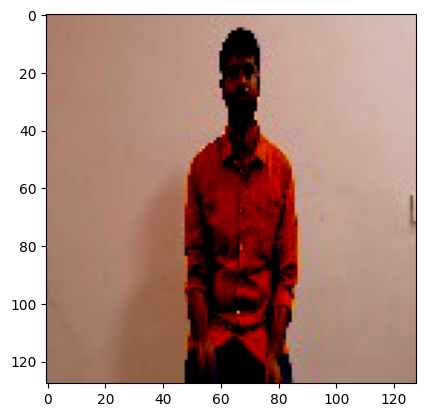

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 128, 128])


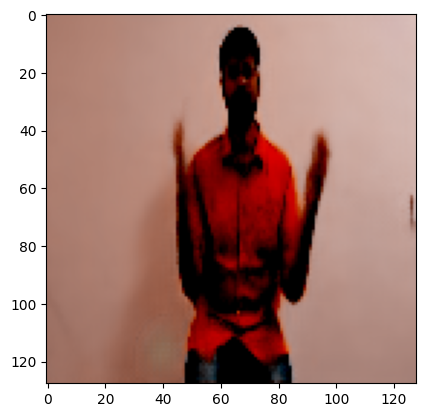

torch.Size([3, 128, 128])


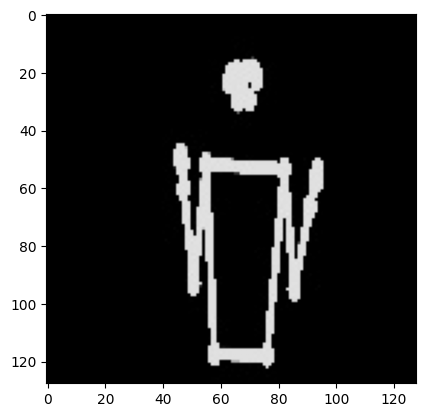

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 128, 128])


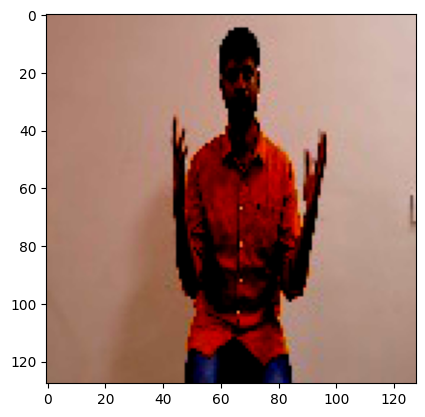

(tensor(-1., device='cuda:0', grad_fn=<MinBackward1>),
 tensor(-1., device='cuda:0'),
 tensor(0.9916, device='cuda:0', grad_fn=<MaxBackward1>),
 tensor(1., device='cuda:0'))

In [109]:
generated_image = generator(input_image, heatmap)
import random
ind = random.choice(range(len(generated_image)))
show_image(input_image[ind]), show_image(generated_image[ind]), show_image(pose[ind]) , show_image(target_image[ind])
torch.min(generated_image), torch.min(target_image), torch.max(generated_image), torch.max(target_image)

In [103]:
# generator_skeleton_image_loss.total_variation_loss(generated_image)
# generator_skeleton_image_loss(generated_image, target_image, add_metrics=False)

In [ ]:
# del generator, optimizer_G
# import gc
# torch.cuda.empty_cache()
# gc.collect()

In [ ]:
# test_g_loss = 5
# last_g_loss = 5

# # for ind, steps in enumerate(train_dataloader):
# #     if ind <= 1439:
# #         break

# # Training loop
# for epoch in range(last_epoch , epochs):
#     train_s_loss = []
#     train_mae_loss = []
#     train_feature_loss = []
#     train_mask_mae_loss = []
#     train_ssim_loss =[]
#     train_tvl = []
    
#     for steps, batch in enumerate(train_dataloader):
#         generator.train()
    
# #         if steps <= last_step:
# #             if steps % 50 == 0:
# #                 print(steps)
# #             continue
#         # Move data to device
#         image = batch["input_image"].to(device).type(torch.float) #torch.randn((batch_size, 3, img_height, img_width)).to(device)
#         pose = batch["pose"].to(device).type(torch.float) #torch.randn((batch_size, 3, img_height, img_width)).to(device)
#         target_image = batch["target_image"].to(device).type(torch.float)
#         img_class = batch["img_class"].to(device).type(torch.float)
#         heatmap = batch["heat_map"].to(device).type(torch.float)

#         generated_image = generator(image, heatmap)
#         #print(masks.shape, generated_images.shape)
#         s_loss , (feature_loss, mae_loss, mask_mae_loss, ssim_loss, tvl) = generator_skeleton_image_loss(generated_image, target_image, pose, add_metrics=add_metrics)


#         train_s_loss.append(s_loss.item())
#         train_mae_loss.append(mae_loss.item())
#         train_feature_loss.append(feature_loss.item())
#         train_mask_mae_loss.append(mask_mae_loss.item())
#         train_ssim_loss.append(ssim_loss.item())
#         train_tvl.append(tvl.item())

#         run["train/mae_loss"].log(mae_loss.item())
#         run["train/s_loss"].log(s_loss.item())
#         run["train/feature_loss"].log(feature_loss.item())
#         run["train/mask_mae_loss"].log(mask_mae_loss.item())
#         run["train/ssim_loss"].log(ssim_loss.item())
#         run["train/tvl"].log(tvl.item())
        
#         s_loss = s_loss / gradient_accumulation_steps
#         s_loss.backward()

#         if steps % gradient_accumulation_steps == 0:
#             #print(f"Updating generator parameters after {steps + 1} steps, {steps/gradient_accumulation_steps} essential steps..")
#             if (steps + 1 ) % (gradient_accumulation_steps * check_grad_every ) == 0:
#               #checkGrad(generator, g_loss, model_name='Generator')
#               print(checkGrad(discriminator, d_loss, model_name='Generator'))
#               grad_log.append(checkGrad(discriminator, d_loss, model_name='Generator'))

#             optimizer_G.step()
#             optimizer_G.zero_grad()


#         if ((steps + 1) /(gradient_accumulation_steps * k)) % save_image_every == 0:
#               print()
#               random_num = random.choice(range(len(generated_image)))
#               show_image(generated_image[random_num])
#               show_image(target_image[random_num])
#               show_image(generated_image[1])
#               show_image(target_image[1])
             
#               print("Saving sample images to folder...")
#               print()
#               save_image(generated_image, epoch, ((steps + 1) /(gradient_accumulation_steps * k)), test_g_loss, directory=save_dir, is_pose = False )
#               # save_image(pose, epoch, ((steps + 1) /(gradient_accumulation_steps * k)), test_g_loss, is_pose = True )

#         if ((steps + 1) /(gradient_accumulation_steps * k)) % eval_every == 0:

#           generator.eval()
#           num_batches = len(test_dataloader)

#           test_mae_loss = 0
#           test_feature_loss = 0
#           test_s_loss = 0
#           test_mask_mae_loss = 0
#           test_ssim_loss = 0
#           test_tvl = 0

#           for ind, batch in enumerate(test_dataloader):
#             # Move data to device
#             image = batch["input_image"].to(device).type(torch.float) #torch.randn((batch_size, 3, img_height, img_width)).to(device)
#             pose = batch["pose"].to(device).type(torch.float) #torch.randn((batch_size, 3, img_height, img_width)).to(device)
#             target_image = batch["target_image"].to(device).type(torch.float)
#             img_class = batch["img_class"].to(device).type(torch.float)
#             heatmap = batch["heat_map"].to(device).type(torch.float)

#             generated_image = generator(image, heatmap)
            
#             eval_s_loss, (eval_feature_loss, eval_mae_loss, eval_mask_mae_loss, eval_ssim_loss, eval_tvl) = generator_skeleton_image_loss(generated_image, target_image, pose, add_metrics=add_metrics)
         
#             test_s_loss += (eval_s_loss.item()/num_batches)
#             test_mae_loss += (eval_mae_loss.item()/num_batches)
#             test_feature_loss += (eval_feature_loss.item()/num_batches)
#             test_mask_mae_loss += (eval_mask_mae_loss.item()/num_batches)
#             test_ssim_loss += (eval_ssim_loss.item()/num_batches)
#             test_tvl += (eval_tvl.item()/num_batches)
   
#           log_g_loss.append(test_g_loss)

#           run["test/mae_loss"].log(test_mae_loss)
#           run["test/feature_loss"].log(test_feature_loss)
#           run["test/s_loss"].log(test_s_loss)
#           run["test/mask_mae_loss"].log(test_mask_mae_loss)
#           run["test/ssim_loss"].log(eval_ssim_loss.item())
#           run["test/tvl"].log(eval_tvl.item())
        
#           save_image(generated_image, epoch, ((steps + 1) /(gradient_accumulation_steps * k)), test_g_loss, directory=save_dir, is_pose = True )


#           n = len(train_mae_loss)
#           print(f"Epoch: {epoch}, step: {steps}")
#           print(f"Train: Skeleton-image loss: {sum(train_s_loss)/n}, MAE loss: {sum(train_mae_loss)/n}, Mask MAE loss: {sum(train_mask_mae_loss)/n}, Feature loss: {sum(train_feature_loss)/n}, SSIM_loss: {sum(train_ssim_loss)/n}, TVL: {sum(train_tvl)/n}")
#           print(f"Test : Skeleton-image loss: {test_s_loss}, MAE loss: {test_mae_loss}, Mask MAE loss: {test_mask_mae_loss}, Feature loss: {test_feature_loss}, SSIM_loss {test_ssim_loss}, TVL {test_tvl} ")
          
#         if ((steps + 1)/(gradient_accumulation_steps * k)) % save_every == 0:
#           if test_mae_loss is not None and last_g_loss > abs(test_mae_loss):
#             print("Saving model checkpoint in the the provided directory")
#             save_models2(generator,  optimizer_G, epoch, steps, test_mae_loss)
#             last_g_loss = test_mae_loss

#         if current_train_step == max_train_steps:
#           break

#     scheduler_G.step()
  

In [ ]:
# import torch

# # Check if CUDA is available
# if torch.cuda.is_available():
#     # Get the number of CUDA devices
#     num_cuda_devices = torch.cuda.device_count()
#     print(f"Number of CUDA devices available: {num_cuda_devices}")

#     # Get the names of CUDA devices
#     for i in range(num_cuda_devices):
#         device_name = torch.cuda.get_device_name(i)
#         print(f"Device {i}: {device_name}")
# else:
#     print("CUDA is not available on this system.")


In [ ]:
# #del image, 
# target_image, pose, optimizer_G, heatmap, img_class, generated_image,s_loss
# del generator
# import gc
# gc.collect()
# torch.cuda.empty_cache()

In [ ]:
# test_s_loss = 0
# last_s_loss = 11
# s_loss = 0
# # Training loop
# for epoch in range(last_epoch , epochs):
#     train_mae_loss = []
#     train_feature_loss = []
#     train_s_loss = []

#     for steps, batch in enumerate(train_dataloader):
#         #print(steps)
#         current_train_step += 1
#         generator.train()

#         # Move data to device
#         input_image = batch["input_image"].to(device) #torch.randn((batch_size, 3, img_height, img_width)).to(device)
#         pose = batch["pose"].to(device) #torch.randn((batch_size, 3, img_height, img_width)).to(device)
#         target_images = batch["target_image"].to(device)
#         b, c, h, w = target_images.shape

#         # ------------------
#         # Train Generator
#         # ------------------
#         # Generate a batch of images

#         generated_images = generator(input_image, pose,device=device)

#         #print(masks.shape, generated_images.shape)
#         s_loss, (feature_loss, mae_loss) = generator_skeleton_image_loss(generated_images, target_images)

#         train_s_loss.append(s_loss.item())
#         train_mae_loss.append(mae_loss.item())
#         train_feature_loss.append(feature_loss.item())

#         s_loss = s_loss / gradient_accumulation_steps
#         s_loss.backward()

#         if steps % gradient_accumulation_steps == 0:
#           optimizer_G.step()
#           optimizer_G.zero_grad()

#         if ((steps+1)/gradient_accumulation_steps) % eval_every == 0:
#           num_batches = len(test_dataloader)

#           test_mae_loss = 0
#           test_feature_loss = 0
#           test_s_loss = 0


#           for ind, batch in enumerate(test_dataloader):
#             generator.eval()
#             # Move data to device
#             input_image = batch["input_image"].to(device)
#             pose = batch["pose"].to(device)
#             target_images = batch["target_image"].to(device)
#             b, c, h, w = target_images.shape

#             generated_images = generator(input_image, pose, n_frames, device=device)


#             s_loss, (feature_loss, mae_loss) = generator_skeleton_image_loss(generated_images, target_images)

#             test_s_loss += (s_loss.item()/num_batches)
#             test_mae_loss += (mae_loss.item()/num_batches)
#             test_feature_loss += (feature_loss.item()/num_batches)

#           n = len(train_s_loss)
#           print(f"Epoch: {epoch}, step: {steps} - Train: MAE loss: {sum(train_mae_loss)/n}, Feature loss: {sum(train_feature_loss)/n}, Skeleton-image loss: {sum(train_s_loss)/n}")
#           print(f"Epoch: {epoch}, step: {steps} - Test : MAE loss: {test_mae_loss}, Feature loss: {test_feature_loss}, Skeleton-image loss: {test_s_loss}")

#         if ((steps+1)/gradient_accumulation_steps) % save_every == 0:
#           if test_s_loss is not None and last_s_loss > abs(test_s_loss):
#             print("Saving model checkpoint in the the provided directory")
#             save_models(generator,  optimizer_G, epoch, ind, {"generator_loss": test_s_loss})
#             last_s_loss = test_s_loss

#         if current_train_step == max_train_steps:
#           break

#     scheduler_G.step()
# # Save the trained models
# # torch.save(generator.state_dict(), 'generator.pth')
# # torch.save(discriminator.state_dict(), 'discriminator.pth')


In [ ]:
import torch

# Check if CUDA is available
if torch.cuda.is_available():
    # Get the number of CUDA devices
    num_cuda_devices = torch.cuda.device_count()
    print(f"Number of CUDA devices available: {num_cuda_devices}")

    # Get the names of CUDA 

In [ ]:
class Discriminator2d(nn.Module):
    def __init__(self, pose_dim=132, num_classes=10, emb_dim=32, dropout=0.25):
        super(Discriminator2d, self).__init__()

        # Embedding layer for one-hot encoded class label
        self.embedding = nn.Sequential(nn.Embedding(num_classes, emb_dim), nn.LeakyReLU(0.2),
                                       nn.Linear(emb_dim, 4096), nn.LeakyReLU(0.2))

        # Transform pose information using a dense network
        self.pose_transform = nn.Sequential(
            nn.Linear(pose_dim, 4096),
            nn.LeakyReLU(0.2),
        )

        self.emb_dim = emb_dim
        # Convolutional layers
        #self.conv = spectral_norm(nn.Conv2d(4, 16, kernel_size=4, stride=2, padding=1))
        self.conv1 = nn.Conv2d(5,64, kernel_size=4, stride=2, padding=1)
        self.conv2 = nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1)
        self.conv3 = nn.Conv2d(128, 128, kernel_size=4, stride=2, padding=1)

        self.dropout = nn.Dropout(dropout)
        self.dropout2 = nn.Dropout(dropout)

        # Fully connected layer
        self.fc1 = nn.Linear(8192, 1) #+ emb_dim
        #self.fc2 =nn.Sequential(nn.Linear(8192, num_classes))#, nn.Softmax(dim=-1))
        self.flatten = nn.Flatten()

        # Batch normalization
        self.batch_norm = nn.BatchNorm2d(64)
        self.batch_norm2 = nn.BatchNorm2d(128)
        self.batch_norm3 = nn.BatchNorm2d(128)

        # Leaky ReLU activation
        self.leaky_relu = nn.LeakyReLU(0.2)

    def forward(self, x, pose, class_label=None):
        # Embed class label
        embedded_class = self.dropout(self.embedding(class_label.long()).view(-1, self.emb_dim))
        
        # Transform pose information
        transformed_pose = self.dropout(self.pose_transform(pose))
        #print(x.shape, transformed_pose.reshape(-1,1,128,128).shape)
        x = torch.cat([x, transformed_pose.reshape(-1, 1, 64, 64), embedded_class.reshape(-1,1,64,64)], dim=1)

        # Convolutional layers with batch normalization and LeakyReLU activation
        x = self.leaky_relu(self.batch_norm(self.conv1(x)))
        x = self.leaky_relu(self.batch_norm2(self.conv2(x)))
        #x = self.dropout(x)
        x = self.leaky_relu(self.batch_norm3(self.conv3(x)))
        x = self.dropout2(x)
        # Flatten
        x = self.flatten(x)

        # Concatenate flattened convolutional features with embedded class label
        #x = torch.cat([x,transformed_pose], dim=1)
        #x = self.dropout(x)

        # Fully connected layer for classification
        x_prob = self.fc1(x)
        #x_class =self.fc2(x)

        # Apply sigmoid activation for binary classification
        #x = F.sigmoid(x)

        return x_prob

## Predicting Pose estimation

In [ ]:
!ls /kaggle/working/speech-sign_language/

In [ ]:
# import json
# import random
# train_pose_path = "/kaggle/working/speech-sign_language/train_pose.json"
# test_pose_path = "/kaggle/working/speech-sign_language/test_pose.json"

# with open("/kaggle/working/speech-sign_language/pose_estimation_data.json","r") as f:
#     data = json.load(f)
    
# print(len(data))

# for i in range(25):
#     data = random.sample(data, len(data))
    
# with open(train_pose_path, "w") as f:
#     print("Generating train_data....")
#     train_data = data[int(0.1 * len(data)):]
#     #train_data = list(train_data)
    
#     json.dump(train_data,f)
#     print("Done")
    
# with open(test_pose_path, "w") as t:
#     print("Generating test data...")
#     test_data = data[:int(0.1 * len(data))]
#     #test_data = list(test_data)
#     json.dump(test_data, t)
#     print("Done")
    
# print(len(train_data)) , print(len(test_data))

In [ ]:
# def _load_json_and_shuffle(json_file_path):
#     with open(json_file_path, 'r') as json_file:
#         data = json.load(json_file)
#         for i in range(50):
#           data = random.sample(data, len(data))
#     return data

# _load_json_and_shuffle("/kaggle/working/speech-sign_language/test_pose.json")

In [17]:
import json
import os
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import torch
import torch.nn.functional as F
import logging
import random

import numpy as np
#import mediapipe as mp


# demo = np.load("/content/drive/MyDrive/Resaerch/speech-sign_language/pose_array/MVI_6208 01.jpg_landmarks.npy", allow_pickle=True)
def flatten_pose(pose):
  result = []
  for ind, each in enumerate(pose):
        if ind < 24:
            result.extend([each.x, each.y])
  result = np.array(result)

  return result

pose_dir = "/kaggle/working/speech-sign_language/pose_array"
test_data_path =  "/kaggle/working/speech-sign_language/test_pose.json"
train_data_path = "/kaggle/working/speech-sign_language/train_pose.json"


class PoseDataset(Dataset):
    def __init__(self, json_file_path=test_data_path, pose_dir=pose_dir, max_pose=15):
        self.json_file_path = json_file_path
        self.pose_dir = pose_dir
        self.data = self._load_json_and_shuffle()
        self.max = max_pose

    def _load_json_and_shuffle(self):
        with open(self.json_file_path, 'r') as json_file:
            data = json.load(json_file)
            for i in range(50):
              data = random.sample(data, len(data))
        return data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        sample = self.data[idx]
        #print("Length of samples: ", len(sample))
        mask = []
        poses = []
        for ind, img_name in enumerate(sample):
          path = os.path.join(self.pose_dir, img_name + "_landmarks.npy")
          if not os.path.exists(path):
#             if ind == 0:
#               continue
            mask.append(0)
            pose = torch.from_numpy(np.zeros((12*2))) #24
            poses.append(pose)
          else:
            mask.append(1)
            pose = torch.from_numpy(np.load(path, allow_pickle=True))
            pose = pose.reshape(33,4)[11:23,:2] #[:24.:2]
            pose = pose.reshape(-1)
            #, encoding="bytes"
            poses.append(pose)

        if mask[0] == 0:
            mask = [0 for i in range(len(mask))]
        
        assert len(mask) == len(poses)
        start_pose = poses[0]
#         poses = poses[1:]
#         mask= mask[1:]
        #print(len(mask), len(poses))

        if len(poses) - 2 > self.max:
          end_pose = poses[self.max]
          target_sequences = poses[1:self.max]
          mask = mask[1: self.max]
        else:
          last_ele = len(poses) - 1
          end_pose = poses[last_ele]
          mask = mask[1:last_ele]
          target_sequences = poses[1:last_ele]
        #print(len(mask), len(target_sequences))
        #print(len(poses) , len(mask))
        #print(torch.Tensor(target_sequences).shape)
        assert len(mask) == len(target_sequences)
        result = {
            'start_pose': start_pose,
            'end_pose': end_pose,
            'target_sequences': target_sequences,
            'mask': mask
        }
        #print(result["start_pose"].shape, result["end_pose"].shape, result["target_sequences"])
        return result


def collate_fn(batch):

    # Get the maximum number of target images in the batch
    max_targets = max([len(sample['mask']) for sample in batch])

    # Pad each sample in the batch to have the same number of target images
    padded_batch = []
    #print("Max lenght of sequence: ", max_targets)
    for sample in batch:
        num_targets = len(sample['mask'])

        pad_size = max_targets - num_targets
        if pad_size >= 1:
            #print("Mask size before padding: ", len(sample['mask']))

            mask = sample['mask'] + [0]* pad_size 
            sample["mask"] = mask
            padding = [torch.zeros((2*12))] * pad_size #(2*24)
        #print(max_targets, num_targets, pad_size, len(mask), len(padding))
            #print("Target size before padding: ", len(sample['target_sequences']))

            sequences = sample['target_sequences'] + padding
            sample["target_sequences"] = sequences
#         print("Final target size: ", len(sample['target_sequences']))
#         print("Final mask target size: ", len(sample['mask']))
        else:
            mask = sample['mask']
            sequences= sample['target_sequences']
        #print(len(mask), len(sequences), max_targets)
        assert len(mask) == len(sequences) == max_targets
        
        # Pad each target image individually
        padded_sample = {
            'start_pose': sample['start_pose'],
            'end_pose': sample['end_pose'],
            'target_sequences': torch.stack(sample['target_sequences']),
            'mask': torch.tensor(sample["mask"])
        }
        padded_batch.append(padded_sample)
        #print(torch.tensor(mask).shape)

    # Collate the padded samples
    return {
        'start_pose': torch.stack([sample['start_pose'] for sample in padded_batch]),
        'end_pose': torch.stack([sample['end_pose'] for sample in padded_batch]),
        'target_sequences': torch.stack([(sample['target_sequences']) for sample in padded_batch]),
        'mask': torch.stack([(sample['mask']) for sample in padded_batch])
    }

# Create the dataset
train_dataset = PoseDataset(json_file_path=train_data_path)
test_dataset = PoseDataset(json_file_path=test_data_path)

# Create the dataloader
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True, collate_fn=collate_fn)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False, collate_fn=collate_fn)


In [18]:
for batch in train_dataloader:
    print(batch["start_pose"].shape, batch["end_pose"].shape, batch["target_sequences"].shape, batch["mask"].shape)
    #print(batch["mask"])
    break

torch.Size([32, 24]) torch.Size([32, 24]) torch.Size([32, 15, 24]) torch.Size([32, 15])


In [19]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import gc

class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=100,device="cuda"):
        super(PositionalEncoding, self).__init__()
        self.max_len = max_len
        position = torch.arange(0, max_len).unsqueeze(1).float()
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * -(torch.log(torch.tensor(10000.0)) / d_model))
        self.positional_encoding = torch.zeros((max_len, d_model)).to(device)
        self.positional_encoding[:, 0::2] = torch.sin(position * div_term)
        self.positional_encoding[:, 1::2] = torch.cos(position * div_term)

    def forward(self, x, batch_size):
        # Repeat positional encoding for the given batch size
        #print("The positionial encoder x: ", x.shape, x.size(1), self.positional_encoding[:x.size(1)].shape)
        positional_encoding = self.positional_encoding[:x.size(1), :].unsqueeze(0).repeat(batch_size, 1, 1)
        #print("x and positional encoding shape: ", x.shape, positional_encoding.shape)
        #print("The positonal encoder: ", x.shape, batch_size, positional_encoding.shape)
        return x + positional_encoding

class PoseGenerator(nn.Module):
    def __init__(self, d_model=552, nhead= 24, dim_feedforward=2208, num_layers=6, input_size=48, output_size=48, max_len=40,device='cuda',dropout=0.1):
        super(PoseGenerator, self).__init__()

        self.ff = nn.Linear(input_size, d_model)
        # Transformer Encoder with positional encoding
        self.encoder_layer = nn.TransformerEncoderLayer(d_model, nhead, dim_feedforward, batch_first=True,dropout=dropout,device=device)
        self.transformer_encoder = nn.TransformerEncoder(self.encoder_layer, num_layers - 2 )
        self.positional_encoder = PositionalEncoding(d_model, max_len, device=device)
        self.device = device
        self.start = self.init_hidden_state(d_model,device)
        # Transformer Decoder with positional encoding
        self.decoder_layer = nn.TransformerDecoderLayer(d_model, nhead, dim_feedforward, batch_first=True,dropout=dropout, device=device)
        self.transformer_decoder = nn.TransformerDecoder(self.decoder_layer, num_layers,)
        # self.positional_decoder = PositionalEncoding(d_model, max_len)

        # Linear layer for output
        self.linear = nn.Sequential(nn.Linear(d_model, output_size), nn.Sigmoid())

    def init_hidden_state(self, d_model, device):
        start = nn.Parameter(torch.rand(1, d_model), requires_grad=True,).to(device)
        return start

    def forward(self, start_pose, end_pose, decoder_input):
        b = start_pose.shape[0]

        start_pose = self.ff(start_pose)
        end_pose = self.ff(end_pose)

        encoder_input = torch.cat([start_pose.unsqueeze(1), end_pose.unsqueeze(1)], dim =1)

        # Add positional encoding
        encoder_input = self.positional_encoder(encoder_input, b)

        # Transformer Encoder
        encoder_output = self.transformer_encoder(encoder_input)

        start = self.start.repeat(b, 1).unsqueeze(1)
        #print("Start shape and decoder_input shape: " , start.shape, decoder_input.shape)
        print("Before: ", decoder_input.shape)
        decoder_input = self.ff(decoder_input)
        print(start.shape, decoder_input.shape)
        decoder_input = self.positional_encoder(torch.cat([start, decoder_input], dim=1), b)

        # Create causal mask for Transformer Decoder
        tgt_mask = nn.Transformer.generate_square_subsequent_mask(decoder_input.size(1)).to(self.device)
        #print("Tgt mask shape: ", tgt_mask.shape)

        # Transformer Decoder
        decoder_output = self.transformer_decoder(
          decoder_input,
          memory=encoder_output,
          tgt_mask=tgt_mask,
          memory_mask=None,
          tgt_key_padding_mask=None,
          memory_key_padding_mask=None,
          )

        # Linear layer for output
        output_sequence = self.linear(decoder_output)

        return output_sequence

    def generate(self, start_pose, end_pose, max_length=10):
        """
        Autoregressive generation of poses.

        Parameters:
            start_pose (torch.Tensor): Start pose tensor.
            end_pose (torch.Tensor): End pose tensor.
            max_length (int): Maximum length of the generated sequence.

        Returns:
            torch.Tensor: Generated pose sequence.
        """
        with torch.no_grad():
            b = start_pose.shape[0]

            start_pose = self.ff(start_pose)
            end_pose = self.ff(end_pose)

            encoder_input = torch.cat([start_pose.unsqueeze(1), end_pose.unsqueeze(1)], dim=1)
            encoder_input = self.positional_encoder(encoder_input, b)
            encoder_output = self.transformer_encoder(encoder_input)

            generated_sequence = torch.zeros((b, max_length, self.linear.out_features), device=start_pose.device)

            start = self.start.repeat(b, 1).unsqueeze(1)
            decoder_input = self.positional_encoder(start, b)

            for i in range(max_length):
                tgt_mask = nn.Transformer.generate_square_subsequent_mask(decoder_input.size(1))
                decoder_output = self.transformer_decoder(
                    decoder_input,
                    memory=encoder_output,
                    tgt_mask=tgt_mask,
                )
                output_step = self.linear(decoder_output[:, -1, :])
                generated_sequence[:, i, :] = output_step

                # Update decoder_input for the next step
                decoder_input = self.positional_encoder(torch.cat([start, self.ff(output_step).unsqueeze(1)], dim=1), b)

            return generated_sequence

        
        
class Discriminator(nn.Module):
    def __init__(self, input_size=132, hidden_size_lstm=256, hidden_size_linear=512, num_layers=4):
        super(Discriminator, self).__init__()

        # Bi-LSTM for processing temporal correlation
        self.bilstm = nn.LSTM(input_size, hidden_size_lstm, bidirectional=True, num_layers=num_layers, batch_first=True)
        #self.init_hidden_state()

        self.pose_model = nn.Sequential(
            nn.Linear(input_size, hidden_size_linear),
            nn.LeakyReLU()
        )
        self.num_layers = num_layers
        self.hidden_size_lstm=  hidden_size_lstm

        # Linear layer for binary classification
        self.linear = nn.Linear(hidden_size_lstm * 2, hidden_size_linear)
        self.output_layer = nn.Linear(hidden_size_linear, 1)

        # Linear layer for binary classification
        self.linear1 = nn.Linear(hidden_size_lstm * 2, hidden_size_linear)
        self.output_layer1 = nn.Linear(hidden_size_linear, 1)

    def init_hidden_state(self, batch_size=1):
        hidden_state = (
            torch.zeros(2 * self.num_layers, batch_size, self.hidden_size_lstm),
            torch.zeros(2 * self.num_layers, batch_size, self.hidden_size_lstm)
        )

        return hidden_state

    def forward(self, start_pose, end_pose, sequence, mask=None):

        b, seq_len = mask.shape[:2]
        #seq_len = seq_len - 1
        sequence = sequence * mask.view(b, seq_len, 1)
        hidden_state = self.init_hidden_state(b)

        real_img_prob = self.pose_model(sequence.view(b * seq_len, -1))
        real_img_prob = self.output_layer1(self.linear1(real_img_prob))
        #print(start_pose.shape, end_pose.shape, sequence.shape)
        # Bi-LSTM
        lstm_output, _ = self.bilstm(torch.cat([start_pose.unsqueeze(1), sequence, end_pose.unsqueeze(1)], dim=1), hidden_state)

        # Linear layers
        linear_output = self.linear(torch.sum(lstm_output, dim=1))
        real_seq_prob = self.output_layer(linear_output)

        return real_img_prob, real_seq_prob


class TransformerDiscriminator(nn.Module):
    def __init__(self, input_size=132, d_model=528, nhead=33, dim_feedforward=528*2, num_layers=4, max_len=30, device="cuda"): #396
        super(TransformerDiscriminator, self).__init__()

        # Transformer Encoder for processing temporal correlation
        self.transformer_encoder = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(d_model, nhead, dim_feedforward),
            num_layers
        )
        self.ff = nn.Linear(input_size, d_model)

        self.positional_encoder = PositionalEncoding(d_model, max_len, device=device)

        self.pose_model = nn.Sequential(
            nn.Linear(input_size * 3, d_model),
            nn.LeakyReLU(),
            nn.Linear(d_model, dim_feedforward),
            nn.LeakyReLU()
        )

        self.num_layers = num_layers
        self.d_model = d_model

        # Linear layer for binary classification
        #self.linear = nn.Linear(d_model, dim_feedforward)
        self.output_layer = nn.Linear(d_model, 1)

        # Linear layer for binary classification
        #self.linear1 = nn.Sequential(nn.Linear(d_model, dim_feedforward))
        self.output_layer1 = nn.Linear(dim_feedforward, 1)

    def forward(self, start_pose, end_pose, seq, mask=None):

        b, seq_len = mask.shape[:2]
        # seq_len = seq_len - 1
        if seq.shape[1] == seq_len:
          sequence = seq * mask.view(b, seq_len, 1)
        else:
          #print("True")
          sequence = seq[:,:-1] * mask.view(b, seq_len, 1)

        # Transformer Encoder
        transformer_input = self.ff(torch.cat([start_pose.unsqueeze(1), sequence, end_pose.unsqueeze(1)], dim=1))

        #print("Start pose: ", start_pose.shape)
        start_pose = start_pose.unsqueeze(1).repeat(1,seq_len, 1)

        #print("Start pose after repeat: ", start_pose.shape)
        end_pose = end_pose.unsqueeze(1).repeat(1, seq_len, 1)
        #print(start_pose[0,:3], start_pose.shape, end_pose.shape)

        start_pose = start_pose.view(b*seq_len, -1)
        end_pose = start_pose.view(b*seq_len, -1)

        #print(start_pose.view(b* seq_len, -1)[:3],start_pose.shape, end_pose.shape)

        transformer_input = self.positional_encoder(transformer_input, b)
        transformer_output = self.transformer_encoder(transformer_input)

        # Linear layers
        real_img_prob = self.output_layer1(self.pose_model(torch.cat([start_pose, sequence.view(b * seq_len, -1), end_pose], dim=1)))
        linear_output = self.output_layer(transformer_output)
        real_seq_prob = torch.mean(linear_output, dim=1)

        return real_img_prob, real_seq_prob

device= "cpu"

start_pose = torch.rand((256, 48))
end_pose = torch.rand((256, 48))
target_sequences = torch.rand((256, 10, 48))
mask = torch.ones((256, 10))

pose_generator = PoseGenerator(device=device)
# Example usage:
discriminator = TransformerDiscriminator(device=device)

# start_pose = torch.rand((5, 132))
# end_pose = torch.rand((5, 132))

#target_sequences = torch.rand((5,10,132))

output = pose_generator(start_pose, end_pose, target_sequences)
print(output.shape)

# img, seq = discriminator(start_pose, end_pose, target_sequences, mask)
# fake_img, fake_seq = discriminator(start_pose, end_pose, output, mask)
# discriminator = Discriminator()
# print(img.shape, seq.shape, fake_img.shape, fake_seq.shape)
#start_pose, end_pose , target_sequences, mask, img , seq, discriminator, generator, fake_img, fake_seq = None, None, None, None, None,None,None,None,None,None

#print(seq)
gc.collect()
# Training loop
# Assuming you already have the training loop from the previous code


Before:  torch.Size([256, 10, 48])
torch.Size([256, 1, 552]) torch.Size([256, 10, 552])


/opt/conda/lib/python3.10/site-packages/torch/nn/modules/transformer.py:286: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


torch.Size([256, 11, 48])


11

In [20]:
import torch
import torch.nn as nn
import torch.nn.functional as F

def minimax_discriminator_loss(
    discriminator_real_outputs,
    discriminator_gen_outputs,
    mask=None,
    label_smoothing=0.05 ,#0.25,
    real_weights=1.0,
    generated_weights=1.0,
    reduction='mean'):
    if mask is not None:
      loss_on_real = F.binary_cross_entropy_with_logits(
          discriminator_real_outputs * mask,
          torch.ones_like(discriminator_real_outputs) * (1.0 - label_smoothing) * mask,
          #weight=real_weights,
          reduction=reduction
      )

      loss_on_generated = F.binary_cross_entropy_with_logits(
          discriminator_gen_outputs * mask,
          torch.zeros_like(discriminator_gen_outputs)*mask,
          #weight=generated_weights,
          reduction=reduction
      )
    else:
      loss_on_real = F.binary_cross_entropy_with_logits(
        discriminator_real_outputs ,
        torch.ones_like(discriminator_real_outputs) * (1.0 - label_smoothing),
        #weight=real_weights,
        reduction=reduction
       )

      loss_on_generated = F.binary_cross_entropy_with_logits(
          discriminator_gen_outputs,
          torch.zeros_like(discriminator_gen_outputs),
          #weight=generated_weights,
          reduction=reduction
        )


    loss = (loss_on_real + loss_on_generated) / 2
    return loss



def minimax_generator_loss(
    discriminator_gen_outputs,
    mask=None,
    label_smoothing=0.05,
    weights=1.0,
    reduction='mean'):
    if mask is not None:
      loss = F.binary_cross_entropy_with_logits(
          discriminator_gen_outputs * mask,
          torch.ones_like(discriminator_gen_outputs) * (1.0 - label_smoothing) * mask,
          #weight=weights,
          reduction=reduction
      )
    else:
      loss = F.binary_cross_entropy_with_logits(
          discriminator_gen_outputs ,
          torch.ones_like(discriminator_gen_outputs) * (1.0 - label_smoothing) ,
          #weight=real_weights,
          reduction=reduction
      )
    #    loss = -minimax_discriminator_loss(
    #     torch.ones_like(discriminator_gen_outputs),
    #     discriminator_gen_outputs,
    #     #label_smoothing,
    #     # weights,
    #     # weights,
    #     reduction=reduction
    # )

    return loss

# def modified_generator_loss(discriminator_gen_outputs, label_smoothing=0.0, weights=1.0):
#     """
#     Modified generator loss for GANs.

#     L = -log(sigmoid(D(G(z))))

#     Args:
#         discriminator_gen_outputs (Tensor): Discriminator output on generated data.
#         label_smoothing (float): The amount of smoothing for positive labels. `0.0` means no smoothing.
#         weights (Tensor): Optional tensor of the same shape as `discriminator_gen_outputs`.

#     Returns:
#         Tensor: Loss value.
#     """
#     ones = torch.ones_like(discriminator_gen_outputs)
#     loss = F.binary_cross_entropy_with_logits(ones - label_smoothing, discriminator_gen_outputs, weight=weights)

#     return loss

# Example usage:

# def GAN_loss(fake_discriminator_pred, real_discriminator_pred, real_labels, fake_labels):

#     # Discriminator loss
#     real_loss = F.binary_cross_entropy_with_logits(real_discriminator_pred, real_labels)
#     fake_loss = F.binary_cross_entropy_with_logits(fake_discriminator_pred, fake_labels)

#     disc_loss = (real_loss + fake_loss) / 2

#     return disc_loss


# def generator_loss(fake_discriminator_pred, fake_labels):
#   # Generator loss
#     gen_loss = F.binary_cross_entropy_with_logits(fake_discriminator_pred, fake_labels)
#     #print(gen_loss)
#     return gen_loss


def wasserstein_generator_loss(discriminator_gen_outputs, mask=None):
    #print("Generated images shape: ", discriminator_gen_outputs.shape)

    if mask is not None:
      return -(discriminator_gen_outputs* torch.squeeze(mask).view(-1,1)).mean()
    else:
      return - discriminator_gen_outputs.mean()


def wasserstein_discriminator_loss(discriminator_real_outputs, discriminator_gen_outputs,  mask=None, gp=0, lambda_gp=10):
    #print("Generated images shape: ", discriminator_gen_outputs.shape)
    if mask is not None:
      #print(mask.shape)
      return (discriminator_gen_outputs * torch.squeeze(mask).view(-1,1)).mean() - discriminator_real_outputs.mean() + lambda_gp * gp
    else:
      return discriminator_gen_outputs.mean() - discriminator_real_outputs.mean() + lambda_gp * gp


def gradient_penalty(D, real_data, fake_data, reference_image):
    batch_size = real_data.size(0)
    alpha = torch.rand(batch_size, 1, 1, 1).to(device)
    interpolates = (alpha * real_data + ((1 - alpha) * fake_data)).requires_grad_(True)
    #print("interpolates shape: ", interpolates.shape)
    d_interpolates = D(interpolates, reference_image)
    fake = torch.ones(batch_size, 1).to(device)
    gradients = torch.autograd.grad(
        outputs=d_interpolates,
        inputs=interpolates,
        grad_outputs=fake,
        create_graph=True,
        retain_graph=True,
        only_inputs=True,
    )[0]
    gradients = gradients.view(batch_size, -1)
    gradient_penalty = ((gradients.norm(2, dim=1) - 1) ** 2).mean()
    return gradient_penalty

# print(minimax_discriminator_loss(img, fake_img), minimax_discriminator_loss(seq, fake_seq), minimax_generator_loss(fake_img))


In [21]:
def save_models(disc, gen, disc_optimizer= None, gen_optimizer=None, epoch=None, step = None, loss=None, path="/content/drive/MyDrive/Research/speech-sign_language"):

    if not os.path.exists(path):
        os.mkdir(path)

    save_dir = os.path.join(path, "pose_checkpoint2.tar")

    torch.save(
        {
            "discriminator_model": disc.state_dict(),
            "disc_optimizer_state": disc_optimizer.state_dict() if disc_optimizer else None,
            "generator_model": gen.state_dict(),
            "gen_optimizer_state": gen_optimizer.state_dict(),
            "loss": loss ,
            "epoch": epoch,
            "last_step": step
        }, save_dir
    )

    return

def load_models(from_checkpoint=False, path="/content/drive/MyDrive/Research/speech-sign_language",
               lr={'discriminator': 1e-3, 'generator': 2e-3}, dropout=0.2, device="cuda"):

    # Initialize models
    generator = PoseGenerator(d_model, nhead, dim_feedforward, num_layers, input_size, output_size, max_len, dropout=dropout,device=device).to(device)
    discriminator = TransformerDiscriminator(device=device).to(device)#input_size, hidden_size_lstm, hidden_size_linear
    gen_optimizer = torch.optim.Adam(generator.parameters(), lr=lr['generator'])
    disc_optimizer = torch.optim.Adam(discriminator.parameters(), lr=lr["discriminator"])

    epoch = 0
    last_step = 0
    loss = {"discriminator_loss": 20, "generator_loss": 20}

    if from_checkpoint:
        checkpoint = torch.load(os.path.join(path, "pose_checkpoint.tar"), map_location=torch.device(device))
        generator.load_state_dict(checkpoint["generator_model"])
        discriminator.load_state_dict(checkpoint["discriminator_model"])
        gen_optimizer.load_state_dict(checkpoint['gen_optimizer_state'])
        disc_optimizer.load_state_dict(checkpoint['disc_optimizer_state'])

        epoch = checkpoint.get("epoch", 0)
        last_step = checkpoint.get("last_step", 0)

        loss = checkpoint.get('loss', {"discriminator_loss": 10, "generator_loss": 20})

    return discriminator, generator, disc_optimizer, gen_optimizer, epoch, last_step, loss


In [22]:
class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=100,device="cuda"):
        super(PositionalEncoding, self).__init__()
        self.max_len = max_len
        position = torch.arange(0, max_len).unsqueeze(1).float()
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * -(torch.log(torch.tensor(10000.0)) / d_model))
        self.positional_encoding = torch.zeros((max_len, d_model)).to(device)
        self.positional_encoding[:, 0::2] = torch.sin(position * div_term)
        self.positional_encoding[:, 1::2] = torch.cos(position * div_term)

    def forward(self, x, batch_size):
        # Repeat positional encoding for the given batch size
        #print("The positionial encoder x: 3", x.shape, x.size(1), self.positional_encoding[:x.size(1)].shape)
        positional_encoding = self.positional_encoding[:x.size(1), :].unsqueeze(0).repeat(batch_size, 1, 1)
        #print("x and positional encoding shape: ", x.shape, positional_encoding.shape)
        #print("The positonal encoder: 4", x.shape, batch_size, positional_encoding.shape)
        return x + positional_encoding

class PoseGenerator(nn.Module):
    def __init__(self, d_model=552, nhead= 24, dim_feedforward=2208, num_layers=6, input_size=48, output_size=48, max_len=40,device='cuda',dropout=0.1):
        super(PoseGenerator, self).__init__()

        self.ff = nn.Linear(input_size, d_model)
        # Transformer Encoder with positional encoding
        self.encoder_layer = nn.TransformerEncoderLayer(d_model, nhead, dim_feedforward, batch_first=True,dropout=dropout,device=device)
        self.transformer_encoder = nn.TransformerEncoder(self.encoder_layer, num_layers )
        self.positional_encoder = PositionalEncoding(d_model, max_len, device=device)
        self.device = device
        self.output_size = output_size
        self.start = self.init_hidden_state(d_model,device)
        # Transformer Decoder with positional encoding
        self.decoder_layer = nn.TransformerDecoderLayer(d_model, nhead, dim_feedforward, batch_first=True,dropout=dropout, device=device)
        self.transformer_decoder = nn.TransformerDecoder(self.decoder_layer, num_layers,)
        # self.positional_decoder = PositionalEncoding(d_model, max_len)

        # Linear layer for output
        self.linear = nn.Sequential(nn.Linear(d_model, output_size), nn.Sigmoid())

    def init_hidden_state(self, d_model, device):
        start = nn.Parameter(torch.rand(1, d_model), requires_grad=True,).to(device)
        return start

    def forward(self, start_pose, end_pose, decoder_input):
        b = start_pose.shape[0]

        start_pose = self.ff(start_pose)
        end_pose = self.ff(end_pose)

        encoder_input = torch.cat([start_pose.unsqueeze(1), end_pose.unsqueeze(1)], dim =1)

        # Add positional encoding
        encoder_input = self.positional_encoder(encoder_input, b)

        # Transformer Encoder
        encoder_output = self.transformer_encoder(encoder_input)

        start = self.start.repeat(b, 1).unsqueeze(1)
        #print("Start shape and decoder_input shape: " , start.shape, decoder_input.shape)
        #print("Before: 1", decoder_input.shape)
        decoder_input = self.ff(decoder_input)
        #print("Before positonal encodeer: 2", start.shape, decoder_input.shape)
        decoder_input = self.positional_encoder(torch.cat([start, decoder_input], dim=1), b)

        # Create causal mask for Transformer Decoder
        tgt_mask = nn.Transformer.generate_square_subsequent_mask(decoder_input.size(1)).to(self.device)
        # print("Tgt mask shape: ", tgt_mask.shape)

        # Transformer Decoder
        decoder_output = self.transformer_decoder(
          decoder_input,
          memory=encoder_output,
          tgt_mask=tgt_mask,
          memory_mask=None,
          tgt_key_padding_mask=None,
          memory_key_padding_mask=None,
          )

        # Linear layer for output
        output_sequence = self.linear(decoder_output)

        return output_sequence

    def generate(self, start_pose, end_pose, max_length=10):
        """
        Autoregressive generation of poses.

        Parameters:
            start_pose (torch.Tensor): Start pose tensor.
            end_pose (torch.Tensor): End pose tensor.
            max_length (int): Maximum length of the generated sequence.

        Returns:
            torch.Tensor: Generated pose sequence.
        """
        with torch.no_grad():
            b = start_pose.shape[0]

            start_pose = self.ff(start_pose)
            end_pose = self.ff(end_pose)

            encoder_input = torch.cat([start_pose.unsqueeze(1), end_pose.unsqueeze(1)], dim=1)
            encoder_input = self.positional_encoder(encoder_input, b)
            encoder_output = self.transformer_encoder(encoder_input)

            generated_sequence = torch.zeros((b, max_length, self.output_size), device=start_pose.device)

            start = self.start.repeat(b, 1).unsqueeze(1)
            decoder_input = self.positional_encoder(start, b)

            for i in range(max_length):
                tgt_mask = nn.Transformer.generate_square_subsequent_mask(decoder_input.size(1))
                decoder_output = self.transformer_decoder(
                    decoder_input,
                    memory=encoder_output,
                    tgt_mask=tgt_mask,
                )
                output_step = self.linear(decoder_output[:, -1, :])
                generated_sequence[:, i, :] = output_step

                # Update decoder_input for the next step
                decoder_input = self.positional_encoder(torch.cat([start, self.ff(output_step).unsqueeze(1)], dim=1), b)

            return generated_sequence

        

In [23]:
class PoseTransitionTransformer(nn.Module):
    def __init__(self, joint_dim, hidden_dim, nhead, num_encoder_layers, num_decoder_layers, max_len=50):
        super(PoseTransitionTransformer, self).__init__()
        self.joint_dim = joint_dim
        self.hidden_dim = hidden_dim


        # Embedding for joint coordinates
        self.input_embedding = nn.Linear(joint_dim, hidden_dim)
        
        # Positional encoding
        self.positional_encoding = nn.Parameter(torch.randn(max_len, hidden_dim))
        
        # Transformer model
        self.transformer = nn.Transformer(
            d_model=hidden_dim,
            nhead=nhead,
            num_encoder_layers=num_encoder_layers,
            num_decoder_layers=num_decoder_layers,
            dim_feedforward=hidden_dim * 4,  # Arbitrary choice of 4 times the hidden dimension
            dropout=0.,
            batch_first = True
        )
        
        # Output layer
        self.output_layer = nn.Linear(hidden_dim, joint_dim)
        
    def forward(self, src, tgt, src_mask=None, tgt_mask=None, src_padding_mask=None, tgt_padding_mask=None, eval=False, device="cpu"):
        # Embed and add positional encoding
        src = self.input_embedding(src) + self.positional_encoding[:src.size(1), :]
        tgt = self.input_embedding(tgt) + self.positional_encoding[:tgt.size(1), :]

        if tgt_mask is None and not eval:
            # Create causal mask for Transformer Decoder
            tgt_mask = nn.Transformer.generate_square_subsequent_mask(tgt.size(1)).to(device)
        
        # Transformer
        transformer_output = self.transformer(
            src, tgt, src_mask=src_mask, tgt_mask=tgt_mask,
            src_key_padding_mask=src_padding_mask, tgt_key_padding_mask=tgt_padding_mask
        )
        
        # Pass through the output layer
        output = self.output_layer(transformer_output)
        return output

    def generate(self, start_pose, end_pose, max_length, device="cpu"):
        # Prepare input tensors
        b = start_pose.shape[0]
        start_pose = torch.tensor(start_pose, dtype=torch.float32).unsqueeze(0).to(device)
        end_pose = torch.tensor(end_pose, dtype=torch.float32).unsqueeze(0).to(device)
        src = torch.cat([start_pose, end_pose], dim=1)
        # Initialize generated sequence
        generated_sequence = torch.zeros((b, max_length, self.joint_dim), device=start_pose.device)
        decoder_input = start_pose.clone()

        # Iterate until reaching maximum length or generating end pose
        for i in range(max_length):
            # Generate transitional pose
            transitional_pose = self.forward(src, decoder_input, device=device, eval=False)
            output = transitional_pose[:, -1, :]
            generated_sequence[:, i, :] = output

            decoder_input = torch.cat([decoder_input, output.unsqueeze(1)], dim=1)

            # Check if the last generated pose is close to the end pose
            if torch.all(torch.abs(generated_sequence[-1] - end_pose) < 0.01):
                break

            
        # Convert the generated sequence to a list of numpy arrays
        #generated_sequence = [pose.squeeze(0).cpu().detach().numpy() for pose in generated_sequence]
        
        return generated_sequence


joint_dim = 48 # 24 joints * 2 coordinates each
hidden_dim = 768
nhead = 24
num_encoder_layers = 8
num_decoder_layers = 8




In [149]:
import torch
import torch.nn as nn

class PoseDecoder(nn.Module):
    def __init__(self, d_model=552, nhead=24, dim_feedforward=2208, num_layers=6, input_size=48, output_size=48, max_len=40, device='cuda', dropout=0.1):
        super(PoseDecoder, self).__init__()

        # Transformer Decoder with positional encoding
        self.decoder_layer = nn.TransformerDecoderLayer(d_model, nhead, dim_feedforward, batch_first=True, dropout=dropout, device=device)
        self.transformer_decoder = nn.TransformerDecoder(self.decoder_layer, num_layers).to(device)

        # Linear layer for output
        self.linear = nn.Sequential(nn.Linear(d_model, output_size), nn.LeakyReLU()).to(device)
        self.proj_layer = nn.Linear(input_size, d_model).to(device)

        # Learnable parameter
        self.learnable_param = nn.Parameter(torch.rand(1, input_size), requires_grad=True).to(device)

        # Positional encoding
        self.positional_encoder = PositionalEncoding(d_model, max_len, device=device)

        self.device = device
        self.output_size = output_size

    def forward(self, start_pose, end_pose, decoder_input):
        b = start_pose.shape[0]
        prompt = self.learnable_param.repeat(b, 1).unsqueeze(1)

        # Concatenate inputs
        combined_input = torch.cat([start_pose.unsqueeze(1), end_pose.unsqueeze(1), prompt, decoder_input], dim=1)
        combined_input = self.proj_layer(combined_input)
        # Add positional encoding
        decoder_input = self.positional_encoder(combined_input, b)

        #decoder_input = self.positional_encoder(start, b)

        # Create causal mask for Transformer Decoder
        tgt_mask = nn.Transformer.generate_square_subsequent_mask(decoder_input.size(1)).to(self.device)

        # Transformer Decoder
        decoder_output = self.transformer_decoder(
            decoder_input,
            memory=combined_input,
            tgt_mask=tgt_mask,
        )

        # Linear layer for output
        output_sequence = self.linear(decoder_output)

        return output_sequence[:,2:-1]

    def generate(self, start_pose, end_pose, template=None, max_length=10):
        """
        Autoregressive generation of poses.

        Parameters:
            start_pose (torch.Tensor): Start pose tensor.
            end_pose (torch.Tensor): End pose tensor.
            max_length (int): Maximum length of the generated sequence.

        Returns:
            torch.Tensor: Generated pose sequence.
        """
        with torch.no_grad():
            b = start_pose.shape[0]

            prompt = self.learnable_param.repeat(b, 1).unsqueeze(1)
            pose = template.clone()
            print("pose shape: ", pose.shape)

            combined_input = torch.cat([start_pose.unsqueeze(1), end_pose.unsqueeze(1), prompt], dim=1)
            combined_input = self.proj_layer(combined_input)
            decoder_input = self.positional_encoder(combined_input, b)

            generated_sequence = torch.zeros((b, max_length + 3, template.shape[-1]), device=start_pose.device) #self.output_size

            # start = self.learnable_param.repeat(b, 1).unsqueeze(1)
            # decoder_input = self.positional_encoder(start, b)

            for i in range(max_length):
                tgt_mask = nn.Transformer.generate_square_subsequent_mask(decoder_input.size(1))
                decoder_output = self.transformer_decoder(
                    decoder_input,
                    memory=combined_input,
                    tgt_mask=tgt_mask,
                )
                output_step = self.linear(decoder_output[:, -1, :])
                pose[:, 21:45] = output_step
                generated_sequence[:, i, :] = pose #output_step #pose #

                # Update decoder_input for the next step
                output_step = self.proj_layer(output_step.unsqueeze(1))
                combined_input = torch.cat([combined_input, output_step], dim=1)
                decoder_input = self.positional_encoder(combined_input, b)
                #print(decoder_input)

            return generated_sequence[:,3:]

template = torch.rand((1,48))
start_pose = torch.rand((1, 24))
end_pose = torch.rand((1, 24))
target_sequences = torch.rand((1, 10, 24))
mask = torch.ones((1, 10))
device= "cpu"
pose_generator = PoseDecoder(input_size=24, output_size=24,  device=device)


# start_pose = torch.rand((5, 132))
# end_pose = torch.rand((5, 132))

#target_sequences = torch.rand((5,10,132))

output = pose_generator(start_pose, end_pose, target_sequences)
print(output.shape)

output = pose_generator.generate(start_pose, end_pose, template, 10)
output.shape

torch.Size([1, 10, 24])
pose shape:  torch.Size([1, 48])


torch.Size([1, 10, 48])

In [25]:
del start_pose, end_pose, target_sequences, mask, output
torch.cuda.empty_cache()

import gc 
gc.collect()

0

In [140]:
def save_models(gen, gen_optimizer=None, epoch=None, step = None, loss=None, path="/kaggle/working/models/demo"):

    if not os.path.exists(path):
        os.mkdir(path)

    save_dir = os.path.join(path, "pose_checkpoint3.tar")  #"pose_checkpoint2.tar"

    torch.save(
        {
            "generator_model": gen.state_dict(),
            "gen_optimizer_state": gen_optimizer.state_dict(),
            "loss": loss ,
            "epoch": epoch,
            "last_step": step
        }, save_dir
    )

    return

def load_models( d_model, nhead, dim_feedforward, num_layers, input_size, output_size, max_len,from_checkpoint=False, path="/kaggle/working/models/demo",
               lr= 2e-4, dropout=0.2, device="cuda",):

    # Initialize models
    generator = PoseGenerator(d_model, nhead, dim_feedforward, num_layers, input_size, output_size, max_len, device=device).to(device)
    gen_optimizer = torch.optim.Adam(generator.parameters(), lr=lr)
   
    epoch = 0
    last_step = 0
    loss = 20

    if from_checkpoint:
        print("Loading model from checkpoint ....")
        checkpoint = torch.load(os.path.join(path, "pose_checkpoint2.tar"), map_location=torch.device(device))
        generator.load_state_dict(checkpoint["generator_model"])
        gen_optimizer.load_state_dict(checkpoint['gen_optimizer_state'])
        epoch = checkpoint.get("epoch", 0)
        last_step = checkpoint.get("last_step", 0)
        loss = checkpoint.get('loss', 20)

    return generator, gen_optimizer, epoch, last_step, loss

def load_models2( joint_dim, hidden_dim, nhead, num_encoder_layers, num_decoder_layers, from_checkpoint=False, path="/kaggle/working/models/",
               lr= 2e-4, dropout=0.2, device="cuda",):

    # Initialize models
    generator = PoseTransitionTransformer(joint_dim, hidden_dim, nhead, num_encoder_layers, num_decoder_layers, max_len).to(device)
    gen_optimizer = torch.optim.Adam(generator.parameters(), lr=lr)
   
    epoch = 0
    last_step = 0
    loss = 20

    if from_checkpoint:
        print("Loading model from checkpoint ....")
        checkpoint = torch.load(os.path.join(path, "pose_checkpoint2.tar"), map_location=torch.device(device))
        generator.load_state_dict(checkpoint["generator_model"])
        gen_optimizer.load_state_dict(checkpoint['gen_optimizer_state'])
        epoch = checkpoint.get("epoch", 0)
        last_step = checkpoint.get("last_step", 0)
        loss = checkpoint.get('loss', 20)

    return generator, gen_optimizer, epoch, last_step, loss


def load_models3( d_model, nhead, dim_feedforward, num_layers, input_size, output_size, max_len,from_checkpoint=False, path="/kaggle/working/models/demo",
               lr= 2e-4, dropout=0.2, device="cuda",):

    # Initialize models
    generator = PoseDecoder(d_model, nhead, dim_feedforward, num_layers, input_size, output_size, max_len, device=device).to(device)
    gen_optimizer = torch.optim.Adam(generator.parameters(), lr=lr)
   
    epoch = 0
    last_step = 0
    loss = 20

    if from_checkpoint:
        print("Loading model from checkpoint ....")
        checkpoint = torch.load(os.path.join(path, "pose_checkpoint3.tar"), map_location=torch.device(device))
        generator.load_state_dict(checkpoint["generator_model"])
        gen_optimizer.load_state_dict(checkpoint['gen_optimizer_state'])
        epoch = checkpoint.get("epoch", 0)
        last_step = checkpoint.get("last_step", 0)
        loss = checkpoint.get('loss', 20)

    return generator, gen_optimizer, epoch, last_step, loss



In [151]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import transforms
from tqdm import tqdm
import os
import json
from PIL import Image
import random
import torch.nn.functional as F

from torch.optim.lr_scheduler import StepLR


json_file = '/kaggle/working/speech-sign_language/train.json'
image_dir = '/kaggle/working/speech-sign_language/img'
pose_dir = '/kaggle/working/speech-sign_language/pose'
train_path = "/kaggle/working/speech-sign_language/train_pose.json"
test_path =  "/kaggle/working/speech-sign_language/test_pose.json"
pose_landmark_dir = '/kaggle/working/speech-sign_language/pose_array'

# Hyperparameters
batch_size = 128
max_pose = 25
#D_lr = 0.0002
G_lr = 2e-4
beta1 = 0.5
beta2 = 0.999
epochs = 20000
max_train_steps = 30000
current_train_step = 0
#device= "cuda"
gradient_accumulation_steps = 4
dropout = 0.2
k= 5
save_every= 16
eval_every= 16
from_checkpoint = True
torch.manual_seed(42)
random.seed(42)

nhead = 24
d_model = 672
dim_feedforward = 2688
num_layers = 10
input_size = 24 #48
output_size = 24 #48
max_len = 30
device = 'cuda' if torch.cuda.is_available() else "cpu"


# train_dataset = PoseDataset(train_path, pose_landmark_dir, max_pose = max_pose)
# test_dataset = PoseDataset(test_path,  pose_landmark_dir,max_pose=max_pose)
# train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=16, collate_fn=collate_fn)
# test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True, num_workers=16, collate_fn=collate_fn)

# Initialize models
# pose_generator = PoseGenerator(d_model, nhead, dim_feedforward, num_layers, input_size, output_size, max_len, device=device).to(device)
# pose_generator = PoseDecoder(d_model, nhead, dim_feedforward, num_layers, input_size, output_size, max_len, device=device).to(device)
# discriminator = TransformerDiscriminator(device=device).to(device)

# pose_generator = PoseTransitionTransformer(joint_dim, hidden_dim, nhead, num_encoder_layers, num_decoder_layers, max_len).to(device)
pose_generator, optimizer_G, last_epoch, last_step, loss = load_models3(d_model=d_model, nhead=nhead, dim_feedforward=dim_feedforward, num_layers=num_layers,
            input_size=input_size, output_size=output_size, max_len=max_len, device=device,from_checkpoint = from_checkpoint,
    dropout =dropout, lr=G_lr) #,
                                                                                      #path="/kaggle/working/speech-sign_language")
# pose_generator, optimizer_G, last_epoch, last_step, loss = load_models2( joint_dim, hidden_dim, nhead, num_encoder_layers, num_decoder_layers, from_checkpoint=from_checkpoint)
# Initialize loss functions
pose_loss = nn.L1Loss() #nn.MSELoss()

# # Initialize optimizers
optimizer_G = optim.Adam(pose_generator.parameters(), lr=G_lr) #, betas=(beta1, beta2))#.to(device)
# optimizer_D = optim.Adam(discriminator.parameters(), lr=D_lr, betas=(beta1, beta2))#.to(device)

# # Define the scheduler
# scheduler_D = StepLR(optimizer_D, step_size=50, gamma=0.1)
scheduler_G = StepLR(optimizer_G, step_size=50, gamma=0.1)

# d_loss = loss["discriminator_loss"]
# last_g_loss = 0.021994694819053015  #loss["generator_loss"]

# if last_epoch >= epochs:
#   last_epoch = 0

train_num_batch =len(train_dataloader)
print(train_num_batch)
# print("Last training step: ", last_step)
# print(last_g_loss)
# last_epoch= 0
# last_step = 0

Loading model from checkpoint ....
2004


In [29]:
# test_mae_loss = 0
# num_batches = len(test_dataloader)
# for ind, batch in enumerate(test_dataloader):
#     # Move data to device
#     start_pose = batch["start_pose"].to(device) #torch.randn((batch_size, 3, img_height, img_width)).to(device)
#     end_pose = batch["end_pose"].to(device) #torch.randn((batch_size, 3, img_height, img_width)).to(device)
#     target_sequences = batch["target_sequences"].to(device)
#     mask = batch['mask'].to(device)
#     b, n_frames, coord = target_sequences.shape[:3]

#     generated_sequences = generator(start_pose.type(torch.float),end_pose.type(torch.float), target_sequences.type(torch.float)).type(torch.float)

#     mae_loss = pose_loss(generated_sequences[:,:-1]* mask.view(b, n_frames, 1).type(torch.float), target_sequences.type(torch.float))

#     test_mae_loss += (mae_loss.item()/num_batches)
    
# print(test_mae_loss)

In [30]:
# test_g_loss = 0
# last_g_loss = 0.5
# #mae_lambda = 15
# #last_step = 0
# last_epoch = 0
# num_batches = len(test_dataloader)

# # for ind, _ in enumerate(train_dataloader):
# #     if ind == last_step:
# #         break
# # Training loop
# for epoch in range(last_epoch , epochs):
#     train_mae_loss = []

#     for steps, batch in enumerate(train_dataloader):
#         pose_generator.train()
#         # if steps <= last_step:
#         #   if steps % 50 == 0:
#         #     print("Step : ", steps)
#         #   continue

#         # Move data to device
#         start_pose = batch["start_pose"].to(device) #torch.randn((batch_size, 3, img_height, img_width)).to(device)
#         end_pose = batch["end_pose"].to(device) #torch.randn((batch_size, 3, img_height, img_width)).to(device)
#         target_sequences = batch["target_sequences"].to(device)
#         mask = batch['mask'].to(device)
#         src = torch.cat([start_pose.unsqueeze(1), end_pose.unsqueeze(1)], dim=1).type(torch.float)
#         #print(src.shape, start_pose.shape ,target_sequences.shape)
#         tgt_input = torch.cat([start_pose.unsqueeze(1), target_sequences[:,:-1]], dim=1).type(torch.float)
#         target_sequences = target_sequences.type(torch.float)
        
#         b, n_frames, coord = target_sequences.shape[:3]
#         #print(n_frames)

    
#         # Generate a batch of images
#         generated_sequences = pose_generator(src, tgt_input,device=device)
#         # print(generated_sequences.shape, mask.shape)
#         # print((generated_sequences*mask.unsqueeze(-1)).shape, mask.unsqueeze(-1).shape, target_sequences.shape)
        

#         mae_loss = pose_loss((generated_sequences*mask.unsqueeze(-1)).type(torch.float), target_sequences)*100000

#         train_mae_loss.append(mae_loss.item()/100000)

#         mae_loss = mae_loss / gradient_accumulation_steps
#         mae_loss.backward()

#         if (steps + 1) % (gradient_accumulation_steps):
#             optimizer_G.step()
#             optimizer_G.zero_grad()
            
#         if ((steps + 1) /(gradient_accumulation_steps )) % eval_every == 0:
#           pose_generator.eval()
        
#           test_mae_loss = 0

#           for ind, batch in enumerate(test_dataloader):
#             # Move data to device
#             start_pose = batch["start_pose"].to(device) #torch.randn((batch_size, 3, img_height, img_width)).to(device)
#             end_pose = batch["end_pose"].to(device) #torch.randn((batch_size, 3, img_height, img_width)).to(device)
#             target_sequences = batch["target_sequences"].to(device)
#             mask = batch['mask'].to(device)
#             b, n_frames, coord = target_sequences.shape[:3]
#             src = torch.cat([start_pose.unsqueeze(1), end_pose.unsqueeze(1)], dim=1).type(torch.float)
#             tgt_input = torch.cat([start_pose.unsqueeze(1), target_sequences[:,:-1]], dim=1).type(torch.float)
#             target_sequences = target_sequences.type(torch.float)
      
 

    
#             # Generate a batch of images
#             generated_sequences = pose_generator(src, tgt_input, device=device)
            
#             mae_loss = pose_loss((generated_sequences*mask.unsqueeze(-1)).type(torch.float), target_sequences)
 
#             test_mae_loss += (mae_loss.item()/num_batches)

#           n = len(train_mae_loss)
#           print(f"Epoch: {epoch}, step: {steps} - Train: MSE loss: {sum(train_mae_loss)/n}")
#           print(f"Epoch: {epoch}, step: {steps} - Test : MSE loss: {test_mae_loss}")

#         if ((steps + 1)/gradient_accumulation_steps) % save_every == 0:
#           if test_g_loss is not None and last_g_loss > abs(test_mae_loss):
#             print("Saving model checkpoint in the the provided directory")
#             save_models(pose_generator, optimizer_G, epoch, steps, test_mae_loss)
#             last_g_loss = test_mae_loss

#         if current_train_step == max_train_steps:
#           break
        
#     #scheduler_G.step()


In [ ]:
test_g_loss = 0
last_g_loss = 0.5
#mae_lambda = 15
#last_step = 0
last_epoch = 0
num_batches = len(test_dataloader)

# for ind, _ in enumerate(train_dataloader):
#     if ind == last_step:
#         break
# Training loop
for epoch in range(last_epoch , epochs):
    train_mae_loss = []

    for steps, batch in enumerate(train_dataloader):
        pose_generator.train()
        # if steps <= last_step:
        #   if steps % 50 == 0:
        #     print("Step : ", steps)
        #   continue

        # Move data to device
        start_pose = batch["start_pose"].to(device) #torch.randn((batch_size, 3, img_height, img_width)).to(device)
        end_pose = batch["end_pose"].to(device) #torch.randn((batch_size, 3, img_height, img_width)).to(device)
        target_sequences = batch["target_sequences"].to(device)
        mask = batch['mask'].to(device)

        b, n_frames, coord = target_sequences.shape[:3]

    
        # Generate a batch of images
        generated_sequences = pose_generator(start_pose.type(torch.float),end_pose.type(torch.float), target_sequences.type(torch.float)).type(torch.float)
        # pri#nt(mask.shape,(generated_sequences[:,:-1]).shape, target_sequences.shape)
        mae_loss = pose_loss(generated_sequences*mask.view(b, n_frames, 1).type(torch.float), target_sequences.type(torch.float))*10000
        # mae_loss = pose_loss(generated_sequences[:,:-1]*mask.view(b, n_frames, 1).type(torch.float), target_sequences.type(torch.float))*10000

        train_mae_loss.append(mae_loss.item()/10000)

        mae_loss = mae_loss / gradient_accumulation_steps
        mae_loss.backward()

        if (steps + 1) % (gradient_accumulation_steps):
            optimizer_G.step()
            optimizer_G.zero_grad()
            
        if ((steps + 1) /(gradient_accumulation_steps )) % eval_every == 0:
          pose_generator.eval()
        
          test_mae_loss = 0

          for ind, batch in enumerate(test_dataloader):
            # Move data to device
            start_pose = batch["start_pose"].to(device) #torch.randn((batch_size, 3, img_height, img_width)).to(device)
            end_pose = batch["end_pose"].to(device) #torch.randn((batch_size, 3, img_height, img_width)).to(device)
            target_sequences = batch["target_sequences"].to(device)
            mask = batch['mask'].to(device)
            b, n_frames, coord = target_sequences.shape[:3]

            generated_sequences = pose_generator(start_pose.type(torch.float),end_pose.type(torch.float), target_sequences.type(torch.float)).type(torch.float)
            
            mae_loss = pose_loss(generated_sequences* mask.view(b, n_frames, 1).type(torch.float), target_sequences.type(torch.float))
            # mae_loss = pose_loss(generated_sequences[:,:-1]* mask.view(b, n_frames, 1).type(torch.float), target_sequences.type(torch.float))
 
            test_mae_loss += (mae_loss.item()/num_batches)

          n = len(train_mae_loss)
          print(f"Epoch: {epoch}, step: {steps} - Train: MSE loss: {sum(train_mae_loss)/n}")
          print(f"Epoch: {epoch}, step: {steps} - Test : MSE loss: {test_mae_loss}")

        if ((steps + 1)/gradient_accumulation_steps) % save_every == 0:
          if test_g_loss is not None and last_g_loss > abs(test_mae_loss):
            print("Saving model checkpoint in the the provided directory")
            save_models(pose_generator, optimizer_G, epoch, steps, test_mae_loss)
            last_g_loss = test_mae_loss

        if current_train_step == max_train_steps:
          break
        
    #scheduler_G.step()
# 

Epoch: 0, step: 63 - Train: MSE loss: 0.1486092597961426
Epoch: 0, step: 63 - Test : MSE loss: 0.12827206266939517
Saving model checkpoint in the the provided directory
Epoch: 0, step: 127 - Train: MSE loss: 0.12772571568489074
Epoch: 0, step: 127 - Test : MSE loss: 0.08347216078752205
Saving model checkpoint in the the provided directory
Epoch: 0, step: 191 - Train: MSE loss: 0.10973502791722618
Epoch: 0, step: 191 - Test : MSE loss: 0.05611593912188878
Saving model checkpoint in the the provided directory
Epoch: 0, step: 255 - Train: MSE loss: 0.09622556562423708
Epoch: 0, step: 255 - Test : MSE loss: 0.046385512409384835
Saving model checkpoint in the the provided directory
Epoch: 0, step: 319 - Train: MSE loss: 0.08758166984558106
Epoch: 0, step: 319 - Test : MSE loss: 0.05035942742368634
Epoch: 0, step: 383 - Train: MSE loss: 0.08010770663420358
Epoch: 0, step: 383 - Test : MSE loss: 0.03275185491667408
Saving model checkpoint in the the provided directory
Epoch: 0, step: 447 - Tr

In [ ]:
import gc
del batch, start_pose, end_pose, target_sequences, mask

torch.cuda.empty_cache()
gc.collect()

## Pose estimation and Image translation combination

In [28]:
def natural_sort(filenames):
  """
  Sorts a list of filenames in ascending order, handling numerical parts correctly.

  Args:
      filenames: A list of strings representing file names.

  Returns:
      A new list containing the sorted file names.
  """
  import re
  return sorted(filenames, key=lambda s: [int(c) if c.isdigit() else c for c in re.split(r"[^\d]+", s)])

# Example usage
filenames = ["output_17.jpg", "output_4.jpg", "output_1.jpg", "output_3.jpg", "output_2.jpg"]
sorted_filenames = natural_sort(filenames)
print(sorted_filenames)


['output_1.jpg', 'output_2.jpg', 'output_3.jpg', 'output_4.jpg', 'output_17.jpg']


In [29]:

import cv2
import os
from PIL import Image
import numpy as np
import torch
from torchvision import transforms

output_path = "/kaggle/working/generated_video"

def generate_image_frames(generator, reference_image, heatmap):
    # Concatenate poses for parallelization.
    #poses = torch.from_numpy(np.stack(poses)).type(torch.float) #permute(0,3,1,2).
    #poses = poses
    #print("poses ", poses.shape)
    reference_images =reference_image.repeat(heatmap.shape[0],1,1,1)
    #print("Reference image and pose shape: ", reference_images.dtype, poses.dtype, poses.shape)
    img_frames = generator(reference_images, heatmap)
    return img_frames


def images_to_video(video_name, image_folder, fps=30):
    images = natural_sort([img for img in os.listdir(image_folder) if img.endswith(".png") or img.endswith(".jpg")])
    frame = cv2.imread(os.path.join(image_folder, images[0]))
    height, width, layers = frame.shape

    video = cv2.VideoWriter(video_name, cv2.VideoWriter_fourcc(*'mp4v'), fps, (width, height))

    for image in images:
        video.write(cv2.imread(os.path.join(image_folder, image)))

#     cv2.destroyAllWindows()
    video.release()

def save_batch_as_images(batch, file_paths, directory = '/kaggle/working/demo', reverse_normalize=True):
    """
    Save a batch of torch tensors as images in .jpg format.

    Parameters:
    - batch: Input batch of torch tensors.
    - file_paths: List of paths to save the images.
    - reverse_normalize: If True, reverse the normalization process.

    Example:
    - save_batch_as_images(batch, ['output_1.jpg', 'output_2.jpg'], reverse_normalize=True)
    """
    print("creating folder...")
    if not os.path.exists(directory):
        os.mkdir(directory)
        
    # Create a reverse normalization transform
    reverse_transform = transforms.Compose([
        transforms.Normalize(mean=[-1, -1, -1], std=[2, 2, 2]),  # Reverse the normalization
        #transforms.ToPILImage()  # Convert tensor to PIL image
    ])

    for tensor, file_path in zip(batch, file_paths):
        # Reverse the normalization if needed
        if reverse_normalize:
            tensor = reverse_transform(tensor)

        to_pil = transforms.ToPILImage()
        pil_image = to_pil(tensor)

        # Convert the tensor to a NumPy array and adjust its data type
        # array = (255 * tensor.permute(1, 2, 0).cpu().numpy()).astype(np.uint8)

        # # Create an image from the array
        # image = Image.fromarray(array)


        # Save the PIL Image
        pil_image.save(os.path.join(directory, f'{file_path}.png'))
        # # Save the image
        # image.save(file_path, format='JPEG')

# Example usage with a batch of torch tensors
batch_size = 300
example_batch = torch.randn(batch_size, 3, 128, 128)  # Assuming a batch of RGB images

# File paths for saving the images
file_paths = [f'output_{num}.jpg' for num in range(batch_size)]

# Save the batch as images
save_batch_as_images(example_batch, file_paths)

images_to_video("demo.mp4", "/kaggle/working/demo", fps=10)

creating folder...


In [30]:
def position_of_longest_lists(list_of_lists, n=5):
    # Sort indices based on the length of the corresponding lists
    sorted_indices = sorted(range(len(list_of_lists)), key=lambda x: len(list_of_lists[x]), reverse=True)
    
    # Return the top n indices
    return sorted_indices[:n]


In [31]:
def position_of_longest_lists2(list_of_lists, n=5):
    # Sort indices based on the length of the corresponding lists
    sorted_indices = sorted(range(len(list_of_lists)), key=lambda x: len(list_of_lists[x]), reverse=True)
    
    # Return the top n indices
    return sorted_indices[:n]

In [32]:
# index

NameError: name 'index' is not defined

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


length of test data : 29
torch.Size([24]) torch.Size([24])
pose shape:  torch.Size([1, 48])
pose shape:  torch.Size([48])
pose shape:  torch.Size([48])
pose shape:  torch.Size([48])
Image- 0
torch.Size([3, 128, 128])


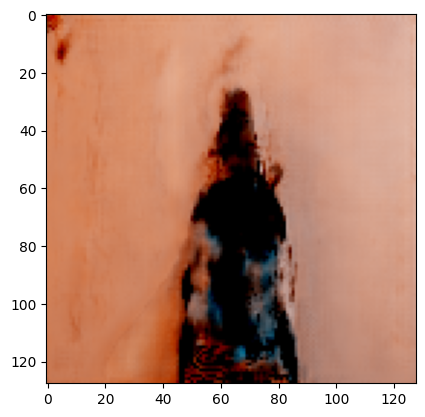

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Image- 1
torch.Size([3, 128, 128])


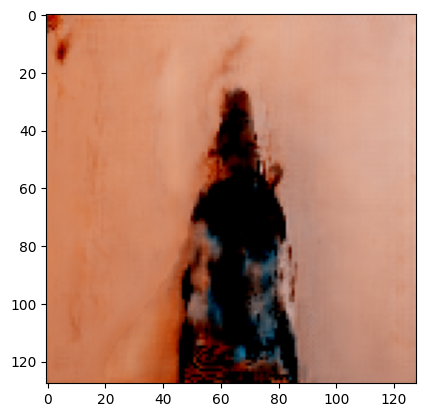

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Image- 2
torch.Size([3, 128, 128])


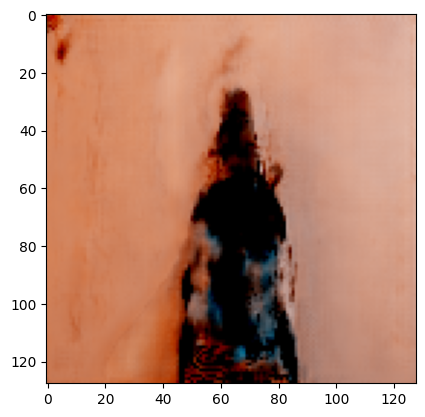

creating folder...


NotADirectoryError: [Errno 20] Not a directory: 'Sign_language_demo.mp4'

In [155]:
import random
# img = "/content/drive/MyDrive/Research/speech-sign_language/img"
pose_array_dir ="/kaggle/working/speech-sign_language/pose_array"
test_dir = "/kaggle/working/speech-sign_language/test_pose.json"
img_dir = "/kaggle/working/speech-sign_language/img"
video_save_dir = "/kaggle/working/video"
verbose = False
# image_generator_dir = "/kaggle/working/speech-sign_language/models/checkpoint.tar"
# pose_generator_dir = "/content/drive/MyDrive/Research/speech-sign_language/pose_checkpoint.tar"

transform = transforms.Compose([
          transforms.ToTensor(),  # Convert PIL image to PyTorch tensor
          transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize to [-1, 1] for RGB images
      ])

file_paths = os.listdir(pose_array_dir)

# print("Pose names: ", file_paths[:10])

with open(test_dir, "r") as f:
  test_data = json.load(f)

index = 656 #random.choice(position_of_longest_lists2(test_data))
print("length of test data :", len((test_data[index])))
n_frames = 3

for t in range(0, len(test_data[index]), n_frames):
    #print(t)
    start_pose_path = os.path.join(pose_array_dir, test_data[index][t] + "_landmarks.npy")
    if t + n_frames >= len(test_data[index]):
        end_pose_path = os.path.join(pose_array_dir, test_data[index][-1] + "_landmarks.npy")
    else:
        end_pose_path = os.path.join(pose_array_dir, test_data[index][t + n_frames] + "_landmarks.npy")
    reference_path = os.path.join(img_dir, test_data[index][t])
    
    # for each in file_paths:
    #     if test_data[index][0] in each:
    #         print("start pose available")
            
    # for each in file_paths:
    #     if test_data[index][n_frames] in each:
    #         print("end pose available")
            
    
    
    pose_generator = pose_generator.to(device)   
    pose_generator.eval()
    generator.eval()
    start_pose = torch.from_numpy(np.load(start_pose_path, allow_pickle=True)).unsqueeze(0).to(device)
    end_pose = torch.from_numpy(np.load(end_pose_path, allow_pickle=True)).unsqueeze(0).to(device)
    reference_image = transform(Image.open(reference_path).convert('RGB'))#.unsqueeze(0).to(device)
   
    #show_image(reference_image)
    #print(start_pose.reshape(33,4)[:24,:2],start_pose.reshape(33,4)[:24,:2].reshape(-1).to(device))
    # start_pose = start_pose.reshape(33,4)[:24,:2].reshape(-1).to(device)
    # end_pose = end_pose.reshape(33,4)[:24,:2].reshape(-1).to(device)
    template = start_pose.reshape(33,4)[:24,:2].reshape(1,-1).to(device)
    start_pose = start_pose.reshape(33,4)[11:23,:2].reshape(-1).to(device)
    end_pose = end_pose.reshape(33,4)[11:23,:2].reshape(-1).to(device)
                
    print(start_pose.shape ,end_pose.shape)           
    sequence = pose_generator.generate(start_pose.type(torch.float).unsqueeze(0), 
                                       end_pose.type(torch.float).unsqueeze(0), max_length=n_frames, template=template) #, eval=True)#, device=device)
    reference_image = reference_image.unsqueeze(0).to(device)
    img_class = test_data[index][0].split("_")[0].strip()
    
    #  img_class = int(sample[0].split("_")[0].strip())
    #         #print("input shape: ", input_image.shape)
    #         pose = np.load(pose_path, allow_pickle=True)[:23*4] #torch.from_numpy(
    #         pose_flatten = rescale_landmarks(pose.reshape(23, 4)[:,:2],
    #             orig_img[img_class]['width'], orig_img[img_class]['height'], 128, 128).reshape(-1)
    #         pose_flatten = torch.Tensor(pose_flatten)
    #         #print("flattened pose: ", pose_flatten)
    #         heatmap = create_heatmaps(pose_flatten,128, 128, 23)
    #         pose = self.get_pose_label(target)
    
    #print("Sequence shape: ", sequence.shape)
    heatmaps = []
    for each in sequence[0]:
        print("pose shape: ", each.shape)
        pose = each[:-2].detach().cpu().numpy()
        #print("pose shape: ", pose.shape)
        # print(pose.reshape(-1, 2).shape)
        pose_flatten = rescale_landmarks(pose.reshape(-1,2), orig_img[int(img_class)]['width'], orig_img[int(img_class)]['height'], 128, 128).reshape(-1)
        pose_flatten = torch.Tensor(pose_flatten).to(device)
        # print("flattened pose: ", pose_flatten.shape)
        heatmap = create_heatmaps(pose_flatten,128, 128, 23)
        heatmaps.append(heatmap)
    
    
    heatmaps = torch.stack(heatmaps).to(device)
    #print("Heatmap shape: ", heatmaps.shape)
    if verbose:
        import matplotlib.pyplot as plt
        
        plt.figure(figsize=(23, 4))
        for i, heatmap in enumerate(heatmaps):  # assuming heatmaps is a list of heatmaps
            for j in range(23):
                plt.subplot(1, 23, j+1)
                plt.imshow(heatmap[j].cpu().numpy(), cmap='hot')  # Assuming heatmap[j] represents the heatmap for joint j
                plt.title(f'Joint {j}')
                plt.axis('off')
            plt.show()  # Show each set of heatmaps separately
    
    

#print("heatmaps shape: ", heatmaps.shape)
    images = generate_image_frames(generator, reference_image, heatmaps)
    for count, each_img in enumerate(images):
        print(f"Image- {count}")
        show_image(each_img)
    
    # File paths for saving the images
    file_paths = [f'output_{num}.jpg' for num in range(t, t + n_frames)]
    
    # Save the batch as images
    save_batch_as_images(images, file_paths, directory=video_save_dir, reverse_normalize=False)
    
    images_to_video("Sign_language_demo.mp4",video_save_dir , fps=2)

# for seq_list in test_samples:
#   each= seq_list#[:8]
#   if not os.path.exists(os.path.join(pose_array_dir, each[0] + "_landmarks.npy")):
#     start_pose_path = os.path.join(pose_array_dir, each[1] + "_landmarks.npy")
#     each.pop(0)
#   else:
#     start_pose_path = os.path.join(pose_array_dir, each[0] + "_landmarks.npy")


#   if not os.path.exists(os.path.join(pose_array_dir, each[-1] + "_landmarks.npy")):
#     end_pose_path = os.path.join(pose_array_dir, each[-1] + "_landmarks.npy")
#     each.pop(-1)
#   else:
#     end_pose_path = os.path.join(pose_array_dir, each[-2] + "_landmarks.npy")

#   max_length = len(each)
#   start_pose = torch.from_numpy(flatten_pose(np.load(start_pose_path, allow_pickle=True))).unsqueeze(0).to(device)
#   end_pose = torch.from_numpy(flatten_pose(np.load(end_pose_path, allow_pickle=True))).unsqueeze(0).to(device)

#   start_img = transform(Image.open(os.path.join(img, each[0])).convert('RGB')).unsqueeze(0).to(device)
#   end_img = transform(Image.open(os.path.join(img, each[-1])).convert('RGB')).unsqueeze(0).to(device)

#   #print(start_pose.shape, end_pose.shape)
#   sequence = pose_generator.generate(start_pose.type(torch.float), end_pose.type(torch.float), max_length)
#   seq_len= sequence.shape[1]

#   create_heatmaps(pose_flatten,128, 128, 23)
#   #print(pose_img_frames[0].shape, type(pose_img_frames))
#   img_frames =  generate_image_frames(img_generator, start_img, pose_img_frames).detach()#.numpy()
#   for i in range(len(img_frames)):
#     show_image(start_img.squeeze(), channels_first=True)
#     show_image(img_frames[i].squeeze(),channels_first=True)
    
#   file_paths = [f"{each[0]}-frame {i}" for i in range(len(each))]
#   save_batch_as_images(img_frames, file_paths, reverse_normalize=True)

In [128]:
class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=100,device="cuda"):
        super(PositionalEncoding, self).__init__()
        self.max_len = max_len
        position = torch.arange(0, max_len).unsqueeze(1).float()
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * -(torch.log(torch.tensor(10000.0)) / d_model))
        self.positional_encoding = torch.zeros((max_len, d_model)).to(device)
        self.positional_encoding[:, 0::2] = torch.sin(position * div_term)
        self.positional_encoding[:, 1::2] = torch.cos(position * div_term)

    def forward(self, x, batch_size):
        # Repeat positional encoding for the given batch size
        #print("The positionial encoder x: 3", x.shape, x.size(1), self.positional_encoding[:x.size(1)].shape)
        positional_encoding = self.positional_encoding[:x.size(1), :].unsqueeze(0).repeat(batch_size, 1, 1)
        #print("x and positional encoding shape: ", x.shape, positional_encoding.shape)
        #print("The positonal encoder: 4", x.shape, batch_size, positional_encoding.shape)
        return x + positional_encoding

class PoseGenerator(nn.Module):
    def __init__(self, d_model=552, nhead= 24, dim_feedforward=2208, num_layers=6, input_size=48, output_size=48, max_len=40,device='cuda',dropout=0.1):
        super(PoseGenerator, self).__init__()

        self.ff = nn.Linear(input_size, d_model)
        # Transformer Encoder with positional encoding
        self.encoder_layer = nn.TransformerEncoderLayer(d_model, nhead, dim_feedforward, batch_first=True,dropout=dropout,device=device)
        self.transformer_encoder = nn.TransformerEncoder(self.encoder_layer, num_layers )
        self.positional_encoder = PositionalEncoding(d_model, max_len, device=device)
        self.device = device
        self.start = self.init_hidden_state(d_model,device)
        # Transformer Decoder with positional encoding
        self.decoder_layer = nn.TransformerDecoderLayer(d_model, nhead, dim_feedforward, batch_first=True,dropout=dropout, device=device)
        self.transformer_decoder = nn.TransformerDecoder(self.decoder_layer, num_layers,)
        # self.positional_decoder = PositionalEncoding(d_model, max_len)

        # Linear layer for output
        self.linear = nn.Sequential(nn.Linear(d_model, output_size), nn.Sigmoid())
        self.output_size = output_size

    def init_hidden_state(self, d_model, device):
        start = nn.Parameter(torch.rand(1, d_model), requires_grad=True,).to(device)
        return start

    def forward(self, start_pose, end_pose, decoder_input):
        b = start_pose.shape[0]

        start_pose = self.ff(start_pose)
        end_pose = self.ff(end_pose)

        encoder_input = torch.cat([start_pose.unsqueeze(1), end_pose.unsqueeze(1)], dim =1)

        # Add positional encoding
        encoder_input = self.positional_encoder(encoder_input, b)

        # Transformer Encoder
        encoder_output = self.transformer_encoder(encoder_input)

        start = self.start.repeat(b, 1).unsqueeze(1)
        #print("Start shape and decoder_input shape: " , start.shape, decoder_input.shape)
        #print("Before: 1", decoder_input.shape)
        decoder_input = self.ff(decoder_input)
        #print("Before positonal encodeer: 2", start.shape, decoder_input.shape)
        decoder_input = self.positional_encoder(torch.cat([start, decoder_input], dim=1), b)

        # Create causal mask for Transformer Decoder
        tgt_mask = nn.Transformer.generate_square_subsequent_mask(decoder_input.size(1)).to(self.device)
        #print("Tgt mask shape: ", tgt_mask.shape)

        # Transformer Decoder
        decoder_output = self.transformer_decoder(
          decoder_input,
          memory=encoder_output,
          tgt_mask=tgt_mask,
          memory_mask=None,
          tgt_key_padding_mask=None,
          memory_key_padding_mask=None,
          )

        # Linear layer for output
        output_sequence = self.linear(decoder_output)

        return output_sequence

    def generate(self, start_pose, end_pose, max_length=10):
        """
        Autoregressive generation of poses.

        Parameters:
            start_pose (torch.Tensor): Start pose tensor.
            end_pose (torch.Tensor): End pose tensor.
            max_length (int): Maximum length of the generated sequence.

        Returns:
            torch.Tensor: Generated pose sequence.
        """
        with torch.no_grad():
            b = start_pose.shape[0]

            start_pose = self.ff(start_pose)
            end_pose = self.ff(end_pose)

            encoder_input = torch.cat([start_pose.unsqueeze(1), end_pose.unsqueeze(1)], dim=1)
            encoder_input = self.positional_encoder(encoder_input, b)
            encoder_output = self.transformer_encoder(encoder_input)

            generated_sequence = torch.zeros((b, max_length, self.output_size), device=start_pose.device)

            start = self.start.repeat(b, 1).unsqueeze(1)
            decoder_input = self.positional_encoder(start, b)

            for i in range(max_length):
                tgt_mask = nn.Transformer.generate_square_subsequent_mask(decoder_input.size(1))
                decoder_output = self.transformer_decoder(
                    decoder_input,
                    memory=encoder_output,
                    tgt_mask=tgt_mask,
                )
                output_step = self.linear(decoder_output[:, -1, :])
                generated_sequence[:, i, :] = output_step

                # Update decoder_input for the next step
                decoder_input = self.positional_encoder(torch.cat([start, self.ff(output_step).unsqueeze(1)], dim=1), b)

            return generated_sequence

        

pose_generator = PoseGenerator(d_model, nhead, dim_feedforward, num_layers, input_size, output_size, max_len, device=device).to(device)
